# Distrust in Government and Vaccine Hesitancy in the COVID-19 Pandemic

*Paper Authors: Yongjin Choi and Ashley M. Fox* </br> *Script Author: Yongjin Choi* </br> *Last updated: Aug. 4. 2021*

* What's Included
  * [Part I. Basic Setting](#part-i-basic-setting)
  * [Part II. Data Prep](#part-ii-data-prep)
    - Merging
    - Cleaning
      - Variables
      - Appendix 1 & 2
  * [Part III. Data Review](#part-iii-data-review)
    - Appendix 3
    - Table 1. Descriptive Statistics
  * [Part IV. Analysis](#part-iv-Analysis)
    - Figure 1 & Appendix 4: Two-way fixed effects
    - Figure 2 & Appendix 5: Predictive probability
    - Figure 3 & Appendix 6: Two-way fixed effects

## Part I. Basic Setting

In [1]:
********************************************************************************
/*----- Basic Setting -----*/
********************************************************************************

/*----- Essentials -----*/

clear all
qui global localpath "C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis"
cd "$localpath"
cap mkdir "$localpath\outputs\01_Vaccination"
cap mkdir "$localpath\outputs\02_Framing"
cap mkdir "$localpath\outputs\03_MaskMandate"
cap mkdir "$localpath\outputs\04_MonkeypoxExp"
cap mkdir "$localpath\outputs\05_PolarizingTrust"
cap mkdir "$localpath\outputs\07_Performance"
cap mkdir "$localpath\outputs\08_AntiIntellectualism"
cap mkdir "$localpath\outputs\09_KU"
cap mkdir "$localpath\models"

qui global rawdata "C:\Dropbox\02_Data"
qui global outputs "$localpath\outputs"
qui global outputs1 "$localpath\outputs\01_Vaccination"
qui global outputs2 "$localpath\outputs\02_Framing"
qui global outputs3 "$localpath\outputs\03_MaskMandate"
qui global outputs4 "$localpath\outputs\04_MonkeypoxExp"
qui global outputs5 "$localpath\outputs\05_PolarizingTrust"
qui global outputs7 "$localpath\outputs\07_Performance"
qui global outputs8 "$localpath\outputs\08_AntiIntellectualism"
qui global outputs9 "$localpath\outputs\09_KU"
qui global models "$localpath\models"

* Output width
set linesize 240
display "{hline}"

* Color scheme for plots
colorpalette #176d90 #841618 #f18821 #3d7337 #a039b7 #009999 #cc6699 #ff6633 #cccc33 #9e6eac, globals
qui grstyle clear
qui set scheme s2color
qui grstyle init
qui grstyle set plain, horizontal grid
qui grstyle color background white
qui grstyle yesno draw_major_hgrid yes
qui grstyle yesno draw_major_ygrid yes
qui grstyle color major_grid none
qui grstyle linepattern major_grid solid
qui grstyle linewidth major_grid vvthin
qui grstyle set legend 4, box inside
qui grstyle color ci_area gs12%50




C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis






















------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


globals:
                    p1 : "23 109 144"
                    p2 : "132 22 24"
                    p3 : "241 136 33"
                    p4 : "61 115 55"
                    p5 : "160 57 183"
                    p6 : "0 153 153"
                    p7 : "204 102 153"
                    p8 : "255 102 51"
                    p9 : "204 204 51"
                   p10 : "158 110 172"














### (Optional) Packages required

In [5]:
/*----- Installing Packages -----*/
*ssc install estout, replace
*ssc install catplot, replace
*ssc install coefplot, replace
*ssc install tabout, replace
*ssc install grstyle, replace
*ssc install palettes, replace
*ssc install colrspace, replace
*ssc install reghdfe, replace
*ssc install ftools, replace

checking ftools consistency and verifying not already installed...
installing into C:\Users\chldy\ado\plus\...
installation complete.


# Part II. Data Prep

In [ ]:
********************************************************************************
/*----- Part II. Data Prep -----*/
********************************************************************************

## Initial Observations

In [3]:
import delimited "$rawdata\01_Survey\2022_Korea Vaccine Survey\HBK_Public\HBK_W1_20220510.csv", clear
gen WAVE = 1
save "HBK_W1", replace
import delimited "$rawdata\01_Survey\2022_Korea Vaccine Survey\HBK_Public\HBK_W2_20220707.csv", clear
gen WAVE = 2
save "HBK_W2", replace

import delimited "$rawdata\01_Survey\2022_Korea Vaccine Survey\HBK_Public\HBK_W3_20220926.csv", clear
gen WAVE = 3
save "HBK_W3", replace

import delimited "$rawdata\01_Survey\2022_Korea Vaccine Survey\HBK_Public\HBK_W4_20221128.csv", clear
gen WAVE = 4
save "HBK_W4", replace

use "HBK_W1", clear
append using HBK_W2, force
append using HBK_W3, force
append using HBK_W4, force
save "HBK_W1_W4", replace


(encoding automatically selected: UTF-8)
(165 vars, 1,500 obs)


file HBK_W1.dta saved

(encoding automatically selected: UTF-8)
(150 vars, 1,500 obs)


file HBK_W2.dta saved

(encoding automatically selected: UTF-8)
(143 vars, 1,500 obs)


file HBK_W3.dta saved

(encoding automatically selected: UTF-8)
(222 vars, 1,500 obs)


file HBK_W4.dta saved


(note: variable rel_text was byte in the using data, but will be str23 now)

(note: variable rel_text was byte in the using data, but will be str23 now)
(variable vc002f_text was str20, now str32 to accommodate using data's values)
(variable job_text was str6, now str18 to accommodate using data's values)

(variable enddate was str15, now str16 to accommodate using data's values)

file HBK_W1_W4.dta saved


## HBK Data

In [2]:
use "HBK_W1_W4", clear
gen DATA = "Vaccine"

egen VAXTYPE = concat(vc002a vc002b vc002c vc002d vc002e vc002f),punct(",")
tab VAXTYPE






     VAXTYPE |      Freq.     Percent        Cum.
-------------+-----------------------------------
 .,.,.,.,.,. |        316        5.27        5.27
 .,.,.,.,.,6 |          5        0.08        5.35
 .,.,.,.,5,. |         21        0.35        5.70
 .,.,.,4,.,. |         12        0.20        5.90
 .,.,.,4,5,. |          2        0.03        5.93
 .,.,3,.,.,. |        134        2.23        8.17
 .,.,3,.,5,. |          4        0.07        8.23
 .,.,3,4,.,. |          3        0.05        8.28
 .,2,.,.,.,. |      1,072       17.87       26.15
 .,2,.,.,5,. |          4        0.07       26.22
 .,2,.,4,.,. |        108        1.80       28.02
 .,2,3,.,.,. |        323        5.38       33.40
 .,2,3,.,5,. |          7        0.12       33.52
 .,2,3,4,.,. |          2        0.03       33.55
 1,.,.,.,.,. |      2,845       47.42       80.97
 1,.,.,.,.,6 |          2        0.03       81.00
 1,.,.,.,5,. |         15        0.25       81.25
 1,.,.,4,.,. |         53        0.88       8

In [5]:
use "HBK_W1_W4", clear
gen DATA = "Vaccine"
recode vc002a (4=1 "Janssen") (1/3 5/6=0 "Other"), gen(vaxJJ1)




(3,987 differences between vc002a and vaxJJ1)


In [10]:
tab vc002d


     VC002D |      Freq.     Percent        Cum.
------------+-----------------------------------
          4 |        200      100.00      100.00
------------+-----------------------------------
      Total |        200      100.00


In [1]:
use "HBK_W1_W4", clear
gen DATA = "Vaccine"

/*----- Variables -----*/
* Vaccination
recode vc001 (4=0 "Never") (3=1 "First") (2=2 "Second") (1=3 "Booster or more") if WAVE<=2, gen(VAX)
replace VAX = 0 if vc001==5 & WAVE>2
replace VAX = 1 if vc001==4 & WAVE>2
replace VAX = 2 if vc001==3 & WAVE>2
replace VAX = 3 if vc001==2 & WAVE>2
replace VAX = 4 if vc001==1 & WAVE>2
recode vc001 (4=0 "Never") (1/3=1 "1 or more") if WAVE<=2, gen(VAX1)
replace VAX1 = 0 if vc001==5 & WAVE>2
replace VAX1 = 1 if vc001>=1 & vc001<=4 & WAVE>2
recode vc001 (3/4=0 "<2") (1/2=1 "2 or more") if WAVE<=2, gen(VAX2)
replace VAX2 = 0 if vc001>=4 & vc001<=5 & WAVE>2
replace VAX2 = 1 if vc001>=1 & vc001<=3 & WAVE>2
recode vc001 (2/4=0 "<3") (1=1 "3 or more") if WAVE<=2, gen(VAX3)
replace VAX3 = 0 if vc001>=3 & vc001<=5 & WAVE>2
replace VAX3 = 1 if vc001>=1 & vc001<=2 & WAVE>2
replace VAX3 = 1 if VAX>=22 & vc002d==4
recode vc001 (2/5=0 "<4") (1=1 "4 or more") if WAVE>2, gen(VAX4)
recode vc004 (1/3=0 "No") (4/5=1 "Yes"), gen(VAX_ADD)
recode vc005a (1/3=0 "No/Don't know") (4/5=1 "Yes"), gen(VAX_EFF)
recode vc005b (1/3=0 "No/Don't know") (4/5=1 "Yes"), gen(VAX_SIDE)
recode vc005c (1/3=0 "No/Don't know") (4/5=1 "Yes"), gen(VAX_BNF)

label var VAX "Vaccination"
label var VAX1 "1 Dose or More"
label var VAX2 "2 Doses or More"
label var VAX3 "Booster or More"
label var VAX_ADD "Will to Another"
label var VAX_EFF "Perc Effectiveness"
label var VAX_SIDE "Perc Side Effects"
label var VAX_BNF "Perc Social Benefits"

* Experiment
recode exp1_1 (1/3=0) (4 5=1), gen(EXP1_OUTCOME1)
recode exp1_2 (1 2=0) (3 4=1), gen(EXP1_OUTCOME2)

* Mask wearing
gen MASK_MNDT = mask_mndt - 1
recode hb002 (1/3=0 "No") (4 5=1 "Yes"), gen(MASK_OUT)
recode hb003 (1/3=0 "No") (4 5=1 "Yes"), gen(MASK_IN)
recode hb006 (1/3=0 "No") (4 5=1 "Yes"), gen(MASK_EFF)

* COVID-19 Risk Perception
recode hb001 (1/3=0 "No") (4 5=1 "Yes"), gen(COVID_EXGG)
label var COVID_EXGG "COVID-19 is exaggerated"
*label define COVID_EXGG 0 "No" 1 "Yes"
*label val COVID_EXGG COVID_EXGG

gen INFECTED = .
replace INFECTED = 0 if hl001a==1
replace INFECTED = 1 if hl001b==2
replace INFECTED = 2 if hl001c==3
replace INFECTED = 2 if hl001d==4
replace INFECTED = 2 if hl001e==5
replace INFECTED = 2 if hl001f==6
label var INFECTED "COVID-19 infection"
label define INFECTED 0 "Not infected" 1 "Myself was infected" 2 "Others were infected"
label val INFECTED INFECTED

* Remote work
recode pp005 (2 3=0 "No") (1 4=1 "Yes"), gen(RMTWRK)

* Trust
recode tr002a (1 2=0 "No") (3 4=1 "Yes"), gen(TR_PRES)
recode tr002b (1 2=0 "No") (3 4=1 "Yes"), gen(TR_KDCA)
recode tr002c (1 2=0 "No") (3 4=1 "Yes"), gen(TR_PUB)
recode tr002d (1 2=0 "No") (3 4=1 "Yes"), gen(TR_DOC)

label var TR_PRES "Trust President"
label var TR_KDCA "Trust KDCA"
label var TR_PUB "Trust Public Clinics"
label var TR_DOC "Trust Doctors"

recode tr003a (1 2=0 "No") (3 4=1 "Yes"), gen(TR_CONMEDIA)
recode tr003b (1 2=0 "No") (3 4=1 "Yes"), gen(TR_LIBMEDIA)
recode tr003c (1 2=0 "No") (3 4=1 "Yes"), gen(TR_SOCMEDIA)

recode tr004a (1 2=0 "No") (3 4=1 "Yes"), gen(TR_FAM)
recode tr004b (1 2=0 "No") (3 4=1 "Yes"), gen(TR_FRNDS)

* Performance
recode pf001b (1 2 3=0 "Ineffective") (4 5=1 "Effectiveness"), gen(PF_EFFC)
recode pf002b (1 2 3=0 "Inequitable") (4 5=1 "Equitable"), gen(PF_EQUI)
recode pf003b (1 2 3=0 "Not transparent") (4 5=1 "Transparent"), gen(PF_TRAN)
recode pf004b (1 2 3=0 "Inefficient") (4 5=1 "Efficient"), gen(PF_EFFI)
recode pf005b (1 2 3=0 "Insensitive") (4 5=1 "Sensitive"), gen(PF_SENS)

label var PF_EFFC "Perceived Effectiveness"
label var PF_EQUI "Perceived Equity"
label var PF_TRAN "Perceived Transparency"
label var PF_EFFI "Perceived Efficiency"
label var PF_SENS "Perceived Sensitivity"

* Politics
recode po001 (1 2=0 "Liberal") (3=2 "Independent") (4 5=1 "Conservative"), gen(IDEOLOGY)
label var IDEOLOGY "Ideology"

* Anti-intellectualism
recode tr005a (1=5 "Never trust") (2=4 "Not trust") (4=2 "Trust") (5=1 "Very trust"), gen(anint1)
recode tr005b (1=5 "Never trust") (2=4 "Not trust") (4=2 "Trust") (5=1 "Very trust"), gen(anint2)
recode tr005c (1=5 "Never trust") (2=4 "Not trust") (4=2 "Trust") (5=1 "Very trust"), gen(anint3)
recode tr005d (1=5 "Never trust") (2=4 "Not trust") (4=2 "Trust") (5=1 "Very trust"), gen(anint4)
recode tr005e (1=5 "Never trust") (2=4 "Not trust") (4=2 "Trust") (5=1 "Very trust"), gen(anint5)
recode tr005f (1=5 "Never trust") (2=4 "Not trust") (4=2 "Trust") (5=1 "Very trust"), gen(anint6)
recode tr005g (1=5 "Never trust") (2=4 "Not trust") (4=2 "Trust") (5=1 "Very trust"), gen(anint7)

egen ANTI = rowmean(anint1-anint7)
label var ANTI "Anti-intellectualism"

* Sociodemographic variables
recode age (1/29=0 "18-29") (30/39=1 "30s") (40/49=2 "40s") (50/59=3 "50s") (60/100=4 "60s"), gen(AGE)
recode sex (1=0 "Male") (2=1 "Female"), gen(FEMALE)
recode edu (1 2=0 "High school or less") (3=1 "Associate/Bachelor") (4 5=2 "Graduate"), gen(EDU)
recode job (2=0 "Employee") (1=1 "Health care worker") (3/7=2 "Other") if WAVE<=2, gen(JOB)
replace JOB = 0 if (job==7 | job==8) & WAVE>2
replace JOB = 1 if (job==1) & WAVE>2
replace JOB = 2 if (job>=2 & job<=6) & WAVE>2
recode job (4 5 6=1 "Unemployed") (1 2 3 7=0 "Other") if WAVE<=2, gen(UNEMPLOYED)
replace UNEMPLOYED = 1 if (job==3 | job==4 | job==5) & WAVE>2
replace UNEMPLOYED = 0 if (job==1 | job==2 | job==6 | job==7 | job==8) & WAVE>2
recode ms (2/4=0 "Not married") (1=1 "Married"), gen(MS)
recode rel (5=0 "No religion") (1/4 6=1 "Religion"), gen(REL)
recode income (1/4=0 "<₩2M") (5/8=1 "₩2M-₩3.99M") (9/10=2 "₩4M-₩5.99M") (11/12=3 "₩6M-₩7.99M") (13/15=4 ">₩7.99M"), gen(INCOME)

label var AGE "Age"
label var FEMALE "Female"
label var EDU "Education"
label var JOB "Job Status"
label var UNEMPLOYED "Unemployed"
label var MS "Marital Status"
label var REL "Religiosity"
label var INCOME "HH Income"

egen count_sample = count(DATA), by (EDU)

xtset prvc
save "HBK_W1_W4_clean", replace




(2,167 differences between vc001 and VAX)

(168 real changes made)

(48 real changes made)

(825 real changes made)

(1,585 real changes made)

(374 real changes made)

(1,023 differences between vc001 and VAX1)

(168 real changes made)

(2,832 real changes made)

(1,023 differences between vc001 and VAX2)

(216 real changes made)

(2,784 real changes made)

(1,023 differences between vc001 and VAX3)

(1,041 real changes made)

(1,959 real changes made)

(0 real changes made)

(2,626 differences between vc001 and VAX4)

(6,000 differences between vc004 and VAX_ADD)

(6,000 differences between vc005a and VAX_EFF)

(6,000 differences between vc005b and VAX_SIDE)

(6,000 differences between vc005c and VAX_BNF)









(1,500 differences between exp1_1 and EXP1_OUTCOME1)

(1,500 differences between exp1_2 and EXP1_OUTCOME2)

(4,500 missing values generated)

(6,000 differences between hb002 and MASK_OUT)

(6,000 differences between hb003 and MASK_IN)

(6,000 differences between hb006 a

## Marine policy data

In [3]:
use "C:\Dropbox\14_KIOST\01_KIOST_Manuscripts_Yongjin\Anti_Int_AI\02_Analysis\KIOST.dta", clear
gen DATA = "Marine"

*******************************
/*----- Outcomes -----*/
*******************************
* AI
recode ai001 (1 2=0 "No/Don't know") (3=1 "Yes"), gen(diff_AIML)
recode ai002 (1/3=0 "Negative") (4/5=1 "Positive"), gen(AI_feeling)

label var diff_AIML "Know the difference"
label var AI_feeling "Feeling about AI"

* Support or oppose adopting AI
recode ai003_1 (4/5=1 "Yes") (1/3=0 "No"), gen(auto_ship)
recode ai003_2 (4/5=1 "Yes") (1/3=0 "No"), gen(blockchain)
recode ai003_3 (4/5=1 "Yes") (1/3=0 "No"), gen(forecast)
recode ai003_4 (4/5=1 "Yes") (1/3=0 "No"), gen(cap_illegal)
recode ai003_5 (4/5=1 "Yes") (1/3=0 "No"), gen(iden_plastic)
recode ai003_6 (4/5=1 "Yes") (1/3=0 "No"), gen(auto_weapon)
recode ai003_7 (4/5=1 "Yes") (1/3=0 "No"), gen(auto_robot)

label var auto_ship "Autonomous ship"
label var blockchain "Blockchain"
label var forecast "Weather forecast"
label var cap_illegal "Capture illegal"
label var iden_plastic "Identify plastic"
label var auto_weapon "Autonomous weapon"
label var auto_robot "Autonomous robot"


***************************************
/*----- Independent Variables -----*/
***************************************

* Trust
rename (tr001_1 tr001_2 tr001_3) (GOV_1 GOV_2 GOV_3)

recode tr002_1 (1/3=0 "No") (4 5=1 "Yes"), gen(TR_PRES)
recode tr002_2 (1/3=0 "No") (4 5=1 "Yes"), gen(TR_MOF)
recode tr002_3 (1/3=0 "No") (4 5=1 "Yes"), gen(TR_KIOST)
recode tr002_4 (1/3=0 "No") (4 5=1 "Yes"), gen(TR_KCG)
recode tr002_5 (1/3=0 "No") (4 5=1 "Yes"), gen(TR_KMI)
recode tr002_6 (1/3=0 "No") (4 5=1 "Yes"), gen(TR_MSIT)
recode tr002_7 (1/3=0 "No") (4 5=1 "Yes"), gen(TR_MOLIT)
recode tr002_8 (1/3=0 "No") (4 5=1 "Yes"), gen(TR_CITY)

label var TR_PRES "Trust President"
label var TR_MOF "Trust MOF"
label var TR_KIOST "Trust KIOST"
label var TR_KCG "Trust Korea Coast Guard"
label var TR_KMI "Trust Korea Maritime Institute"
label var TR_MSIT "Trust MSICT"
label var TR_MOLIT "Trust MLIT"
label var TR_CITY "Trust city and county"

recode tr004_1 (1/3=0 "No") (4 5=1 "Yes"), gen(MOF_REPU)
recode tr004_2 (1/3=0 "No") (4 5=1 "Yes"), gen(MOF_OPER)
recode tr004_3 (1/3=0 "No") (4 5=1 "Yes"), gen(MOF_RULE)
recode tr004_4 (1/3=0 "No") (4 5=1 "Yes"), gen(MOF_JUSTI)
recode tr004_5 (1/3=0 "No") (4 5=1 "Yes"), gen(MOF_DECI)

label var MOF_REPU "MOF reputation"
label var MOF_OPER "MOF operation"
label var MOF_RULE "MOF rule compliance"
label var MOF_JUSTI "MOF justice"
label var MOF_DECI "MOF decision making"
    
recode tr004_6 (1/3=0 "No") (4 5=1 "Yes"), gen(MSIT_REPU)
recode tr004_7 (1/3=0 "No") (4 5=1 "Yes"), gen(MSIT_OPER)
recode tr004_8 (1/3=0 "No") (4 5=1 "Yes"), gen(MSIT_RULE)
recode tr004_9 (1/3=0 "No") (4 5=1 "Yes"), gen(MSIT_JUSTI)
recode tr004_10 (1/3=0 "No") (4 5=1 "Yes"), gen(MSIT_DECI)

* Performance
recode pf004_2 (1 2 3=0 "Ineffective") (4 5=1 "Effective"), gen(PF_EFFC_MOF)
recode pf005_2 (1 2 3=0 "Inequitable") (4 5=1 "Equitable"), gen(PF_EQUI_MOF)
recode pf006_2 (1 2 3=0 "Not transparent") (4 5=1 "Transparent"), gen(PF_TRAN_MOF)

label var PF_EFFC_MOF "Perceived Effectiveness - MOF"
label var PF_EQUI_MOF "Perceived Equity - MOF"
label var PF_TRAN_MOF "Perceived Transparency - MOF"


* Political Propensity
recode po001 (1/2=0 "Liberal") (4/5=1 "Conservative") (3=2 "Independent"), gen(IDEOLOGY)
label var IDEOLOGY "Political Propensity"

/*----- Controls -----*/
encode sq1_1, gen(prvc)
rename sq1_1 prvc_text

* Distance from the ocean
recode st007 (4=1 ">=10KM") (1/3=0 "<10KM"), gen(ODIS)

* Demographic variables
recode sq3 (1/29=0 "18-29") (30/39=1 "30s") (40/49=2 "40s") (50/59=3 "50s") (60/100=4 "60s"), gen(AGE)
recode sq4 (1=0 "Male") (2=1 "Female"), gen(FEMALE)
recode edu (1 2=0 "High school or less") (3=1 "Associate/Bachelor") (4 5=2 "Graduate"), gen(EDU)
recode job (1/3 7=0 "Other") (4/6=1 "Not employeed"), gen(UNEMPLOYED)  
recode ms (2/4=0 "Not married") (1=1 "Married"), gen(MS)
recode rel (5=0 "No religion") (1/4 6=1 "Religion"), gen(REL)
recode income (1/4=0 "<₩2M") (5/8=1 "₩2M-₩3.99M") (9/10=2 "₩4M-₩5.99M") (11/12=3 "₩6M-₩7.99M") (13/15=4 ">₩7.99M"), gen(INCOME)

label var AGE "Age"
label var FEMALE "Female"
label var EDU "Education"
label var UNEMPLOYED "Unemployed"
label var MS "Marital Status"
label var REL "Religiosity"
label var INCOME "HH Income"

egen count_sample = count(DATA), by (EDU)

xtset prvc
save "KIOST_clean.dta", replace




(2000 differences between ai001 and diff_AIML)

(2000 differences between ai002 and AI_feeling)



(2000 differences between ai003_1 and auto_ship)

(2000 differences between ai003_2 and blockchain)

(2000 differences between ai003_3 and forecast)

(2000 differences between ai003_4 and cap_illegal)

(2000 differences between ai003_5 and iden_plastic)

(2000 differences between ai003_6 and auto_weapon)

(2000 differences between ai003_7 and auto_robot)









(2000 differences between tr002_1 and TR_PRES)

(2000 differences between tr002_2 and TR_MOF)

(2000 differences between tr002_3 and TR_KIOST)

(2000 differences between tr002_4 and TR_KCG)

(2000 differences between tr002_5 and TR_KMI)

(2000 differences between tr002_6 and TR_MSIT)

(2000 differences between tr002_7 and TR_MOLIT)

(2000 differences between tr002_8 and TR_CITY)









(2000 differences between tr004_1 and MOF_REPU)

(2000 differences between tr004_2 and MOF_OPER)

(2000 differences between tr004_3 and MOF_R

## Weighting

In [29]:
import delimited "PSweight_edu.csv", clear case(preserve)
capt drop count_sample pct_sample weight
save "PSweight_edu", replace


(encoding automatically selected: UTF-8)
(7 vars, 6 obs)


file PSweight_edu.dta saved


## Merging

In [30]:
* Vaccine survey data
use "HBK_W1_W4_clean", clear

* Marine policy survey data
append using "KIOST_clean", force

* Weighting
merge m:1 DATA EDU using "PSweight_edu.dta"
gen pct_sample = .
replace pct_sample = count_sample/6000 if DATA=="Vaccine"
replace pct_sample = count_sample/2000 if DATA=="Marine"
gen weight = pct_pop/pct_sample
gen Pweight = totalpop / sample
drop if _merge==2

save "_Merged.dta", replace



(note: variable enddate was double in the using data, but will be str16 now)
(variable prvc was byte, now long to accommodate using data's values)
(label INCOME already defined)
(label REL already defined)
(label MS already defined)
(label UNEMPLOYED already defined)
(label EDU already defined)
(label FEMALE already defined)
(label AGE already defined)
(label IDEOLOGY already defined)
(label TR_PRES already defined)


    Result                      Number of obs
    -----------------------------------------
    Not matched                             0
    Matched                             8,000  (_merge==3)
    -----------------------------------------

(8,000 missing values generated)

(6,000 real changes made)

(2,000 real changes made)



(0 observations deleted)

file _Merged.dta saved


# Paper 1. Predictors of COVID-19 Booster Vaccination in the Republic of Korea

## Descriptive Statistics

### Weighted

In [19]:
capt prog drop ctab
program ctab, eclass
    syntax varlist [if] [in]
    // Row 1: No. of Observations
    qui tab WAVE
    matrix temp = r(N)
    local c1 = temp[1,1]
    qui tab WAVE if WAVE == 1
    matrix temp = r(N)
    local c2 = temp[1,1]
    qui tab WAVE if WAVE == 2
    matrix temp = r(N)
    local c3 = temp[1,1]
    qui tab WAVE if WAVE == 3
    matrix temp = r(N)
    local c4 = temp[1,1]
    qui tab WAVE if WAVE == 4
    matrix temp = r(N)
    local c5 = temp[1,1]
    mat M = (`c1',`c2',`c3',`c4',`c5', 0)
    mat rownames M = "No of Obs"
    mat colnames M = "All" "Wave 1" "Wave 2" "Wave 3" "Wave 4" "Chi-squared"

    local num = 0
    foreach x in `varlist'{
        local num = `num' + 1

        qui svy: mean `x'
        matrix temp = e(b)
        local m1 = temp[1,1]*100
        qui svy: mean `x' if WAVE==1
        matrix temp = e(b)
        local m2 = temp[1,1]*100
        qui svy: mean `x' if WAVE==2
        matrix temp = e(b)
        local m3 = temp[1,1]*100
        qui svy: mean `x' if WAVE==3
        matrix temp = e(b)
        local m4 = temp[1,1]*100
        qui svy: mean `x' if WAVE==4
        matrix temp = e(b)
        local m5 = temp[1,1]*100
        qui tab `x' WAVE, chi
        mat temp = r(p)
        local m6 = temp[1,1]

        mat temp = (`m1',`m2',`m3',`m4',`m5',`m6')
        local rowname: variable label `x'
        mat rownames temp = "`rowname'"
        mat M = M\temp
        // mat M = M[1..3,1...]
    }
    esttab matrix(M, fmt("0 2"))
    esttab matrix(M, fmt("0 2")) using "$outputs1\Table1_weighted.rtf", replace
end

In [20]:
use "_Merged", clear
keep if DATA=="Vaccine"
drop if vc001==4 & WAVE<=2
drop if vc001==5 & WAVE>2
svyset [pweight=weight], strata(EDU)

qui tab IDEOLOGY, gen(IDEOLOGY_)
label var IDEOLOGY_1 "Liberal"
label var IDEOLOGY_2 "Independent"
label var IDEOLOGY_3 "Conservative"
qui tab AGE, gen(AGE_)
qui tab EDU, gen(EDU_)
label var EDU_1 "High school or less"
label var EDU_2 "BA"
label var EDU_3 "MA or more"
qui tab INCOME, gen(INCOME_)
label var INCOME_1 "<₩2M"
label var INCOME_2 "₩2M-₩3.99M"
label var INCOME_3 "₩4M-₩5.99M"
label var INCOME_4 "₩6M-₩7.99M"
label var INCOME_5 ">₩7.99M"

ctab VAX2 VAX3 VAX_ADD TR_KDCA IDEOLOGY_1-IDEOLOGY_3 COVID_EXGG FEMALE MS UNEMPLOYED REL ///
     AGE_1 AGE_2 AGE_3 AGE_4 AGE_5 EDU_1 EDU_2 EDU_3 INCOME_1 INCOME_2 INCOME_3 INCOME_4 INCOME_5



(2,000 observations deleted)

(148 observations deleted)

(168 observations deleted)


Sampling weights: weight
             VCE: linearized
     Single unit: missing
        Strata 1: EDU
 Sampling unit 1: <observations>
           FPC 1: <zero>

















------------------------------------------------------------------------------------------
                        M                                                                 
                      All       Wave 1       Wave 2       Wave 3       Wave 4  Chi-squared
------------------------------------------------------------------------------------------
No of Obs            5684         1423         1429         1421         1411            0
2 Doses or~e        98.38        98.65        98.49        98.39        97.99         0.89
Booster or~e        69.17        70.21        68.50        69.12        68.84         0.20
Will to An~r        45.99        47.73        50.18        41.25        44.81         0.00
Trust 

### Weighted by Vax

In [11]:
capt prog drop ctab
program ctab, eclass
    syntax varlist [if] [in]
    // Row 1: No. of Observations
    qui tab WAVE
    matrix temp = r(N)
    local c1 = temp[1,1]
    qui tab WAVE if VAX3 == 0
    matrix temp = r(N)
    local c2 = temp[1,1]
    qui tab WAVE if VAX3 == 1
    matrix temp = r(N)
    local c3 = temp[1,1]    
    mat M = (`c1',`c2',`c3', 0)
    mat rownames M = "No of Obs"
    mat colnames M = "All" "1-2 doses" ">2 doses" "Chi-squared"

    local num = 0
    foreach x in `varlist'{
        local num = `num' + 1

        qui svy: mean `x'
        matrix temp = e(b)
        local m1 = temp[1,1]*100
        qui svy: mean `x' if VAX3 == 0
        matrix temp = e(b)
        local m2 = temp[1,1]*100
        qui svy: mean `x' if VAX3 == 1
        matrix temp = e(b)
        local m3 = temp[1,1]*100
        qui tab `x' WAVE, chi
        mat temp = r(p)
        local m4 = temp[1,1]

        mat temp = (`m1',`m2',`m3',`m4')
        local rowname: variable label `x'
        mat rownames temp = "`rowname'"
        mat M = M\temp
        // mat M = M[1..3,1...]
    }
    esttab matrix(M, fmt("0 2"))
    esttab matrix(M, fmt("0 2")) using "$outputs1\eSupplement_Weighted_byVax.rtf", replace
end

In [22]:
use "_Merged", clear
keep if DATA=="Vaccine"
drop if vc001==4 & WAVE<=2
drop if vc001==5 & WAVE>2
svyset [pweight=weight], strata(EDU)

qui tab IDEOLOGY, gen(IDEOLOGY_)
label var IDEOLOGY_1 "Liberal"
label var IDEOLOGY_2 "Conservative"
label var IDEOLOGY_3 "Independent"
qui tab AGE, gen(AGE_)
qui tab EDU, gen(EDU_)
label var EDU_1 "High school or less"
label var EDU_2 "BA"
label var EDU_3 "MA or more"
qui tab INCOME, gen(INCOME_)
label var INCOME_1 "<₩2M"
label var INCOME_2 "₩2M-₩3.99M"
label var INCOME_3 "₩4M-₩5.99M"
label var INCOME_4 "₩6M-₩7.99M"
label var INCOME_5 ">₩7.99M"

ctab VAX2 VAX3 VAX_ADD TR_KDCA IDEOLOGY_1-IDEOLOGY_3 COVID_EXGG FEMALE MS UNEMPLOYED REL ///
     AGE_1 AGE_2 AGE_3 AGE_4 AGE_5 EDU_1 EDU_2 EDU_3 INCOME_1 INCOME_2 INCOME_3 INCOME_4 INCOME_5



(2,000 observations deleted)

(148 observations deleted)

(168 observations deleted)


Sampling weights: weight
             VCE: linearized
     Single unit: missing
        Strata 1: EDU
 Sampling unit 1: <observations>
           FPC 1: <zero>

















------------------------------------------------------------------------------------------
                        M                                                                 
                      All       Wave 1       Wave 2       Wave 3       Wave 4  Chi-squared
------------------------------------------------------------------------------------------
No of Obs            5684         1423         1429         1421         1411            0
2 Doses or~e        98.38        98.65        98.49        98.39        97.99         0.89
Booster or~e        69.17        70.21        68.50        69.12        68.84         0.20
Will to An~r        45.99        47.73        50.18        41.25        44.81         0.00
Trust 

r(608);
r(608);


In [18]:
svy: tab VAX4 WAVE, col
tab VAX4 WAVE, col chi


(running tabulate on estimation sample)

Number of strata =     3                          Number of obs   =      2,832
Number of PSUs   = 2,832                          Population size = 2,837.1057
                                                  Design df       =      2,829

-------------------------------
RECODE of |
vc001     |        WAVE        
(VC001)   |     3      4  Total
----------+--------------------
       <4 | .8807  .8424  .8615
 4 or mor | .1193  .1576  .1385
          | 
    Total |     1      1      1
-------------------------------
Key: Column proportion

  Pearson:
    Uncorrected   chi2(1)         =    8.7124
    Design-based  F(1, 2829)      =    6.5249     P = 0.0107


+-------------------+
| Key               |
|-------------------|
|     frequency     |
| column percentage |
+-------------------+

 RECODE of |
     vc001 |         WAVE
   (VC001) |         3          4 |     Total
-----------+----------------------+----------
        <4 |     1,259      1,1

### Unweighted

In [19]:
capt prog drop ctab
program ctab, eclass
    syntax varlist [if] [in]
    // Row 1: No. of Observations
    qui tab WAVE
    matrix temp = r(N)
    local c1 = temp[1,1]
    qui tab WAVE if WAVE == 1
    matrix temp = r(N)
    local c2 = temp[1,1]
    qui tab WAVE if WAVE == 2
    matrix temp = r(N)
    local c3 = temp[1,1]
    qui tab WAVE if WAVE == 3
    matrix temp = r(N)
    local c4 = temp[1,1]
    qui tab WAVE if WAVE == 4
    matrix temp = r(N)
    local c5 = temp[1,1]
    mat M = (`c1',`c2',`c3',`c4',`c5', 0)
    mat rownames M = "No of Obs"
    mat colnames M = "All" "Wave 1" "Wave 2" "Wave 3" "Wave 4" "Chi-squared"

    local num = 0
    foreach x in `varlist'{
        local num = `num' + 1

        qui sum `x'
        matrix temp = r(mean)
        local m1 = temp[1,1]*100
        qui sum `x' if WAVE==1
        matrix temp = r(mean)
        local m2 = temp[1,1]*100
        qui sum `x' if WAVE==2
        matrix temp = r(mean)
        local m3 = temp[1,1]*100
        qui sum `x' if WAVE==3
        matrix temp = r(mean)
        local m4 = temp[1,1]*100
        qui sum `x' if WAVE==4
        matrix temp = r(mean)
        local m5 = temp[1,1]*100
        qui tab `x' WAVE, chi
        mat temp = r(p)
        local m6 = temp[1,1]

        mat temp = (`m1',`m2',`m3',`m4',`m5',`m6')
        local rowname: variable label `x'
        mat rownames temp = "`rowname'"
        mat M = M\temp
        // mat M = M[1..3,1...]
    }
    esttab matrix(M, fmt("0 2"))
    esttab matrix(M, fmt("0 2")) using "$outputs1\eSupplement_unweighted.rtf", replace
end

In [20]:
use "HBK_W1_W4_clean", clear
drop if vc001==4 & WAVE<=2
drop if vc001==5 & WAVE>2

qui tab IDEOLOGY, gen(IDEOLOGY_)
label var IDEOLOGY_1 "Liberal"
label var IDEOLOGY_2 "Independent"
label var IDEOLOGY_3 "Conservative"
qui tab AGE, gen(AGE_)
qui tab EDU, gen(EDU_)
label var EDU_1 "High school or less"
label var EDU_2 "BA"
label var EDU_3 "MA or more"
qui tab INCOME, gen(INCOME_)
label var INCOME_1 "<₩2M"
label var INCOME_2 "₩2M-₩3.99M"
label var INCOME_3 "₩4M-₩5.99M"
label var INCOME_4 "₩6M-₩7.99M"
label var INCOME_5 ">₩7.99M"

ctab VAX1 VAX2 VAX3 VAX4 VAX_ADD TR_KDCA IDEOLOGY_1-IDEOLOGY_3 COVID_EXGG FEMALE MS UNEMPLOYED REL AGE_1-AGE_5 EDU_1-EDU_3 INCOME_1-INCOME_5



(148 observations deleted)

(168 observations deleted)

















------------------------------------------------------------------------------------------
                        M                                                                 
                      All       Wave 1       Wave 2       Wave 3       Wave 4  Chi-squared
------------------------------------------------------------------------------------------
No of Obs            5684         1423         1429         1421         1411            0
1 Dose or ~e       100.00       100.00       100.00       100.00       100.00            .
2 Doses or~e        98.42        98.59        98.46        98.38        98.23         0.89
Booster or~e        69.25        71.19        67.46        69.25        69.10         0.20
RECODE ~001)        13.21            .            .        11.40        15.02         0.00
Will to An~r        45.43        46.66        49.27        41.45        44.29         0.00
Trust KDCA      

In [13]:
tab VAX_ADD WAVE, chi


   Will to |                    WAVE
   Another |         1          2          3          4 |     Total
-----------+--------------------------------------------+----------
        No |       759        725        832        786 |     3,102 
       Yes |       664        704        589        625 |     2,582 
-----------+--------------------------------------------+----------
     Total |     1,423      1,429      1,421      1,411 |     5,684 

          Pearson chi2(3) =  19.1643   Pr = 0.000


## Figure 1

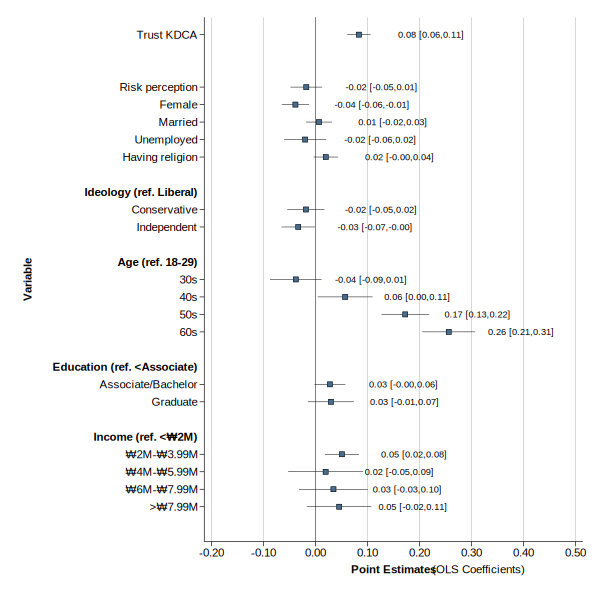
















file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\01_Vaccination\Fig1.gph saved

file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\01_Vaccination\Fig1.jpg written in JPEG format


Figure 1
-------------------------------------
                               (1)   
                   Booster or More   
-------------------------------------
Yes                         0.0833***
                       [0.06,0.11]   
Yes                        -0.0178   
                      [-0.05,0.01]   
Female                     -0.0387** 
                     [-0.06,-0.01]   
Married                     0.0067   
                      [-0.02,0.03]   
Unemployed                 -0.0202   
                      [-0.06,0.02]   
Religion                    0.0196   
                      [-0.00,0.04]   
Conservative               -0.0185   
                      [-0.05,0.02]   
Independent                -0.0332*  
                     [-0.0

In [25]:
use "_Merged", clear
qui keep if DATA=="Vaccine"
qui drop if vc001==4 & WAVE<=2
qui drop if vc001==5 & WAVE>2
qui svyset [pweight=weight], strata(EDU)

loc controls i.COVID_EXGG i.FEMALE i.MS i.UNEMPLOYED i.REL i.IDEOLOGY i.AGE i.EDU i.INCOME i.WAVE
loc title1 "A. Booster Vaccination"
loc title2 "B. Willingness to Get Another (After the 2nd)"
loc title3 "C. Willingness to Get Another (After the 3rd)"
loc xrange -0.2(0.1)0.5

eststo lm1: qui xtreg VAX3 i.TR_KDCA `controls' [pw=Pweight], fe vce(cluster prvc)
qui coefplot (lm1, label(Logit) mfcolor(navy*0.8)), bylabel("`title1'") || ///
           , drop(*.WAVE _cons) ///
             headings(1.VAX3="{bf:Booster & trust}" 0.TR_KDCA="{bf:Trust in the KDCA}" 1.IDEOLOGY = "{bf:Ideology (ref. Liberal)}" ///
                 1.COVID_EXGG = " " 0.FEMALE = "{bf:Gender}" ///
                 1.AGE = "{bf:Age (ref. 18-29)}" 0.MS = "{bf:Marital Status}" 0.UNEMPLOYED = "{bf:Unemployed}" 0.REL = "{bf:Having a Religion}" ///
                 1.EDU = "{bf:Education (ref. <Associate)}" ///
                 1.INCOME = "{bf:Income (ref. <₩2M)}") ///
             coeflabels(1.TR_KDCA="Trust KDCA" ///
                        1.COVID_EXGG="Risk perception" 1.FEMALE="Female" 1.MS="Married" 1.UNEMPLOYED="Unemployed" 1.REL="Having religion" ///
                        1.IDEOLOGY="Conservative" 2.IDEOLOGY="Independent") ///
             xtitle("{bf:Point Estimates} (OLS Coefficients)", margin(small)) ytitle({bf:Variable}, margin(small)) ///
             xlabel(`xrange', grid glcolor(gs4)) ylabel(, nogrid) byopts(row(1)) ///
             mlabel("     " + string(@b, "%9.2f") + " [" + string(@ll, "%9.2f") + "," + string(@ul, "%9.2f") + "]") mlabformat("%9.2f") ///
             xline(0, lcolor(gray) lwidth(medium)) ///
             plotregion(lwidth(thin) lpattern(solid)) ///
             msize(medium) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
             ciopts(recast(rspike) lcolor(black) lwidth(vthin)) mlabel format(%9.2f) mlabcolor(black) mlabposition(3) mlabgap(*16) ///
             graphregion(fcolor(white) color(white) icolor(white) margin(small)) ///
             legend(off) ///
             name(g1, replace)

graph combine g1, ///
        b1("") ycommon xcommon ///
        l1("") ///
        xsize(12) ysize(12) iscale(*0.55)
graph save "$outputs1\Fig1.gph", replace
graph export "$outputs1\Fig1.jpg", replace

esttab lm1  ///
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Figure 1) nogaps ///
    varwidth(18) modelwidth(15) nobase label
esttab lm1  ///
    ,replace b(4) p(5) r2(2) ar2(2) scalar(F) ///
    title(Figure 1) nogaps ///
    varwidth(18) modelwidth(15) nobase label
esttab lm1 ///
    using "$outputs1\Appendix_Fig1.rtf" ///
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Figure 1) nogaps ///
    varwidth(18) modelwidth(15) nobase label

## Appendix 2

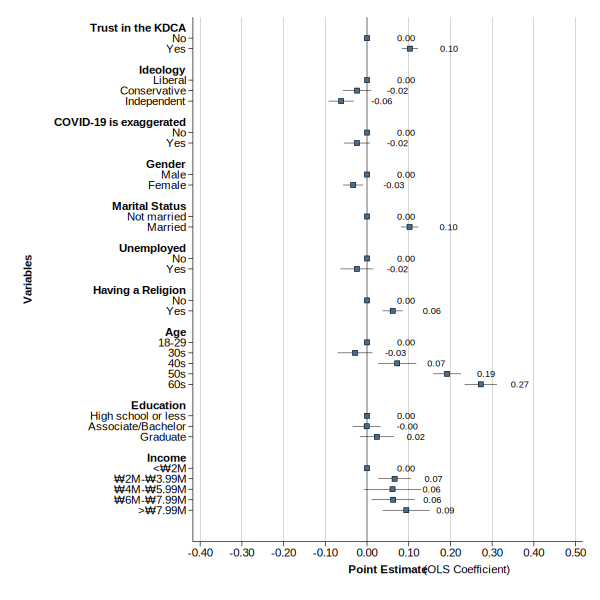






















































file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\01_Vaccination\Appendix2.gph saved

file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\01_Vaccination\Appendix2.jpg written in JPEG format


In [31]:
use "_Merged", clear
qui keep if DATA=="Vaccine"
qui drop if vc001==4 & WAVE<=2
qui drop if vc001==5 & WAVE>2
qui svyset [pweight=weight], strata(EDU)

loc vars i.TR_KDCA i.IDEOLOGY i.COVID_EXGG i.FEMALE i.MS i.UNEMPLOYED i.REL i.AGE i.EDU i.INCOME
loc title1 "A. Booster Vaccination"
loc title2 "B. Willingness to Get Another (After the 2nd)"
loc xrange -0.4(0.1)0.5

matrix M = J(28, 3, .)
matrix coln M = Beta LI95 UI95

qui xtreg VAX3 i.TR_KDCA i.WAVE [pw=Pweight], fe vce(cluster prvc)
matrix M[1,1] = r(table)[1,1], r(table)[5,1], r(table)[6,1]
matrix M[2,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
qui xtreg VAX3 i.IDEOLOGY i.WAVE [pw=Pweight], fe vce(cluster prvc)
matrix M[3,1] = r(table)[1,1], r(table)[5,1], r(table)[6,1]
matrix M[4,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
matrix M[5,1] = r(table)[1,3], r(table)[5,3], r(table)[6,3]
qui xtreg VAX3 i.COVID_EXGG i.WAVE [pw=Pweight], fe vce(cluster prvc)
matrix M[6,1] = r(table)[1,1], r(table)[5,1], r(table)[6,1]
matrix M[7,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
qui xtreg VAX3 i.FEMALE i.WAVE [pw=Pweight], fe vce(cluster prvc)
matrix M[8,1] = r(table)[1,1], r(table)[5,1], r(table)[6,1]
matrix M[9,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
qui xtreg VAX3 i.MS i.WAVE [pw=Pweight], fe vce(cluster prvc)
matrix M[10,1] = r(table)[1,1], r(table)[5,1], r(table)[6,1]
matrix M[11,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
qui xtreg VAX3 i.UNEMPLOYED i.WAVE [pw=Pweight], fe vce(cluster prvc)
matrix M[12,1] = r(table)[1,1], r(table)[5,1], r(table)[6,1]
matrix M[13,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
qui xtreg VAX3 i.REL i.WAVE [pw=Pweight], fe vce(cluster prvc)
matrix M[14,1] = r(table)[1,1], r(table)[5,1], r(table)[6,1]
matrix M[15,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
qui xtreg VAX3 i.AGE i.WAVE [pw=Pweight], fe vce(cluster prvc)
matrix M[16,1] = r(table)[1,1], r(table)[5,1], r(table)[6,1]
matrix M[17,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
matrix M[18,1] = r(table)[1,3], r(table)[5,3], r(table)[6,3]
matrix M[19,1] = r(table)[1,4], r(table)[5,4], r(table)[6,4]
matrix M[20,1] = r(table)[1,5], r(table)[5,5], r(table)[6,5]
qui xtreg VAX3 i.EDU i.WAVE [pw=Pweight], fe vce(cluster prvc)
matrix M[21,1] = r(table)[1,1], r(table)[5,1], r(table)[6,1]
matrix M[22,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
matrix M[23,1] = r(table)[1,3], r(table)[5,3], r(table)[6,3]
qui xtreg VAX3 i.INCOME i.WAVE [pw=Pweight], fe vce(cluster prvc)
matrix M[24,1] = r(table)[1,1], r(table)[5,1], r(table)[6,1]
matrix M[25,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
matrix M[26,1] = r(table)[1,3], r(table)[5,3], r(table)[6,3]
matrix M[27,1] = r(table)[1,4], r(table)[5,4], r(table)[6,4]
matrix M[28,1] = r(table)[1,5], r(table)[5,5], r(table)[6,5]

qui coefplot (matrix(M[,1]), label(Wave 1) ci((2 3)) msymbol(S) mfcolor(navy*0.8)) ///
     , xtitle(, margin(small)) ///
       ytitle("Marginal Effect", margin(tiny)) ///
       msymbol(s) byopts(cols(6)) ///
       headings(r1="{bf:Trust in the KDCA}" r3 = "{bf:Ideology}" ///
                 r6 = "{bf:COVID-19 is exaggerated}" r8 = "{bf:Gender}" ///
                 r10 = "{bf:Marital Status}" r12 = "{bf:Unemployed}" r14 = "{bf:Having a Religion}" ///
                 r16 = "{bf:Age}" r21 = "{bf:Education}" r24 = "{bf:Income}") ///       
       coeflabels(r1 = "No" r2 = "Yes" r3 = "Liberal" r4 = "Conservative" r5 = "Independent" ///
                  r6 = "No" r7 = "Yes" r8 = "Male" r9 = "Female" r10 = "Not married" r11 = "Married" ///
                  r12 = "No" r13 = "Yes" r14 = "No" r15 = "Yes" ///
                  r16 = "18-29" r17 = "30s" r18 = "40s" r19 = "50s" r20 = "60s" ///
                  r21 = "High school or less" r22 = "Associate/Bachelor" r23 = "Graduate" ///
                  r24 = "<₩2M" r25 = "₩2M-₩3.99M" r26 = "₩4M-₩5.99M" r27 = "₩6M-₩7.99M" r28 = ">₩7.99M") ///       
       xtitle("{bf:Point Estimate} (OLS Coefficient)", margin(small)) ytitle({bf:Variables}, margin(small)) ///
       xlabel(`xrange', grid glcolor(gs4)) ylabel(, nogrid) ///
       xline(0, lcolor(gray) lwidth(medium)) ///
       plotregion(lwidth(thin) lpattern(solid)) ///
       msize(medium) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
       ciopts(recast(rspike) lcolor(black) lwidth(vthin)) mlabel format(%9.2f) mlabcolor(black) mlabposition(3) mlabgap(*12) ///
       graphregion(fcolor(white) color(white) icolor(white) margin(small)) ///
       legend(off) ///
       name(g1, replace)
graph combine g1, ///
    b1("") ycommon xcommon ///
    l1("") ///
    xsize(12) ysize(12) iscale(*0.55)
graph save "$outputs1\Appendix2.gph", replace
graph export "$outputs1\Appendix2.jpg", replace

## Appendix 3

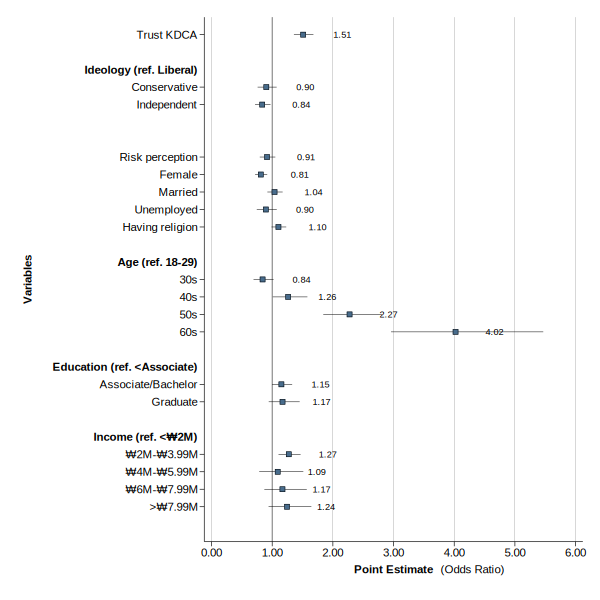
















file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\01_Vaccination\Appendix3.gph saved

file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\01_Vaccination\Appendix3.jpg written in JPEG format


Appendix 4
-------------------------------------
                               (1)   
                   Booster or More   
-------------------------------------
Booster or More                      
Yes                         1.5101***
                       [1.36,1.68]   
Conservative                0.9031   
                       [0.76,1.07]   
Independent                 0.8352*  
                       [0.72,0.97]   
Yes                         0.9145   
                       [0.80,1.05]   
Female                      0.8119***
                       [0.72,0.92]   
Married                     1.0387   
                       [0.92,1.17]   
Unemployed                  0.8954   
                       [0.75,1.08]   
Religion      

In [6]:
use "_Merged", clear
qui keep if DATA=="Vaccine"
qui drop if vc001==4 & WAVE<=2
qui drop if vc001==5 & WAVE>2
qui svyset [pweight=weight], strata(EDU)

loc controls i.COVID_EXGG i.FEMALE i.MS i.UNEMPLOYED i.REL i.AGE i.EDU i.INCOME i.WAVE
loc title1 "A. Booster Vaccination"
loc title2 "B. Willingness to Get Another (After the 2nd)"
loc title3 "C. Willingness to Get Another (After the 3rd)"
loc xrange 0(1)6

eststo lm1: qui xtlogit VAX3 i.TR_KDCA i.IDEOLOGY `controls', or vce(cluster prvc)
qui coefplot (lm1, label(Logit) mfcolor(navy*0.8)), bylabel("`title1'") || ///
           , eform drop(*.WAVE _cons) ///
             headings(1.VAX3="{bf:Booster & trust}" 0.TR_KDCA="{bf:Trust in the KDCA}" 1.IDEOLOGY = "{bf:Ideology (ref. Liberal)}" ///
                 1.COVID_EXGG = " " 0.FEMALE = "{bf:Gender}" ///
                 1.AGE = "{bf:Age (ref. 18-29)}" 0.MS = "{bf:Marital Status}" 0.UNEMPLOYED = "{bf:Unemployed}" 0.REL = "{bf:Having a Religion}" ///
                 1.EDU = "{bf:Education (ref. <Associate)}" ///
                 1.INCOME = "{bf:Income (ref. <₩2M)}") ///
             coeflabels(1.TR_KDCA="Trust KDCA" ///
                        1.COVID_EXGG="Risk perception" 1.FEMALE="Female" 1.MS="Married" 1.UNEMPLOYED="Unemployed" 1.REL="Having religion" ///
                        1.IDEOLOGY="Conservative" 2.IDEOLOGY="Independent") ///
             xtitle("{bf:Point Estimate} (Odds Ratio)", margin(small)) ytitle({bf:Variables}, margin(small)) ///
             xlabel(`xrange', grid glcolor(gs4)) ylabel(, nogrid) byopts(row(1)) ///
             xline(1, lcolor(gray) lwidth(medium)) ///
             plotregion(lwidth(thin) lpattern(solid)) ///
             msize(medium) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
             ciopts(recast(rspike) lcolor(black) lwidth(vthin)) mlabel format(%9.2f) mlabcolor(black) mlabposition(3) mlabgap(*12) ///
             graphregion(fcolor(white) color(white) icolor(white) margin(small)) ///
             legend(off) ///
             name(g1, replace)

graph combine g1, ///
        b1("") ycommon xcommon ///
        l1("") ///
        xsize(12) ysize(12) iscale(*0.55)
graph save "$outputs1\Appendix3.gph", replace
graph export "$outputs1\Appendix3.jpg", replace

esttab lm1  ///
    , eform replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Appendix 4) nogaps ///
    varwidth(18) modelwidth(15) nobase label
esttab lm1 ///
    using "$outputs1\Appendix3.rtf" ///
    , eform replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Appendix 3) nogaps ///
    varwidth(18) modelwidth(15) nobase label

## Figure 2. OLS



(2,000 observations deleted)

(148 observations deleted)

(168 observations deleted)


Sampling weights: weight
             VCE: linearized
     Single unit: missing
        Strata 1: EDU
 Sampling unit 1: <observations>
           FPC 1: <zero>







Average marginal effects                                 Number of obs = 5,684
Model VCE: Robust

Expression: Linear prediction, predict()
dy/dx wrt:  1.TR_KDCA

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
     TR_KDCA |
        Yes  |   .1848315   .0127777    14.47   0.000     .1597878    .2098753
------------------------------------------------------------------------------
Note: dy/dx for factor levels is the discrete change from the base level.


Average marginal effects                                 

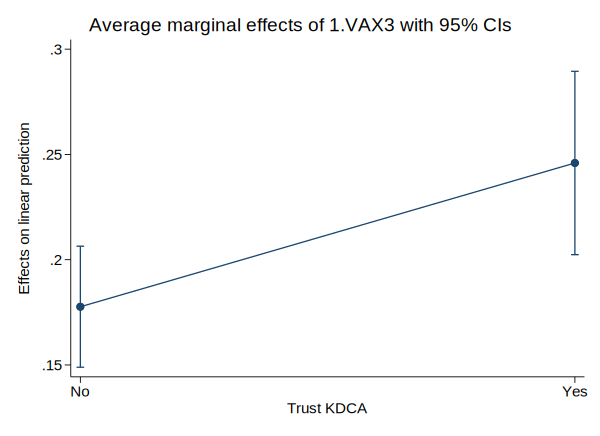

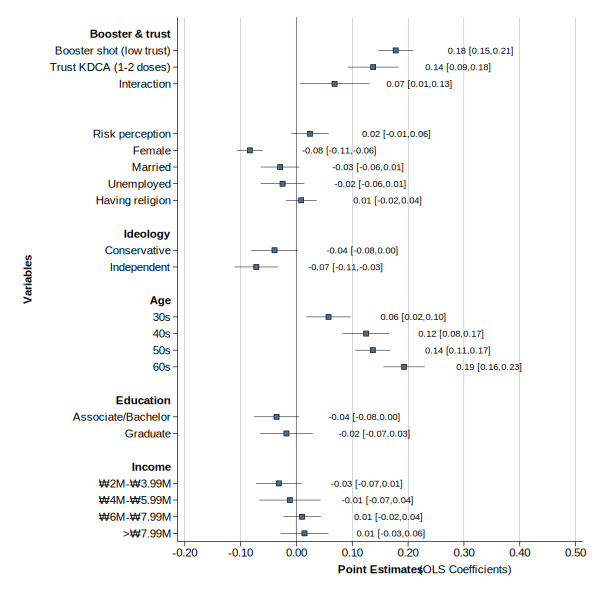






file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\01_Vaccination\Fig2.gph saved

file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\01_Vaccination\Fig2.jpg written in JPEG format


Figure 2
-------------------------------------
                               (1)   
                   Will to Another   
-------------------------------------
3 or more                   0.1777***
                       [0.15,0.21]   
Yes                         0.1376***
                       [0.09,0.18]   
3 or more # Yes             0.0683*  
                       [0.01,0.13]   
Yes                         0.0243   
                      [-0.01,0.06]   
Female                     -0.0834***
                     [-0.11,-0.06]   
Married                    -0.0290   
                      [-0.06,0.01]   
Unemployed                 -0.0249   
                      [-0.06,0.01]   
Religion                    0.0086   
                      [-0.02,0.04]  

r(198);
r(198);


In [40]:
use "_Merged", clear
keep if DATA=="Vaccine"
drop if vc001==4 & WAVE<=2
drop if vc001==5 & WAVE>2
svyset [pweight=weight], strata(EDU)

loc controls i.COVID_EXGG i.FEMALE i.MS i.UNEMPLOYED i.REL i.IDEOLOGY i.AGE i.EDU i.INCOME i.WAVE
loc title2 "A. Willingness to Get Another (After the 1st or the 2nd Shot, n = 1,748)"
loc title3 "B. Willingness to Get Another (After the 3rd Shot, n = 3,562)"
loc xrange -0.2(0.1)0.5

eststo lm2: qui xtreg VAX_ADD i.VAX3##i.TR_KDCA `controls' [pw=Pweight], fe vce(cluster prvc)
margins, dydx(TR_KDCA)
margins VAX3, dydx(TR_KDCA)
margins TR_KDCA, dydx(VAX3)
marginsplot
qui coefplot (lm2, label(Logit) mfcolor(navy*0.8)) || ///
           , drop(*.WAVE _cons) ///
             headings(1.VAX3="{bf:Booster & trust}" 0.TR_KDCA="{bf:Trust in the KDCA}" 1.IDEOLOGY = "{bf:Ideology}" ///
                 1.COVID_EXGG = " " 0.FEMALE = "{bf:Gender}" ///
                 1.AGE = "{bf:Age}" 0.MS = "{bf:Marital Status}" 0.UNEMPLOYED = "{bf:Unemployed}" 0.REL = "{bf:Having a Religion}" 1.EDU = "{bf:Education}" ///
                 1.INCOME = "{bf:Income}") ///
             coeflabels(1.VAX3="Booster shot (low trust)" 1.TR_KDCA="Trust KDCA (1-2 doses)" 1.VAX3#1.TR_KDCA="Interaction" ///
                        1.COVID_EXGG="Risk perception" 1.FEMALE="Female" 1.MS="Married" 1.UNEMPLOYED="Unemployed" 1.REL="Having religion" ///
                        1.IDEOLOGY="Conservative" 2.IDEOLOGY="Independent") ///
             xtitle("{bf:Point Estimates} (OLS Coefficients)", margin(small)) ytitle({bf:Variables}, margin(small)) ///
             xlabel(`xrange', grid glcolor(gs4)) ylabel(, nogrid) byopts(row(1)) ///
             mlabel("     " + string(@b, "%9.2f") + " [" + string(@ll, "%9.2f") + "," + string(@ul, "%9.2f") + "]") mlabformat("%9.2f") ///
             xline(0, lcolor(gray) lwidth(medium)) ///
             plotregion(lwidth(thin) lpattern(solid)) ///
             msize(medium) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
             ciopts(recast(rspike) lcolor(black) lwidth(vthin)) mlabel format(%9.2f) mlabcolor(black) mlabposition(3) mlabgap(15) ///
             graphregion(fcolor(white) color(white) icolor(white) margin(small)) ///
             legend(off) ///
             name(g1, replace)

graph combine g1, ///
        b1("") ycommon xcommon ///
        l1("") ///
        xsize(12) ysize(12) iscale(*0.55)
graph save "$outputs1\Fig2.gph", replace
graph export "$outputs1\Fig2.jpg", replace

esttab lm2 ///
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Figure 2) nogaps ///
    varwidth(18) modelwidth(15) nobase label
esttab lm2 ///
    ,replace b(4) P(5) r2(2) ar2(2) scalar(F) ///
    title(Figure 2) nogaps ///
    varwidth(18) modelwidth(15) nobase label
esttab lm2  ///
    using "$outputs1\Appendix_Fig2.rtf" ///
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Figure 2) nogaps ///
    varwidth(18) modelwidth(15) nobase label

### Backup

In [5]:
use "HBK_W1_W2_clean", clear;
drop if vc001==4;

loc controls i.FEMALE i.AGE i.EDU i.MS i.JOB i.REL i.INCOME i.WAVE;
loc title1 "A. Vaccination";
loc title2 "B. Effectiveness";
loc title3 "C. Side Effects";
loc title4 "D. Social Benefits";
loc xrange 0(1)6;

eststo lm1: qui xtlogit VAX3 i.TR_KDCA i.IDEOLOGY `controls', vce(cluster prvc) or;
eststo lm2: qui xtlogit VAX_EFF i.TR_KDCA i.IDEOLOGY `controls', vce(cluster prvc) or;
eststo lm3: qui xtlogit VAX_SIDE i.TR_KDCA i.IDEOLOGY `controls', vce(cluster prvc) or;
eststo lm4: qui xtlogit VAX_BNF i.TR_KDCA i.IDEOLOGY `controls', vce(cluster prvc) or;
eststo lm5: qui xtologit VAX i.TR_KDCA i.IDEOLOGY `controls', vce(cluster prvc) or;
eststo lm6: qui xtologit vc005a i.TR_KDCA i.IDEOLOGY `controls', vce(cluster prvc) or;
eststo lm7: qui xtologit vc005b i.TR_KDCA i.IDEOLOGY `controls', vce(cluster prvc) or;
eststo lm8: qui xtologit vc005c i.TR_KDCA i.IDEOLOGY `controls', vce(cluster prvc) or;
qui coefplot (lm5, label(Ordered logit) mfcolor(gs8*0.8)) (lm1, label(Logit) mfcolor(navy*0.8)), bylabel("`title1'") ||
             (lm6, label(Ordered logit) mfcolor(gs8*0.8)) (lm2, label(Logit) mfcolor(navy*0.8)), bylabel("`title2'") ||
             (lm7, label(Ordered logit) mfcolor(gs8*0.8)) (lm3, label(Logit) mfcolor(navy*0.8)), bylabel("`title3'") ||
             (lm8, label(Ordered logit) mfcolor(gs8*0.8)) (lm4, label(Logit) mfcolor(navy*0.8)), bylabel("`title4'") ||
           , eform baselevels drop(_cons)
             headings(0.TR_CDC="{bf:Trust in KDCA}" 0.IDEOLOGY = "{bf:Ideology}" 0.FEMALE = "{bf:Gender}" 0.AGE = "{bf:Age}" 0.EDU = "{bf:Education}" 0.MS = "{bf:Martial Status}" 0.JOB = "{bf:Occupation}" 0.REL = "{bf:Religion}" 0.INCOME = "{bf:Income}")
             coeflabels(0.TR_CDC="No" 1.TR_CDC="Yes" 0.REL="No" 1.REL="Yes")             
             xtitle("{bf:Point Estimates} (Odds Ratio)", margin(small)) ytitle({bf:Variables}, margin(small))
             xlabel(`xrange', grid glcolor(gs4)) ylabel(, nogrid) byopts(row(1))
             xline(1, lcolor(gray) lwidth(medium))
             plotregion(lwidth(thin) lpattern(solid))
             msize(medium) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black)
             ciopts(recast(rspike) lcolor(black) lwidth(vthin)) *mlabel format(%9.1f) mlabcolor(black) mlabposition(2) mlabgap(*2)
             graphregion(fcolor(white) color(white) icolor(white) margin(small))
             legend(pos(6) rowgap(0.5) row(2) size(*0.75) ring(6) symx(*.75) symy(*.75) forcesize)
             name(g1, replace);

graph combine g1,
        b1("") ycommon xcommon
        l1("")
        xsize(12) ysize(7) iscale(*0.6);
graph save "$outputs1\Fig1.gph", replace;
graph export "$outputs1\Fig1.jpg", replace;

esttab lm1 lm2 lm3 lm4 lm5 lm6 lm7 lm8
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) eform
    title(Figure 1) nogaps
    varwidth(18) modelwidth(15) nobase label;
esttab lm1 lm2 lm3 lm4
    using "$outputs1\Appendix_Fig1_1.rtf"
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) eform
    title(Figure 1-1) nogaps
    varwidth(18) modelwidth(15) nobase label;
esttab lm5 lm6 lm7 lm8
    using "$outputs1\Appendix_Fig1_2.rtf"
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) eform
    title(Figure 1-2) nogaps
    varwidth(18) modelwidth(15) nobase label;


option ; not allowed


r(198);
r(198);


## Appendix 5



(2,000 observations deleted)

(148 observations deleted)

(168 observations deleted)


Sampling weights: weight
             VCE: linearized
     Single unit: missing
        Strata 1: EDU
 Sampling unit 1: <observations>
           FPC 1: <zero>


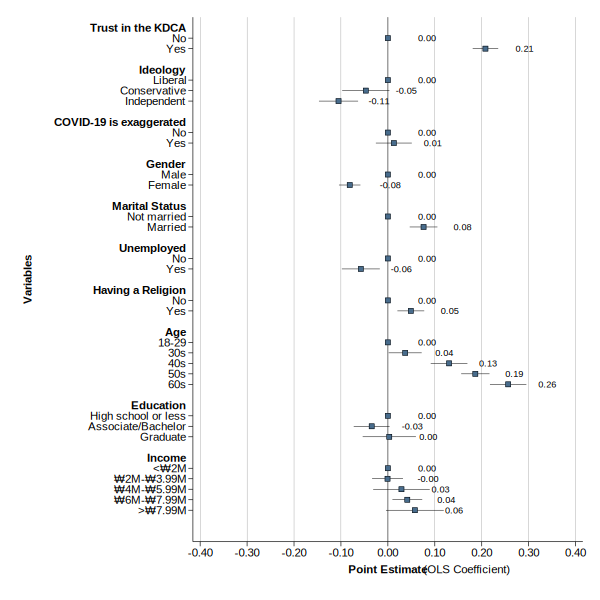

















































file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\01_Vaccination\Appendix5.gph saved

file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\01_Vaccination\Appendix5.jpg written in JPEG format


In [36]:
use "_Merged", clear
keep if DATA=="Vaccine"
drop if vc001==4 & WAVE<=2
drop if vc001==5 & WAVE>2
svyset [pweight=weight], strata(EDU)

loc vars i.TR_KDCA i.IDEOLOGY i.COVID_EXGG i.FEMALE i.MS i.UNEMPLOYED i.REL i.AGE i.EDU i.INCOME
loc title1 "A. Booster Vaccination"
loc title2 "B. Willingness to Get Another (After the 2nd)"
loc xrange -0.4(0.1)0.4

matrix M = J(28, 3, .)
matrix coln M = Beta LI95 UI95

qui xtreg VAX_ADD i.TR_KDCA i.WAVE, fe vce(cluster prvc)
matrix M[1,1] = r(table)[1,1], r(table)[5,1], r(table)[6,1]
matrix M[2,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
qui xtreg VAX_ADD i.IDEOLOGY i.WAVE, fe vce(cluster prvc)
matrix M[3,1] = r(table)[1,1], r(table)[5,1], r(table)[6,1]
matrix M[4,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
matrix M[5,1] = r(table)[1,3], r(table)[5,3], r(table)[6,3]
qui xtreg VAX_ADD i.COVID_EXGG i.WAVE, fe vce(cluster prvc)
matrix M[6,1] = r(table)[1,1], r(table)[5,1], r(table)[6,1]
matrix M[7,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
qui xtreg VAX_ADD i.FEMALE i.WAVE, fe vce(cluster prvc)
matrix M[8,1] = r(table)[1,1], r(table)[5,1], r(table)[6,1]
matrix M[9,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
qui xtreg VAX_ADD i.MS i.WAVE, fe vce(cluster prvc)
matrix M[10,1] = r(table)[1,1], r(table)[5,1], r(table)[6,1]
matrix M[11,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
qui xtreg VAX_ADD i.UNEMPLOYED i.WAVE, fe vce(cluster prvc)
matrix M[12,1] = r(table)[1,1], r(table)[5,1], r(table)[6,1]
matrix M[13,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
qui xtreg VAX_ADD i.REL i.WAVE, fe vce(cluster prvc)
matrix M[14,1] = r(table)[1,1], r(table)[5,1], r(table)[6,1]
matrix M[15,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
qui xtreg VAX_ADD i.AGE i.WAVE, fe vce(cluster prvc)
matrix M[16,1] = r(table)[1,1], r(table)[5,1], r(table)[6,1]
matrix M[17,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
matrix M[18,1] = r(table)[1,3], r(table)[5,3], r(table)[6,3]
matrix M[19,1] = r(table)[1,4], r(table)[5,4], r(table)[6,4]
matrix M[20,1] = r(table)[1,5], r(table)[5,5], r(table)[6,5]
qui xtreg VAX_ADD i.EDU i.WAVE, fe vce(cluster prvc)
matrix M[21,1] = r(table)[1,1], r(table)[5,1], r(table)[6,1]
matrix M[22,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
matrix M[23,1] = r(table)[1,3], r(table)[5,3], r(table)[6,3]
qui xtreg VAX_ADD i.INCOME i.WAVE, fe vce(cluster prvc)
matrix M[24,1] = r(table)[1,1], r(table)[5,1], r(table)[6,1]
matrix M[25,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
matrix M[26,1] = r(table)[1,3], r(table)[5,3], r(table)[6,3]
matrix M[27,1] = r(table)[1,4], r(table)[5,4], r(table)[6,4]
matrix M[28,1] = r(table)[1,5], r(table)[5,5], r(table)[6,5]

qui coefplot (matrix(M[,1]), label(Wave 1) ci((2 3)) msymbol(S) mfcolor(navy*0.8)) ///
     , xtitle(, margin(small)) ///
       ytitle("Marginal Effect", margin(tiny)) ///
       msymbol(s) byopts(cols(6)) ///
       headings(r1="{bf:Trust in the KDCA}" r3 = "{bf:Ideology}" ///
                 r6 = "{bf:COVID-19 is exaggerated}" r8 = "{bf:Gender}" ///
                 r10 = "{bf:Marital Status}" r12 = "{bf:Unemployed}" r14 = "{bf:Having a Religion}" ///
                 r16 = "{bf:Age}" r21 = "{bf:Education}" r24 = "{bf:Income}") ///       
       coeflabels(r1 = "No" r2 = "Yes" r3 = "Liberal" r4 = "Conservative" r5 = "Independent" ///
                  r6 = "No" r7 = "Yes" r8 = "Male" r9 = "Female" r10 = "Not married" r11 = "Married" ///
                  r12 = "No" r13 = "Yes" r14 = "No" r15 = "Yes" ///
                  r16 = "18-29" r17 = "30s" r18 = "40s" r19 = "50s" r20 = "60s" ///
                  r21 = "High school or less" r22 = "Associate/Bachelor" r23 = "Graduate" ///
                  r24 = "<₩2M" r25 = "₩2M-₩3.99M" r26 = "₩4M-₩5.99M" r27 = "₩6M-₩7.99M" r28 = ">₩7.99M") ///
       xtitle("{bf:Point Estimate} (OLS Coefficient)", margin(small)) ytitle({bf:Variables}, margin(small)) ///
       xlabel(`xrange', grid glcolor(gs4)) ylabel(, nogrid) ///
       xline(0, lcolor(gray) lwidth(medium)) ///
       plotregion(lwidth(thin) lpattern(solid)) ///
       msize(medium) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
       ciopts(recast(rspike) lcolor(black) lwidth(vthin)) mlabel format(%9.2f) mlabcolor(black) mlabposition(3) mlabgap(*12) ///
       graphregion(fcolor(white) color(white) icolor(white) margin(small)) ///
       legend(off) ///
       name(g1, replace)
graph combine g1, ///
    b1("") ycommon xcommon ///
    l1("") ///
    xsize(12) ysize(12) iscale(*0.55)
graph save "$outputs1\Appendix5.gph", replace
graph export "$outputs1\Appendix5.jpg", replace

## Appendix 6



(2,000 observations deleted)

(148 observations deleted)

(168 observations deleted)


Sampling weights: weight
             VCE: linearized
     Single unit: missing
        Strata 1: EDU
 Sampling unit 1: <observations>
           FPC 1: <zero>


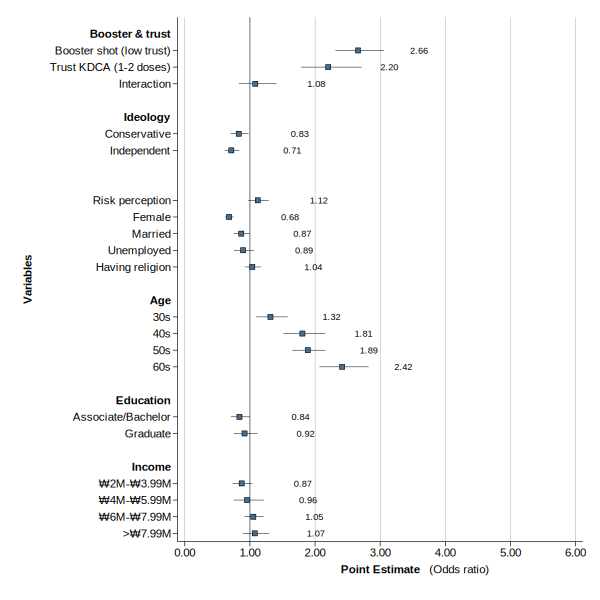










file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\01_Vaccination\Appendix6.gph saved

file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\01_Vaccination\Appendix6.jpg written in JPEG format


Appendix 6
-------------------------------------
                               (1)   
                   Will to Another   
-------------------------------------
Will to Another                      
3 or more                   2.6594***
                       [2.31,3.06]   
Yes                         2.2019***
                       [1.79,2.71]   
3 or more # Yes             1.0827   
                       [0.83,1.41]   
Conservative                0.8275*  
                       [0.70,0.98]   
Independent                 0.7146***
                       [0.61,0.84]   
Yes                         1.1204   
                       [0.97,1.29]   
Female                      0.6799***
                       [0.62,0.75]   
Married             

In [5]:
use "_Merged", clear
keep if DATA=="Vaccine"
drop if vc001==4 & WAVE<=2
drop if vc001==5 & WAVE>2
svyset [pweight=weight], strata(EDU)

loc controls i.COVID_EXGG i.FEMALE i.MS i.UNEMPLOYED i.REL i.AGE i.EDU i.INCOME i.WAVE
loc title2 "A. Willingness to Get Another (After the 1st or the 2nd Shot, n = 1,748)"
loc title3 "B. Willingness to Get Another (After the 3rd Shot, n = 3,562)"
loc xrange 0(1)6

eststo lm2: qui xtlogit VAX_ADD i.VAX3##i.TR_KDCA i.IDEOLOGY `controls', or vce(cluster prvc)
*eststo lm3: qui xtlogit VAX_ADD i.TR_KDCA i.IDEOLOGY `controls' if VAX==3, or vce(cluster prvc)
qui coefplot (lm2, label(Logit) mfcolor(navy*0.8)) || ///
           , eform drop(*.WAVE _cons) ///
             headings(1.VAX3="{bf:Booster & trust}" 0.TR_KDCA="{bf:Trust in the KDCA}" 1.IDEOLOGY = "{bf:Ideology}" ///
                 1.COVID_EXGG = " " 0.FEMALE = "{bf:Gender}" ///
                 1.AGE = "{bf:Age}" 0.MS = "{bf:Marital Status}" 0.UNEMPLOYED = "{bf:Unemployed}" 0.REL = "{bf:Having a Religion}" 1.EDU = "{bf:Education}" ///
                 1.INCOME = "{bf:Income}") ///
             coeflabels(1.VAX3="Booster shot (low trust)" 1.TR_KDCA="Trust KDCA (1-2 doses)" 1.VAX3#1.TR_KDCA="Interaction" ///
                        1.COVID_EXGG="Risk perception" 1.FEMALE="Female" 1.MS="Married" 1.UNEMPLOYED="Unemployed" 1.REL="Having religion" ///
                        1.IDEOLOGY="Conservative" 2.IDEOLOGY="Independent") ///
             xtitle("{bf:Point Estimate} (Odds ratio)", margin(small)) ytitle({bf:Variables}, margin(small)) ///
             xlabel(`xrange', grid glcolor(gs4)) ylabel(, nogrid) byopts(row(1)) ///
             xline(1, lcolor(gray) lwidth(medium)) ///
             plotregion(lwidth(thin) lpattern(solid)) ///
             msize(medium) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
             ciopts(recast(rspike) lcolor(black) lwidth(vthin)) mlabel format(%9.2f) mlabcolor(black) mlabposition(3) mlabgap(15) ///
             graphregion(fcolor(white) color(white) icolor(white) margin(small)) ///
             legend(off) ///
             name(g1, replace)

graph combine g1, ///
        b1("") ycommon xcommon ///
        l1("") ///
        xsize(12) ysize(12) iscale(*0.55)
graph save "$outputs1\Appendix6.gph", replace
graph export "$outputs1\Appendix6.jpg", replace

esttab lm2 ///
    , eform replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Appendix 6) nogaps ///
    varwidth(18) modelwidth(15) nobase label
esttab lm2  ///
    using "$outputs1\Appendix6.rtf" ///
    , eform replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Appendix 4) nogaps ///
    varwidth(18) modelwidth(15) nobase label

## Figure 2

In [4]:
loc controls FEMALE i.AGE i.EDU MS i.JOB REL i.INCOME;
loc title1 "A. Trust in the KDCA";
loc title2 "B. Trust in the President";
loc yrange 0(1)6;

eststo lm1: qui xtlogit VAX_BI i.TR_CDC##i.IDEOLOGY `controls', vce(cluster prvc);
matrix M1 = J(3, 3, .);
matrix coln M1 = Beta LI95 UI95;
qui lincom 1.TR_CDC;
matrix M1[1,1] = r(estimate), r(lb), r(ub);
qui lincom 1.TR_CDC + 1.TR_CDC#1.IDEOLOGY;
matrix M1[2,1] = r(estimate), r(lb), r(ub);
qui lincom 1.TR_CDC + 1.TR_CDC#2.IDEOLOGY;
matrix M1[3,1] = r(estimate), r(lb), r(ub);

eststo lm2: qui xtologit VAX i.TR_CDC##i.IDEOLOGY `controls', vce(cluster prvc);
matrix M2 = J(3, 3, .);
matrix coln M2 = Beta LI95 UI95;
qui lincom 1.TR_CDC;
matrix M2[1,1] = r(estimate), r(lb), r(ub);
qui lincom 1.TR_CDC + 1.TR_CDC#1.IDEOLOGY;
matrix M2[2,1] = r(estimate), r(lb), r(ub);
qui lincom 1.TR_CDC + 1.TR_CDC#2.IDEOLOGY;
matrix M2[3,1] = r(estimate), r(lb), r(ub);

qui coefplot (matrix(M1[,1]), eform ci((2 3)) label(Logit: 1 if boostered))
             (matrix(M2[,1]), eform ci((2 3)) label(Ordinal: Never, 1st, 2nd, Booster or more) mfcolor(gs8*0.8)),
             coeflabels(r1="Liberal" r2="Independent" r3="Conservative", wrap(30))
             title("`title1'")
             xtitle({bf:Political Propensity}, margin(small)) ytitle("{bf:Effect of Trust in the KCDC} (Odds Ratio)", margin(small))
             xlabel(, nogrid) ylabel(`yrange', angle(90) grid glcolor(gs4))
             yline(1, lcolor(gray) lwidth(medium))
             plotregion(lwidth(thin) lpattern(solid))
             msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black)
             ciopts(recast(rspike) lcolor(black) lwidth(vthin)) *mlabel format(%9.1f) mlabcolor(black) mlabposition(2) mlabgap(*2)
             graphregion(fcolor(white) color(white) icolor(white) margin(small)) vertical
             legend(off)
             name(g1, replace);

eststo lm3: qui xtologit VAX i.TR_PRES##i.IDEOLOGY `controls', vce(cluster prvc);
matrix M1 = J(3, 3, .);
matrix coln M1 = Beta LI95 UI95;
qui lincom 1.TR_PRES;
matrix M1[1,1] = r(estimate), r(lb), r(ub);
qui lincom 1.TR_PRES + 1.TR_PRES#1.IDEOLOGY;
matrix M1[2,1] = r(estimate), r(lb), r(ub);
qui lincom 1.TR_PRES + 1.TR_PRES#2.IDEOLOGY;
matrix M1[3,1] = r(estimate), r(lb), r(ub);

eststo lm4: qui xtlogit VAX_BI i.TR_PRES##i.IDEOLOGY `controls', vce(cluster prvc);
matrix M2 = J(3, 3, .);
matrix coln M2 = Beta LI95 UI95;
qui lincom 1.TR_PRES;
matrix M2[1,1] = r(estimate), r(lb), r(ub);
qui lincom 1.TR_PRES + 1.TR_PRES#1.IDEOLOGY;
matrix M2[2,1] = r(estimate), r(lb), r(ub);
qui lincom 1.TR_PRES + 1.TR_PRES#2.IDEOLOGY;
matrix M2[3,1] = r(estimate), r(lb), r(ub);

qui coefplot (matrix(M1[,1]), eform ci((2 3)) label(Logit: 1 if boostered))
             (matrix(M2[,1]), eform ci((2 3)) label(Ordinal: Never, 1st, 2nd, Booster or more) mfcolor(gs8*0.8)),
             coeflabels(r1="Liberal" r2="Independent" r3="Conservative", wrap(30))
             title("`title2'")
             xtitle({bf:Political Propensity}, margin(small)) ytitle("{bf:Effect of Trust in the President} (Odds Ratio)", margin(small))
             xlabel(, nogrid) ylabel(`yrange', angle(90) grid glcolor(gs4))
             yline(1, lcolor(gray) lwidth(medium))
             plotregion(lwidth(thin) lpattern(solid))
             msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black)
             ciopts(recast(rspike) lcolor(black) lwidth(vthin)) *mlabel format(%9.1f) mlabcolor(black) mlabposition(2) mlabgap(*2)
             graphregion(fcolor(white) color(white) icolor(white) margin(small)) vertical
             legend(position(11) rowgap(0.5))
             name(g2, replace);

graph combine g1 g2,
        b1("") ycommon
        l1("") cols(2)
        xsize(12) ysize(7) iscale(*1);
graph save "$outputs1\Fig2.gph", replace;
graph export "$outputs1\Fig2.jpg", replace;

esttab lm1 lm2 lm3 lm4
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F)
    title(Figure 2) nogaps
    varwidth(18) modelwidth(15) nobase label;
esttab lm1 lm2 lm3 lm4
    using "$outputs1\Appendix_Fig2.rtf"
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F)
    title(Figure 2) nogaps
    varwidth(18) modelwidth(15) nobase label;



invalid syntax


r(198);
r(198);


# Topic 2. Pregnancy Experiment

## Descriptive Statistics

In [2]:
* Vaccine survey data
use "HBK_W1_W4_clean", clear
keep if WAVE==1

* Weighting
merge m:1 DATA EDU using "PSweight_edu.dta"
gen pct_sample = .
replace pct_sample = count_sample/1500
gen weight = pct_pop/pct_sample
gen Pweight = totalpop / sample
drop if _merge==2

save "_MergedW1.dta", replace



(4,500 observations deleted)


    Result                      Number of obs
    -----------------------------------------
    Not matched                             3
        from master                         0  (_merge==1)
        from using                          3  (_merge==2)

    Matched                             1,500  (_merge==3)
    -----------------------------------------

(1,503 missing values generated)

(1,500 real changes made)

(3 missing values generated)


(3 observations deleted)

file _MergedW1.dta saved


In [3]:
capt prog drop ctab
program ctab, eclass
    syntax varlist [if] [in]
    * Row 1: No. of Observations
    qui tab exp1 if WAVE==1
    matrix temp = r(N)
    local c1 = temp[1,1]
    qui tab exp1 if exp1==3 & WAVE == 1
    matrix temp = r(N)
    local c2 = temp[1,1]
    qui tab exp1 if exp1==1 & WAVE == 1
    matrix temp = r(N)
    local c3 = temp[1,1]
    qui tab exp1 if exp1==2 & WAVE == 1
    matrix temp = r(N)
    local c4 = temp[1,1]
    mat M = (`c1',`c2',`c3',`c4', 0)
    mat rownames M = "No of Obs"
    mat colnames M = "All" "Control" "COVID Risk" "Side Effects" "Chi-squared"

    local num = 0
    foreach x in `varlist'{
        local num = `num' + 1

        qui sum `x' if WAVE ==1
        matrix temp = r(mean)
        local m1 = temp[1,1]*100
        qui sum `x' if exp1==3 & WAVE==1
        matrix temp = r(mean)
        local m2 = temp[1,1]*100
        qui sum `x' if exp1==1 & WAVE==1
        matrix temp = r(mean)
        local m3 = temp[1,1]*100
        qui sum `x' if exp1==2 & WAVE==1
        matrix temp = r(mean)
        local m4 = temp[1,1]*100
        qui tab `x' exp1, chi
        mat temp = r(p)
        local m5 = temp[1,1]

        mat temp = (`m1',`m2',`m3',`m4',`m5')
        local rowname: variable label `x'
        mat rownames temp = "`rowname'"
        mat M = M\temp
        *mat M = M[1..3,1...]
    }
    esttab matrix(M, fmt("0 2"))
    esttab matrix(M, fmt("0 2")) using "$outputs2\Table1.rtf", replace
end

In [4]:
use "_MergedW1", clear
keep if WAVE==1

qui tab IDEOLOGY, gen(IDEOLOGY_)
label var IDEOLOGY_1 "Liberal"
label var IDEOLOGY_2 "Independent"
label var IDEOLOGY_3 "Conservative"
qui tab AGE, gen(AGE_)
qui tab EDU, gen(EDU_)
label var EDU_1 "High school or less"
label var EDU_2 "BA"
label var EDU_3 "MA or more"
qui tab JOB, gen(JOB_)
label var JOB_1 "Employees"
label var JOB_2 "Health care workers"
label var JOB_3 "Unemployed/other"
qui tab INCOME, gen(INCOME_)
label var INCOME_1 "<₩2M"
label var INCOME_2 "₩2M-₩3.99M"
label var INCOME_3 "₩4M-₩5.99M"
label var INCOME_4 "₩6M-₩7.99M"
label var INCOME_5 ">₩7.99M"

ctab EXP1_OUTCOME1 VAX_EFF VAX_SIDE FEMALE REL IDEOLOGY_1-IDEOLOGY_3 AGE_1-AGE_5 EDU_1-EDU_3 MS JOB_1-JOB_3 REL INCOME_1-INCOME_5



(0 observations deleted)





















-----------------------------------------------------------------------------
                        M                                                    
                      All      Control   COVID Risk Side Effects  Chi-squared
-----------------------------------------------------------------------------
No of Obs            1500          500          500          500            0
RECODE of~1)        37.40        37.60        42.60        32.00         0.00
Perc Effec~s        53.73        52.00        54.20        55.00         0.62
Perc Side ~s        46.87        44.20        48.60        47.80         0.33
Female              49.07        48.80        49.20        49.20         0.99
Religiosity         46.87        46.60        45.60        48.40         0.67
Liberal             23.60        24.00        24.20        22.60         0.81
Independent         23.27        23.40        22.40        24.00         0.83
Conservative    

## Estimations

In [10]:
capt drop EXP1
gen EXP1 = 0
replace EXP1 = 1 if exp1==1
replace EXP1 = 2 if exp1==2




(500 real changes made)

(500 real changes made)


In [11]:
qui margins, dydx(EXP1)
matrix M1[1,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
matrix M1[2,1] = r(table)[1,3], r(table)[5,3], r(table)[6,3]
qui margins VAX_SIDE, dydx(EXP1)
matrix M2[1,1] = r(table)[1,4], r(table)[5,4], r(table)[6,4]
matrix M2[2,1] = r(table)[1,6], r(table)[5,6], r(table)[6,6]
matrix M3[1,1] = r(table)[1,3], r(table)[5,3], r(table)[6,3]
matrix M3[2,1] = r(table)[1,5], r(table)[5,5], r(table)[6,5]


last estimates not found


r(301);
r(301);


In [ ]:
qui coefplot (matrix(IMG[,1]), ci((2 3)) mfcolor(gs8*0.8)),
         title("A. Effects of Lesions Image")
         coeflabels(r1=`""Vaccine" "Intention""' r2=`""Worried About" "Monkeypox""'
                    r3=" " r4=`""Korean-entry" "Inspections""' r5=`""Masks in" "Transportation""' r6=`""Social" "Distancing""'
                    r7=`""Vaccine" "Production""' r8=`""Travel Ban" "from Africa""' r9=`""Restricting" "LGBTQ Events""', wrap(30))
         xlabel(`xrange') ylabel(, nogrid)
         xline(0, lcolor(gray) lwidth(medium))
         plotregion(lwidth(thin) lpattern(solid))
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black)
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) *mlabel format(%9.1f) mlabcolor(black) mlabposition(2) mlabgap(*2)
         graphregion(fcolor(white) color(white) icolor(white) margin(small))
         legend(off)
         name(g1, replace);

In [57]:
loc controls i.IDEOLOGY i.AGE i.EDU MS i.JOB REL i.INCOME;
xtreg EXP1_OUTCOME1 i.EXP1##i.VAX_SIDE `controls', vce(cluster prvc);
margins VAX_SIDE, dydx(EXP1);
mat li r(table);

qui xtreg EXP1_OUTCOME1 i.EXP1##i.VAX_SIDE `controls', fe vce(cluster prvc);
lincom 1.EXP1 + 1.EXP1#1.VAX_SIDE + 1.VAX_SIDE;




Random-effects GLS regression                   Number of obs     =      1,500
Group variable: prvc                            Number of groups  =         17

R-squared:                                      Obs per group:
     Within  = 0.0884                                         min =         14
     Between = 0.0414                                         avg =       88.2
     Overall = 0.0880                                         max =        397

                                                Wald chi2(16)     =          .
corr(u_i, X) = 0 (assumed)                      Prob > chi2       =          .

                                         (Std. err. adjusted for 17 clusters in prvc)
-------------------------------------------------------------------------------------
                    |               Robust
      EXP1_OUTCOME1 | Coefficient  std. err.      z    P>|z|     [95% conf. interval]
--------------------+--------------------------------------------------------

In [18]:
tab EXP1_OUTCOME1


  RECODE of |
     exp1_1 |
   (EXP1_1) |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        939       62.60       62.60
          1 |        561       37.40      100.00
------------+-----------------------------------
      Total |      1,500      100.00


In [20]:
loc controls i.VAX_SIDE i.IDEOLOGY i.AGE i.EDU MS i.JOB REL i.INCOME
qui xtreg EXP1_OUTCOME1 i.EXP1##i.FEMALE `controls', fe vce(cluster prvc)
margins FEMALE, dydx(EXP1)
mat li r(table)





Average marginal effects                                 Number of obs = 1,500
Model VCE: Robust

Expression: Linear prediction, predict()
dy/dx wrt:  1.EXP1 2.EXP1

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
0.EXP1       |  (base outcome)
-------------+----------------------------------------------------------------
1.EXP1       |
      FEMALE |
       Male  |   .0818003   .0311559     2.63   0.009     .0207359    .1428646
     Female  |   .0330281   .0402817     0.82   0.412    -.0459225    .1119787
-------------+----------------------------------------------------------------
2.EXP1       |
      FEMALE |
       Male  |  -.0242969   .0327902    -0.74   0.459    -.0885644    .0399707
     Female  |  -.0825183   .0332374    -2.48   0.013    -.1476624  















Average marginal effects                                 Number of obs = 1,500
Model VCE: Robust

Expression: Linear prediction, predict()
dy/dx wrt:  1.EXP1 2.EXP1

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
        EXP1 |
          1  |   .0578694   .0190492     3.04   0.002     .0205336    .0952051
          2  |  -.0528642   .0252311    -2.10   0.036    -.1023162   -.0034122
------------------------------------------------------------------------------
Note: dy/dx for factor levels is the discrete change from the base level.




Average marginal effects                                 Number of obs = 1,500
Model VCE: Robust

Expression: Linear prediction, predict()
dy/dx wrt:  1.EXP1 2.EXP1

------------------------------------------------

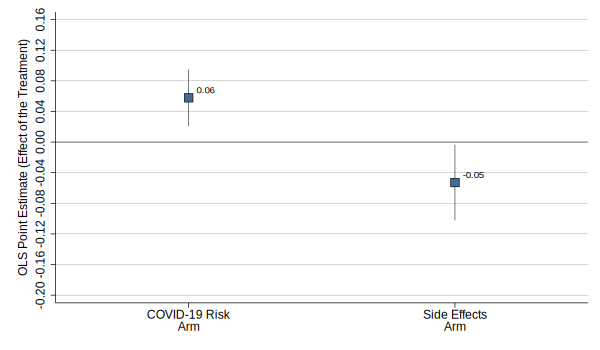










file C:\Users\chldy\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\02_Framing\Fig1.gph saved

file C:\Users\chldy\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\02_Framing\Fig1.jpg written in JPEG format


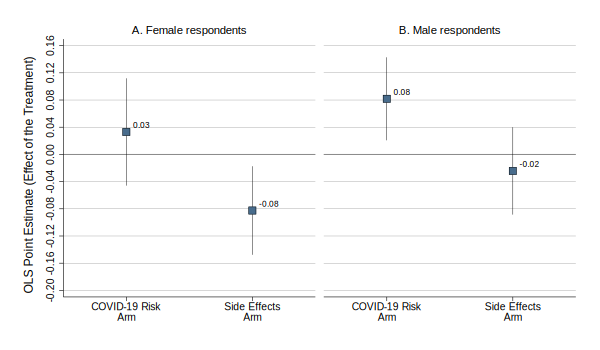




(file C:\Users\chldy\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\02_Framing\Fig2.gph not found)
file C:\Users\chldy\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\02_Framing\Fig2.gph saved

(file C:\Users\chldy\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\02_Framing\Fig2.jpg not found)
file C:\Users\chldy\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\02_Framing\Fig2.jpg written in JPEG format


Figure 1
-----------------------------------------------------
                               (1)                   
                   RECODE of ex~1)                   
-----------------------------------------------------
EXP1=1                      0.0818*       [0.02,0.15]
EXP1=2                     -0.0243       [-0.09,0.05]
Female                     -0.0387       [-0.13,0.06]
EXP1=1 # Female            -0.0488       [-0.18,0.08]
EXP1=2 # Female            -0.0582       [-0.15,0.03]
Yes                   

In [26]:
loc controls i.VAX_SIDE i.IDEOLOGY i.AGE i.EDU MS i.JOB REL i.INCOME
loc title1 `""A. All Sample" " ""'
loc title2 `""B. Vaccine Side Effects" "Are Serious""'
loc title3 `""C. Vaccine Side Effects" "Are Not Serious""'
loc yrange -0.2(0.04)0.16

matrix M1 = J(2, 3, .)
matrix coln M1 = Beta LI95 UI95
matrix M2 = J(2, 3, .)
matrix coln M2 = Beta LI95 UI95
matrix M3 = J(2, 3, .)
matrix coln M3 = Beta LI95 UI95

*eststo lm1: qui xtreg exp1_1 i.EXP1##i.FEMALE `controls', fe vce(cluster prvc)
eststo lm2: qui xtreg EXP1_OUTCOME1 i.EXP1##i.FEMALE `controls', fe vce(cluster prvc)

margins, dydx(EXP1)
matrix M1[1,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
matrix M1[2,1] = r(table)[1,3], r(table)[5,3], r(table)[6,3]
margins FEMALE, dydx(EXP1)
matrix M2[1,1] = r(table)[1,4], r(table)[5,4], r(table)[6,4]
matrix M2[2,1] = r(table)[1,6], r(table)[5,6], r(table)[6,6]
matrix M3[1,1] = r(table)[1,3], r(table)[5,3], r(table)[6,3]
matrix M3[2,1] = r(table)[1,5], r(table)[5,5], r(table)[6,5]

qui coefplot (matrix(M1[,1]), ci((2 3))) ///
           , coeflabels(r1=`""COVID-19 Risk" "Arm""' r2=`""Side Effects" "Arm""', wrap(30)) ///
             ytitle(OLS Point Estimate (Effect of the Treatment), margin(small)) ///
             xlabel(, nogrid) ylabel(`yrange', angle(90) grid glcolor(gs4)) ///
             yline(0, lcolor(gray) lwidth(medium)) ///
             plotregion(lwidth(thin) lpattern(solid)) ///
             msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
             ciopts(recast(rspike) lcolor(black) lwidth(vthin)) mlabel format(%9.2f) mlabcolor(black) mlabposition(2) mlabgap(*2) ///
             graphregion(fcolor(white) color(white) icolor(white) margin(small)) vertical ///
             legend(off) ///
             name(g1, replace)

qui coefplot (matrix(M2[,1]), ci((2 3))), bylabel("A. Female respondents") || ///
             (matrix(M3[,1]), ci((2 3))), bylabel("B. Male respondents") || ///
           , coeflabels(r1=`""COVID-19 Risk" "Arm""' r2=`""Side Effects" "Arm""', wrap(30)) ///
             ytitle(OLS Point Estimate (Effect of the Treatment), margin(small)) ///
             xlabel(, nogrid) ylabel(`yrange', angle(90) grid glcolor(gs4)) ///
             yline(0, lcolor(gray) lwidth(medium)) ///
             plotregion(lwidth(thin) lpattern(solid)) ///
             msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
             ciopts(recast(rspike) lcolor(black) lwidth(vthin)) mlabel format(%9.2f) mlabcolor(black) mlabposition(2) mlabgap(*2) ///
             graphregion(fcolor(white) color(white) icolor(white) margin(small)) vertical ///
             legend(off) ///
             name(g2, replace)

graph combine g1, ///
        b1("") ///
        l1("") cols(3) ///
        xsize(12) ysize(7) iscale(*1)
graph save "$outputs2\Fig1.gph", replace
graph export "$outputs2\Fig1.jpg", replace
graph combine g2, ///
        b1("") ///
        l1("") cols(3) ///
        xsize(12) ysize(7) iscale(*1)
graph save "$outputs2\Fig2.gph", replace
graph export "$outputs2\Fig2.jpg", replace

esttab lm2 ///
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Figure 1) nogaps wide ///
    varwidth(18) modelwidth(15) nobase label
esttab lm2 ///
    using "$outputs2\Appendix_Fig1.rtf" ///
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Figure 1-1) nogaps wide ///
    varwidth(18) modelwidth(15) nobase label

# Topic 3. "Policy As a Signal: Effects of Lifting Outdoore Mask Mandate on Mask Wearing in South Korea"

Policies change people's behavior as well as their thoughts (Soss, 1999). While many countries have begun to lifting up mask requirements, mask wearing is still a primary measure of preventing COVID-19. However, there have been concerns that these policy changes easing COVID-19 countermeasures unintentionally could give a wrong signal that those preventive measures are no longer effective (cit).

In this study, using an online survey collected right before and after lifting up the outdoore mask mandate in South Korea, we examine whether the government's decision influenced people's mask wearing behaviors and perceived effectiveness of mask wearing in preventing COVID-19. The results show that people were less likely to weare masks outside after the policy change. The effect was significant and stronger among who tend to believe that the risk of COVID-19 was exaggerated. The policy decision also affected the perceived effectiveness of mask wearing, making those who disagree that the risk of COVID-19 is exaggerated less likely to answer that mask wearing is effective in reducing the risk of COVID-19. 

## Descriptive Statistics

In [54]:
tab mask_mndt;


  MASK_MNDT |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        750       25.00       25.00
          1 |        750       25.00       50.00
          2 |      1,500       50.00      100.00
------------+-----------------------------------
      Total |      3,000      100.00


In [59]:
capt prog drop ctab;
program ctab, eclass;
    syntax varlist [if] [in];
    * Row 1: No. of Observations
    qui tab mask_mndt;
    matrix temp = r(N);
    local c1 = temp[1,1];
    qui tab mask_mndt if mask_mndt == 0;
    matrix temp = r(N);
    local c2 = temp[1,1];
    qui tab mask_mndt if mask_mndt == 1;
    matrix temp = r(N);
    local c3 = temp[1,1];
    qui tab mask_mndt if mask_mndt == 2;
    matrix temp = r(N);
    local c4 = temp[1,1];
    mat M = (`c1',`c2',`c3',`c4', 0);
    mat rownames M = "No of Obs";
    mat colnames M = "All" "Wave 1-1" "Wave 1-2" "Wave 2" "Chi-squared";

    local num = 0;
    foreach x in `varlist'{;
        local num = `num' + 1;

        qui sum `x';
        matrix temp = r(mean);
        local m1 = temp[1,1]*100;
        qui sum `x' if mask_mndt==0;
        matrix temp = r(mean);
        local m2 = temp[1,1]*100;
        qui sum `x' if mask_mndt==1;
        matrix temp = r(mean);
        local m3 = temp[1,1]*100;
        qui sum `x' if mask_mndt==2;
        matrix temp = r(mean);
        local m4 = temp[1,1]*100;
        qui tab `x' mask_mndt, chi;
        mat temp = r(p);
        local m5 = temp[1,1];

        mat temp = (`m1',`m2',`m3',`m4',`m5');
        local rowname: variable label `x';        
        mat rownames temp = "`rowname'";
        mat M = M\temp;
        *mat M = M[1..3,1...];
    };
    esttab matrix(M, fmt("0 2"));
    esttab matrix(M, fmt("0 2")) using "$outputs3\Table1.rtf", replace;
end;

In [62]:
use "HBK_W1_W2_clean", clear;
replace mask_mndt = 3 if mask_mndt==.;
replace mask_mndt = mask_mndt-1;

label var MASK_OUT "Outdoor Mask";
label var MASK_IN "Indoor Mask";

qui tab IDEOLOGY, gen(IDEOLOGY_);
label var IDEOLOGY_1 "Liberal";
label var IDEOLOGY_2 "Independent";
label var IDEOLOGY_3 "Conservative";
qui tab AGE, gen(AGE_);
qui tab EDU, gen(EDU_);
label var EDU_1 "High school or less";
label var EDU_2 "BA";
label var EDU_3 "MA or more";
qui tab INCOME, gen(INCOME_);
label var INCOME_1 "<₩2M";
label var INCOME_2 "₩2M-₩3.99M";
label var INCOME_3 "₩4M-₩5.99M";
label var INCOME_4 "₩6M-₩7.99M";
label var INCOME_5 ">₩7.99M";



(1,500 real changes made)

(3,000 real changes made)



















In [63]:
ctab MASK_OUT MASK_IN FEMALE REL IDEOLOGY_1-IDEOLOGY_3 AGE_1-AGE_5 EDU_1-EDU_3 INCOME_1-INCOME_5;


-----------------------------------------------------------------------------
                        M                                                    
                      All     Wave 1-1     Wave 1-2       Wave 2  Chi-squared
-----------------------------------------------------------------------------
No of Obs            3000          750          750         1500            0
Outdoor Mask        85.57        92.67        86.93        81.33         0.00
Indoor Mask         93.17        94.40        92.27        93.00         0.25
Female              49.03        50.27        47.87        49.00         0.65
Religiosity         46.43        48.40        45.33        46.00         0.44
Liberal             24.23        24.13        23.07        24.87         0.64
Independent         22.70        23.33        23.20        22.13         0.76
Conservative        53.07        52.53        53.73        53.00         0.89
AGE==18-29          19.53        15.33        23.73        19.5

## Figure 1

In [33]:
loc controls FEMALE i.AGE i.EDU MS i.JOB REL i.INCOME;
xtreg MASK_OUT i.mask_mndt##i.COVID_EXGG `controls', fe vce(cluster prvc);
margins, dydx(mask_mndt);
return list;
mat li r(table);




Fixed-effects (within) regression               Number of obs     =      1,500
Group variable: prvc                            Number of groups  =         17

R-squared:                                      Obs per group:
     Within  = 0.0508                                         min =         14
     Between = 0.0490                                         avg =       88.2
     Overall = 0.0518                                         max =        397

                                                F(16,16)          =          .
corr(u_i, Xb) = 0.0171                          Prob > F          =          .

                                          (Std. err. adjusted for 17 clusters in prvc)
--------------------------------------------------------------------------------------
                     |               Robust
            MASK_OUT | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
---------------------+---------------------------------------------------







Average marginal effects                                 Number of obs = 3,000
Model VCE: Robust

Expression: Linear prediction, predict()
dy/dx wrt:  1.mask_mndt 2.mask_mndt

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
   mask_mndt |
          1  |  -.0378001   .0108949    -3.47   0.001    -.0591537   -.0164466
          2  |   -.104346   .0137424    -7.59   0.000    -.1312806   -.0774114
------------------------------------------------------------------------------
Note: dy/dx for factor levels is the discrete change from the base level.






 ( 1)  2.mask_mndt + 2.mask_mndt#1.COVID_EXGG = 0

------------------------------------------------------------------------------
    MASK_OUT | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-

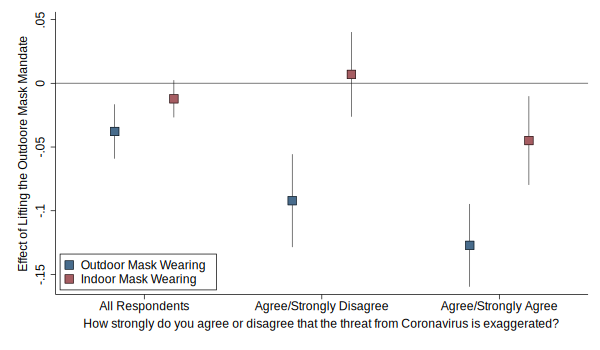











file C:\OneDrive\OneDrive - University at Albany - SUNY\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\03_MaskMandate\Fig1.gph saved

file C:\OneDrive\OneDrive - University at Albany - SUNY\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\03_MaskMandate\Fig1.jpg written in JPEG format


Figure 1
--------------------------------------------------------
                               (1)                (2)   
                      Outdoor Mask        Indoor Mask   
--------------------------------------------------------
MASK_MNDT=1                -0.0317            -0.0074   
                      [-0.06,0.00]       [-0.03,0.01]   
MASK_MNDT=2                -0.0921***          0.0070   
                     [-0.13,-0.06]       [-0.03,0.04]   
Yes                         0.0531*            0.0486** 
                       [0.01,0.09]        [0.02,0.08]   
MASK_MNDT=1 # Yes          -0.0174            -0.0136   
                      [-0.09,0.05]       [-0.0

In [64]:
loc controls FEMALE i.AGE i.EDU MS i.JOB REL i.INCOME;
eststo lm1: qui xtreg MASK_OUT i.mask_mndt##i.COVID_EXGG `controls', fe vce(cluster prvc);

matrix M1 = J(3, 3, .);
matrix coln M1 = Beta LI95 UI95;
margins, dydx(mask_mndt);
matrix M1[1,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2];
qui xtreg MASK_OUT i.mask_mndt##i.COVID_EXGG `controls', fe vce(cluster prvc);
qui lincom 2.mask_mndt;
matrix M1[2,1] = r(estimate), r(lb), r(ub);
lincom 2.mask_mndt + 2.mask_mndt#1.COVID_EXGG;
matrix M1[3,1] = r(estimate), r(lb), r(ub);

eststo lm2: qui xtreg MASK_IN i.mask_mndt##i.COVID_EXGG `controls', fe vce(cluster prvc);

matrix M2 = J(3, 3, .);
matrix coln M2 = Beta LI95 UI95;
margins, dydx(mask_mndt);
matrix M2[1,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2];
qui xtreg MASK_IN i.mask_mndt##i.COVID_EXGG `controls', fe vce(cluster prvc);
qui lincom 2.mask_mndt;
matrix M2[2,1] = r(estimate), r(lb), r(ub);
qui lincom 2.mask_mndt + 2.mask_mndt#1.COVID_EXGG;
matrix M2[3,1] = r(estimate), r(lb), r(ub);

qui coefplot (matrix(M1[,1]), ci((2 3)) label(Outdoor Mask Wearing))
             (matrix(M2[,1]), ci((2 3)) label(Indoor Mask Wearing)),
             coeflabels(r1="All Respondents" r2="Agree/Strongly Disagree" r3="Agree/Strongly Agree", wrap(30))
             title("")
             xtitle(How strongly do you agree or disagree that the threat from Coronavirus is exaggerated?, margin(small)) ytitle(Effect of Lifting the Outdoore Mask Mandate, margin(small))
             xlabel(, nogrid) ylabel(`yrange', angle(90))
             yline(0, lcolor(gray) lwidth(medium))
             plotregion(lwidth(thin) lpattern(solid))
             msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black)
             ciopts(recast(rspike) lcolor(black) lwidth(vthin)) *mlabel format(%9.1f) mlabcolor(black) mlabposition(2) mlabgap(*2)
             graphregion(fcolor(white) color(white) icolor(white) margin(small)) vertical
             legend(position(7) rowgap(0.5))
             name(g1, replace);

graph combine g1,
        b1("")
        l1("") cols(2)
        xsize(12) ysize(7) iscale(*1);
graph save "$outputs3\Fig1.gph", replace;
graph export "$outputs3\Fig1.jpg", replace;

esttab lm1 lm2
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F)
    title(Figure 1) nogaps
    varwidth(18) modelwidth(15) nobase label;
esttab lm1 lm2
    using "$outputs3\Appendix_Fig1_1.rtf"
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F)
    title(Figure 1-1) nogaps
    varwidth(18) modelwidth(15) nobase label;

## Appendix 2

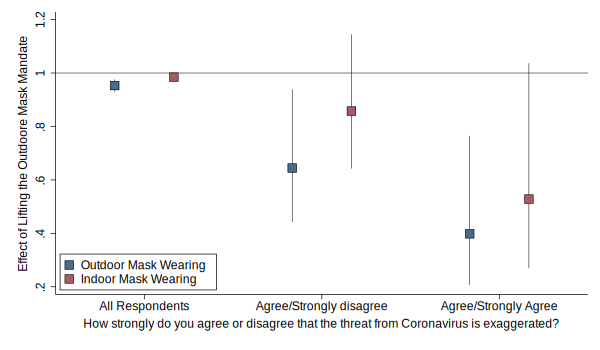


























file C:\OneDrive\OneDrive - University at Albany - SUNY\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\03_MaskMandate\Appendix1.gph saved

file C:\OneDrive\OneDrive - University at Albany - SUNY\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\03_MaskMandate\Appendix1.jpg written in JPEG format


Figure 1
--------------------------------------------------------
                               (1)                (2)   
                   RECODE of ~002)    RECODE of ~003)   
--------------------------------------------------------
main                                                    
MASK_MNDT=2                 0.6444*            0.8577   
                       [0.44,0.94]        [0.64,1.15]   
Yes                         2.3995*            2.8752*  
                       [1.17,4.92]        [1.25,6.62]   
MASK_MNDT=2 # Yes           0.6180             0.6159   
                       [0.27,1.41]        [0.29,1.29]   
Female               

In [40]:
loc controls FEMALE i.AGE i.EDU MS i.JOB REL i.INCOME;
eststo lm1: qui xtlogit MASK_OUT i.mask_mndt##i.COVID_EXGG `controls', vce(cluster prvc) or;

matrix M1 = J(3, 3, .);
matrix coln M1 = Beta LI95 UI95;
qui margins, dydx(mask_mndt);
matrix M1[1,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2];
qui xtlogit MASK_OUT i.mask_mndt##i.COVID_EXGG `controls', vce(cluster prvc) or;
qui lincom 2.mask_mndt;
matrix M1[2,1] = r(estimate), r(lb), r(ub);
qui lincom 2.mask_mndt + 2.mask_mndt#1.COVID_EXGG;
matrix M1[3,1] = r(estimate), r(lb), r(ub);

eststo lm2: qui xtlogit MASK_IN i.mask_mndt##i.COVID_EXGG `controls', vce(cluster prvc) or;

matrix M2 = J(3, 3, .);
matrix coln M2 = Beta LI95 UI95;
qui margins, dydx(mask_mndt);
matrix M2[1,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2];
qui xtlogit MASK_IN i.mask_mndt##i.COVID_EXGG `controls', vce(cluster prvc) or;
qui lincom 2.mask_mndt;
matrix M2[2,1] = r(estimate), r(lb), r(ub);
qui lincom 2.mask_mndt + 2.mask_mndt#1.COVID_EXGG;
matrix M2[3,1] = r(estimate), r(lb), r(ub);

qui coefplot (matrix(M1[,1]), ci((2 3)) label(Outdoor Mask Wearing))
             (matrix(M2[,1]), ci((2 3)) label(Indoor Mask Wearing)),
             coeflabels(r1="All Respondents" r2="Agree/Strongly disagree" r3="Agree/Strongly Agree", wrap(30))
             title("") eform
             xtitle(How strongly do you agree or disagree that the threat from Coronavirus is exaggerated?, margin(small)) ytitle(Effect of Lifting the Outdoore Mask Mandate, margin(small))
             xlabel(, nogrid) ylabel(`yrange', angle(90))
             yline(1, lcolor(gray) lwidth(medium))
             plotregion(lwidth(thin) lpattern(solid))
             msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black)
             ciopts(recast(rspike) lcolor(black) lwidth(vthin)) *mlabel format(%9.1f) mlabcolor(black) mlabposition(2) mlabgap(*2)
             graphregion(fcolor(white) color(white) icolor(white) margin(small)) vertical
             legend(position(7) rowgap(0.5))
             name(g1, replace);

graph combine g1,
        b1("")
        l1("") cols(2)
        xsize(12) ysize(7) iscale(*1);
graph save "$outputs3\Appendix1.gph", replace;
graph export "$outputs3\Appendix1.jpg", replace;

esttab lm1 lm2
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) eform
    title(Figure 1) nogaps
    varwidth(18) modelwidth(15) nobase label;
esttab lm1 lm2
    using "$outputs3\Appendix_Fig1.rtf"
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) eform
    title(Figure 1-1) nogaps
    varwidth(18) modelwidth(15) nobase label;

# Experiment 2: Monkeypox

In [2]:
use "HBK_W1_W4_clean", clear
keep if WAVE==2

recode exp2_1 (1/3=0 "No/Don't know") (4/5=1 "Yes"), gen(EXP2_INTN)
recode exp2_2 (1/3=0 "No/Don't know") (4/5=1 "Yes"), gen(EXP2_WORR)

gen EXP2_TREAT_IMG = 0
gen EXP2_TREAT_STG = 0
replace EXP2_TREAT_IMG = 1 if exp2==2 | exp2==4 | exp2==6
replace EXP2_TREAT_STG = 1 if exp2==3 | exp2==4
replace EXP2_TREAT_STG = 2 if exp2==5 | exp2==6

replace exp2 = exp2-1

gen EXP2_PLCY_INSP = 0
gen EXP2_PLCY_AFRI = 0
gen EXP2_PLCY_MASK = 0
gen EXP2_PLCY_VACC = 0
gen EXP2_PLCY_LGBT = 0
gen EXP2_PLCY_DIST = 0
gen EXP2_PLCY_NOTH = 0

replace EXP2_PLCY_INSP = 1 if exp2_3a!=.
replace EXP2_PLCY_AFRI = 1 if exp2_3b!=.
replace EXP2_PLCY_MASK = 1 if exp2_3c!=.
replace EXP2_PLCY_VACC = 1 if exp2_3d!=.
replace EXP2_PLCY_LGBT = 1 if exp2_3e!=.
replace EXP2_PLCY_DIST = 1 if exp2_3f!=.
replace EXP2_PLCY_NOTH = 1 if exp2_3g!=.

gen PARTYID = 0
replace PARTYID = 1 if po001>=4
replace PARTYID = 2 if po001==3



(4,500 observations deleted)

(1,500 differences between exp2_1 and EXP2_INTN)

(1,500 differences between exp2_2 and EXP2_WORR)



(750 real changes made)

(500 real changes made)

(500 real changes made)

(1,500 real changes made)








(887 real changes made)

(498 real changes made)

(577 real changes made)

(362 real changes made)

(576 real changes made)

(521 real changes made)

(120 real changes made)


(332 real changes made)

(795 real changes made)


## Descriptive Statistics

In [4]:
capt prog drop ctab;
program ctab, eclass;
    syntax varlist [if] [in];
    * Row 1: No. of Observations
    qui tab WAVE;
    matrix temp = r(N);
    local c1 = temp[1,1];
    qui tab WAVE if EXP2_TREAT_IMG == 1;
    matrix temp = r(N);
    local c2 = temp[1,1];
    qui tab WAVE if EXP2_TREAT_IMG == 0;
    matrix temp = r(N);
    local c3 = temp[1,1];
    qui tab WAVE if EXP2_TREAT_STG == 0;
    matrix temp = r(N);
    local c4 = temp[1,1];
    qui tab WAVE if EXP2_TREAT_STG == 1;
    matrix temp = r(N);
    local c5 = temp[1,1];
    qui tab WAVE if EXP2_TREAT_STG == 2;
    matrix temp = r(N);
    local c6 = temp[1,1];
    mat M = (`c1',`c2',`c3',`c4', `c5', `c6');
    mat rownames M = "No of Obs";
    mat colnames M = "All" "Arm1: Yes" "Arm1: No" "Arm2: Control" "Arm2: Afri" "Arm2: MSM";

    local num = 0;
    foreach x in `varlist'{;
        local num = `num' + 1;

        qui sum `x';
        matrix temp = r(mean);
        local m1 = temp[1,1]*100;
        qui sum `x' if EXP2_TREAT_IMG == 1;
        matrix temp = r(mean);
        local m2 = temp[1,1]*100;
        qui sum `x' if EXP2_TREAT_IMG == 0;
        matrix temp = r(mean);
        local m3 = temp[1,1]*100;
        qui sum `x' if EXP2_TREAT_STG == 0;
        matrix temp = r(mean);
        local m4 = temp[1,1]*100;
        qui sum `x' if EXP2_TREAT_STG == 1;
        matrix temp = r(mean);
        local m5 = temp[1,1]*100;
        qui sum `x' if EXP2_TREAT_STG == 2;
        matrix temp = r(mean);
        local m6 = temp[1,1]*100;

        mat temp = (`m1',`m2',`m3',`m4',`m5',`m6');
        local rowname: variable label `x';
        mat rownames temp = "`rowname'";
        mat M = M\temp;
        *mat M = M[1..3,1...];
    };
    esttab matrix(M, fmt("0 2"));
    esttab matrix(M, fmt("0 2")) using "$outputs4\Table1.rtf", replace;
end;



option ; not allowed


r(198);
r(198);


In [7]:
qui tab IDEOLOGY, gen(IDEOLOGY_);
label var IDEOLOGY_1 "Liberal";
label var IDEOLOGY_2 "Independent";
label var IDEOLOGY_3 "Conservative";
qui tab AGE, gen(AGE_);
qui tab EDU, gen(EDU_);
label var EDU_1 "High school or less";
label var EDU_2 "BA";
label var EDU_3 "MA or more";
qui tab JOB, gen(JOB_);
label var JOB_1 "Employees";
label var JOB_2 "Health care workers";
label var JOB_3 "Unemployed/other";
qui tab INCOME, gen(INCOME_);
label var INCOME_1 "<₩2M";
label var INCOME_2 "₩2M-₩3.99M";
label var INCOME_3 "₩4M-₩5.99M";
label var INCOME_4 "₩6M-₩7.99M";
label var INCOME_5 ">₩7.99M";

label var EXP2_PLCY_INSP "Korean-entry Inspection";
label var EXP2_PLCY_MASK "Masks at Public Transportation";
label var EXP2_PLCY_DIST "Social Distancing";
label var EXP2_PLCY_VACC "Vaccine Production";
label var EXP2_PLCY_AFRI "Travel Ban from Africa";
label var EXP2_PLCY_LGBT "Restrictions on LGBTQ Events";

ctab EXP2_INTN EXP2_WORR EXP2_PLCY_INSP EXP2_PLCY_MASK EXP2_PLCY_DIST EXP2_PLCY_VACC EXP2_PLCY_AFRI EXP2_PLCY_LGBT
    FEMALE REL IDEOLOGY_1-IDEOLOGY_3 AGE_1-AGE_5 EDU_1-EDU_3 MS JOB_1-JOB_3 REL INCOME_1-INCOME_5;




























------------------------------------------------------------------------------------------
                        M                                                                 
                      All     Arm1:Yes      Arm1:No Arm2:Control    Arm2:Afri     Arm2:MSM
------------------------------------------------------------------------------------------
No of Obs            1500          750          750          500          500          500
RECODE of~1)        45.07        46.40        43.73        44.20        47.20        43.80
RECODE of~2)         9.13         9.07         9.20        10.00         9.40         8.00
Korean-ent~n        59.13        60.67        57.60        57.40        61.20        58.80
Masks at P~n        38.47        40.27        36.67        40.60        37.00        37.80
Social Dis~g        34.73        35.73        33.73        34.40        31.20        38.60
Vaccine Pr~n        24.13        24.67        23.60        24.2

## Estimations




Fixed-effects (within) regression               Number of obs     =      3,000
Group variable: prvc                            Number of groups  =         17

R-squared:                                      Obs per group:
     Within  = 0.3296                                         min =         20
     Between = 0.2533                                         avg =      176.5
     Overall = 0.3289                                         max =        796

                                                F(16,16)          =          .
corr(u_i, Xb) = -0.0158                         Prob > F          =          .

                                                   (Std. err. adjusted for 17 clusters in prvc)
-----------------------------------------------------------------------------------------------
                              |               Robust
               EXP2_PLCY_INSP | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
------------------------------+------

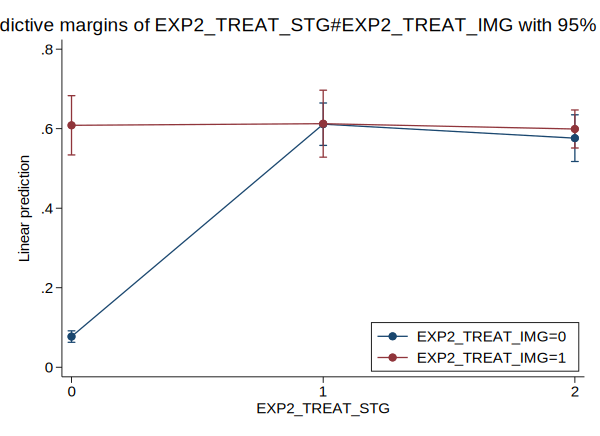

In [24]:
loc controls i.COVID_EXGG i.FEMALE i.AGE i.EDU i.MS i.JOB REL i.INCOME;
xtreg EXP2_PLCY_INSP i.EXP2_TREAT_STG##i.EXP2_TREAT_IMG `controls', fe vce(cluster prvc);
margins EXP2_TREAT_STG#EXP2_TREAT_IMG;
marginsplot;

## Figure 1 OLS



Panel variable: prvc (unbalanced)















Average marginal effects                                 Number of obs = 1,500
Model VCE: Robust

Expression: Linear prediction, predict()
dy/dx wrt:  1.EXP2_TREAT_STG 2.EXP2_TREAT_STG

--------------------------------------------------------------------------------
               |            Delta-method
               |      dy/dx   std. err.      z    P>|z|     [95% conf. interval]
---------------+----------------------------------------------------------------
EXP2_TREAT_STG |
            1  |   .0382291   .0244582     1.56   0.118    -.0097082    .0861664
            2  |  -.0036024    .039661    -0.09   0.928    -.0813365    .0741317
--------------------------------------------------------------------------------
Note: dy/dx for factor levels is the discrete change from the base level.

Average marginal effects                                 Number of obs = 1,500
Model VCE: Robust

Expression: Linear prediction, predict()
dy/dx

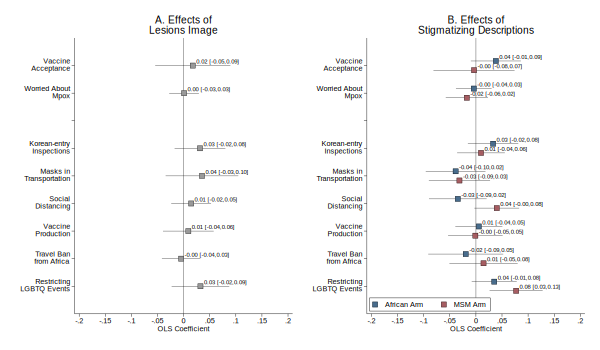









file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\04_MonkeypoxExp\Fig1.gph saved

file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\04_MonkeypoxExp\Fig1.jpg written in JPEG format


Figure 1
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                               (1)                (2)                (3)                (4)                (5)                (6)                (7)                (8)   
                   RECODE of ex~1)    RECODE of ex~2)     EXP2_PLCY_INSP     EXP2_PLCY_MASK     EXP2_PLCY_DIST     EXP2_PLCY_VACC     EXP2_PLCY_AFRI     EXP2_PLCY_LGBT   
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
EXP2_TREAT_IMG=1            0.0470             0.0108             0.0

In [4]:
xtset prvc
loc controls i.FEMALE i.AGE i.EDU i.MS i.JOB i.REL i.INCOME
loc vars EXP2_INTN EXP2_WORR EXP2_WORR EXP2_PLCY_INSP EXP2_PLCY_MASK EXP2_PLCY_DIST EXP2_PLCY_VACC EXP2_PLCY_AFRI EXP2_PLCY_LGBT
loc i = 0
loc xrange -0.2(0.05)0.2

loc title0 "What shoud the government do to protect people from Monkeypox?"
loc title1 `""A. Effects of" "Lesions Image""'
loc title2 `""B. Effects of" "Stigmatizing Descriptions""'

matrix IMG = J(9, 3, .)
matrix coln IMG = Beta LI95 UI95
matrix AFR = J(9, 3, .)
matrix coln AFR = Beta LI95 UI95
matrix MSM = J(9, 3, .)
matrix coln MSM = Beta LI95 UI95

foreach y in `vars' {
    loc i = `i' + 1
    
    eststo lmM`i': qui xtreg `y' i.EXP2_TREAT_IMG##i.EXP2_TREAT_STG i.PARTYID `controls', fe robust
    *matrix IMG[`i',1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
    *matrix AFR[`i',1] = r(table)[1,4], r(table)[5,4], r(table)[6,4]
    *matrix MSM[`i',1] = r(table)[1,5], r(table)[5,5], r(table)[6,5]
    qui margins, dydx(EXP2_TREAT_IMG)
    matrix IMG[`i',1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
    margins, dydx(EXP2_TREAT_STG)
    matrix AFR[`i',1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
    matrix MSM[`i',1] = r(table)[1,3], r(table)[5,3], r(table)[6,3]
}

mat IMG[3,1]=.,.,.
mat AFR[3,1]=.,.,.
mat MSM[3,1]=.,.,.

qui coefplot (matrix(IMG[,1]), ci((2 3)) mfcolor(gs8*0.8)), ///
         title(`title1') xtitle("OLS Coefficient") ///
         coeflabels(r1=`""Vaccine" "Acceptance""' r2=`""Worried About" "Mpox""' ///
                    r3=" " r4=`""Korean-entry" "Inspections""' r5=`""Masks in" "Transportation""' r6=`""Social" "Distancing""' ///
                    r7=`""Vaccine" "Production""' r8=`""Travel Ban" "from Africa""' r9=`""Restricting" "LGBTQ Events""', wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(0, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) ///
         mlabel("     " + string(@b, "%9.2f") + " [" + string(@ll, "%9.2f") + "," + string(@ul, "%9.2f") + "]") mlabformat("%9.2f") ///
         mlabcolor(black) mlabpos(2) mlabgap(*1) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(medium)) ///
         legend(off) ///
         name(g1, replace)

qui coefplot (matrix(AFR[,1]), ci((2 3)) label(African Arm) mfcolor(navy*0.8)) ///
             (matrix(MSM[,1]), ci((2 3)) label(MSM Arm) mfcolor(maroon*0.8)), ///
         title(`title2') xtitle("OLS Coefficient") ///
         coeflabels(r1=`""Vaccine" "Acceptance""' r2=`""Worried About" "Mpox""' ///
                    r3=" " r4=`""Korean-entry" "Inspections""' r5=`""Masks in" "Transportation""' r6=`""Social" "Distancing""' ///
                    r7=`""Vaccine" "Production""' r8=`""Travel Ban" "from Africa""' r9=`""Restricting" "LGBTQ Events""', wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(0, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) ///
         mlabel("     " + string(@b, "%9.2f") + " [" + string(@ll, "%9.2f") + "," + string(@ul, "%9.2f") + "]") mlabformat("%9.2f") ///
         mlabcolor(black) mlabpos(2) mlabgap(*1) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(medium)) ///
         legend(ring(0) position(7) rowgap(0.5) cols(2)) ///
         name(g2, replace)

graph combine g1 g2, ///
        b1("") ycommon ///
        l1("") cols(3) ///
        xsize(12) ysize(7) iscale(*0.8)
graph save "$outputs4\Fig1.gph", replace
graph export "$outputs4\Fig1.jpg", replace

esttab lmM1 lmM2 lmM4 lmM5 lmM6 lmM7 lmM8 lmM9 ///
    , replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Figure 1) nogaps ///
    varwidth(18) modelwidth(15) nobase label
esttab lmM1 lmM2 lmM4 lmM5 lmM6 lmM7 lmM8 lmM9 ///
    using "$outputs4\Appendix_Fig1.rtf" ///
    , replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Figure 1) nogaps ///
    varwidth(18) modelwidth(15) nobase label

## eSupplement 7. Logit model

In [35]:
loc controls i.FEMALE i.AGE i.EDU i.MS i.JOB i.REL i.INCOME
logit EXP2_PLCY_LGBT i.EXP2_TREAT_IMG##i.EXP2_TREAT_STG i.PARTYID `controls' i.prvc, or robust nolog

margins, dydx(EXP2_TREAT_STG)




Logistic regression                                     Number of obs =  1,500
                                                        Wald chi2(38) =  75.96
                                                        Prob > chi2   = 0.0002
Log pseudolikelihood = -958.24409                       Pseudo R2     = 0.0408

-----------------------------------------------------------------------------------------------
                              |               Robust
               EXP2_PLCY_LGBT | Odds ratio   std. err.      z    P>|z|     [95% conf. interval]
------------------------------+----------------------------------------------------------------
             1.EXP2_TREAT_IMG |   1.239939   .2408381     1.11   0.268     .8473606    1.814398
                              |
               EXP2_TREAT_STG |
                           1  |   1.076296   .2122016     0.37   0.709     .7313234    1.583995
                           2  |   1.683689   .3238213     2.71   0.007     1.154919

In [ ]:
tab prvc EXP2_PLCY_VACC


           |    EXP2_PLCY_VACC
      PRVC |         0          1 |     Total
-----------+----------------------+----------
         1 |       216         70 |       286 
         2 |        67         30 |        97 
         3 |        52         15 |        67 
         4 |        67         21 |        88 
         5 |        29         14 |        43 
         6 |        33         10 |        43 
         7 |        25          8 |        33 
         8 |         4          2 |         6 
         9 |       297        102 |       399 
        10 |        31         10 |        41 
        11 |        38          7 |        45 
        12 |        52         12 |        64 
        13 |        42          6 |        48 
        14 |        36         15 |        51 
        15 |        64         10 |        74 
        16 |        71         24 |        95 
        17 |        14          6 |        20 
-----------+----------------------+----------
     Total |     1,138        3

In [26]:
, expression(exp(predict(xb)))
mat b = r(b)
scalar base = b[1,1]
margins EXP2_TREAT_IMG#EXP2_TREAT_STG, expression((exp(predict(xb))/base))

*mat li r(table)




Logistic regression                                     Number of obs =  1,500
                                                        Wald chi2(38) =  75.96
                                                        Prob > chi2   = 0.0002
Log pseudolikelihood = -958.24409                       Pseudo R2     = 0.0408

-------------------------------------------------------------------------------
              |               Robust
EXP2_PLCY_L~T | Coefficient  std. err.      z    P>|z|     [95% conf. interval]
--------------+----------------------------------------------------------------
1.EXP2_TRE~MG |   .2150622   .1942338     1.11   0.268     -.165629    .5957535
              |
EXP2_TREAT~TG |
           1  |   .0735254   .1971592     0.37   0.709    -.3128995    .4599503
           2  |    .520987   .1923285     2.71   0.007     .1440301    .8979439
              |
EXP2_TREAT~MG#|
EXP2_TREAT~TG |
         1 1  |   .1630118   .2710766     0.60   0.548    -.3682885    .6943121
   



Panel variable: prvc (unbalanced)




















Iteration 0:   log pseudolikelihood = -1032.4075  
Iteration 1:   log pseudolikelihood = -976.75352  
Iteration 2:   log pseudolikelihood = -976.55949  
Iteration 3:   log pseudolikelihood = -976.55947  

Logistic regression                                     Number of obs =  1,500
                                                        Wald chi2(38) = 103.30
                                                        Prob > chi2   = 0.0000
Log pseudolikelihood = -976.55947                       Pseudo R2     = 0.0541

-----------------------------------------------------------------------------------------------
                              |               Robust
                    EXP2_INTN | Odds ratio   std. err.      z    P>|z|     [95% conf. interval]
------------------------------+----------------------------------------------------------------
             1.EXP2_TREAT_IMG |   1.228747   .2322372     1.09   0.276      .8483

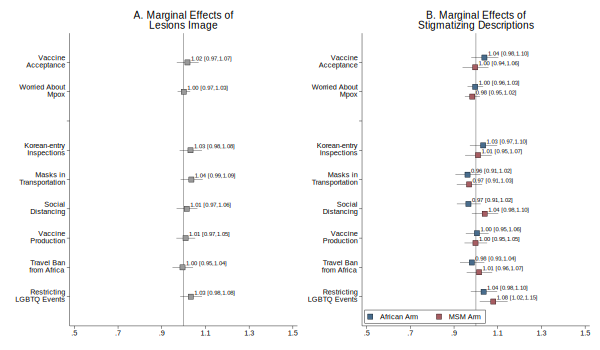











(file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\04_MonkeypoxExp\eSupplement7.gph not found)
file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\04_MonkeypoxExp\eSupplement7.gph saved

(file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\04_MonkeypoxExp\eSupplement7.jpg not found)
file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\04_MonkeypoxExp\eSupplement7.jpg written in JPEG format


In [37]:
xtset prvc
loc controls i.FEMALE i.AGE i.EDU i.MS i.JOB i.REL i.INCOME
loc vars EXP2_INTN EXP2_WORR EXP2_WORR EXP2_PLCY_INSP EXP2_PLCY_MASK EXP2_PLCY_DIST EXP2_PLCY_VACC EXP2_PLCY_AFRI EXP2_PLCY_LGBT
loc i = 0
loc xrange 0.5(0.2)1.5

loc title0 "What shoud the government do to protect people from Monkeypox?"
loc title1 `""A. Marginal Effects of" "Lesions Image""'
loc title2 `""B. Marginal Effects of" "Stigmatizing Descriptions""'
loc title3 `""C. Interaction of" "A and B""'

matrix IMG = J(9, 3, .)
matrix coln IMG = Beta LI95 UI95
matrix AFR = J(9, 3, .)
matrix coln AFR = Beta LI95 UI95
matrix MSM = J(9, 3, .)
matrix coln MSM = Beta LI95 UI95
matrix AFR_IMG = J(9, 3, .)
matrix coln AFR_IMG = Beta LI95 UI95
matrix MSM_IMG = J(9, 3, .)
matrix coln MSM_IMG = Beta LI95 UI95


foreach y in `vars' {
    loc i = `i' + 1
    
    eststo lmM`i': logit `y' i.EXP2_TREAT_IMG##i.EXP2_TREAT_STG i.PARTYID `controls' i.prvc, or robust
    matrix AFR_IMG[`i',1] = r(table)[1,10], r(table)[5,10], r(table)[6,10]
    matrix MSM_IMG[`i',1] = r(table)[1,11], r(table)[5,11], r(table)[6,11]
    
    margins, dydx(EXP2_TREAT_IMG)
    matrix IMG[`i',1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
    
    margins, dydx(EXP2_TREAT_STG)
    matrix AFR[`i',1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
    matrix MSM[`i',1] = r(table)[1,3], r(table)[5,3], r(table)[6,3]
}

mat IMG[3,1]=.,.,.
mat AFR[3,1]=.,.,.
mat MSM[3,1]=.,.,.
mat AFR_IMG[3,1]=.,.,.
mat MSM_IMG[3,1]=.,.,.

qui coefplot (matrix(IMG[,1]), ci((2 3)) mfcolor(gs8*0.8)), ///
         eform title(`title1') ///
         coeflabels(r1=`""Vaccine" "Acceptance""' r2=`""Worried About" "Mpox""' ///
                    r3=" " r4=`""Korean-entry" "Inspections""' r5=`""Masks in" "Transportation""' r6=`""Social" "Distancing""' ///
                    r7=`""Vaccine" "Production""' r8=`""Travel Ban" "from Africa""' r9=`""Restricting" "LGBTQ Events""', wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(1, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) ///
         mlabel("     " + string(@b, "%9.2f") + " [" + string(@ll, "%9.2f") + "," + string(@ul, "%9.2f") + "]") mlabformat("%9.2f") ///
         mlabcolor(black) mlabpos(2) mlabgap(*1) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(small)) ///
         legend(off) ///
         name(g1, replace)

qui coefplot (matrix(AFR[,1]), ci((2 3)) label(African Arm) mfcolor(navy*0.8)) ///
             (matrix(MSM[,1]), ci((2 3)) label(MSM Arm) mfcolor(maroon*0.8)), ///
         eform title(`title2') ///
         coeflabels(r1=`""Vaccine" "Acceptance""' r2=`""Worried About" "Mpox""' ///
                    r3=" " r4=`""Korean-entry" "Inspections""' r5=`""Masks in" "Transportation""' r6=`""Social" "Distancing""' ///
                    r7=`""Vaccine" "Production""' r8=`""Travel Ban" "from Africa""' r9=`""Restricting" "LGBTQ Events""', wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(1, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) ///
         mlabel("     " + string(@b, "%9.2f") + " [" + string(@ll, "%9.2f") + "," + string(@ul, "%9.2f") + "]") mlabformat("%9.2f") ///
         mlabcolor(black) mlabpos(2) mlabgap(*1) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(small)) ///
         legend(ring(0) position(7) rowgap(0.5) cols(2)) ///
         name(g2, replace)

graph combine g1 g2, ///
    b1("") ycommon ///
    l1("") cols(3) ///
    xsize(12) ysize(7) iscale(*0.8)
graph save "$outputs4\eSupplement7.gph", replace
graph export "$outputs4\eSupplement7.jpg", replace



Panel variable: prvc (unbalanced)


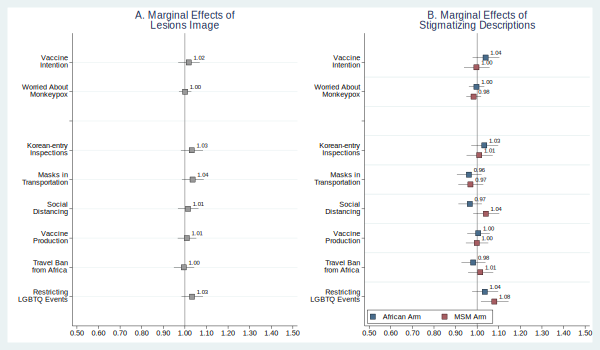














file \Fig1.gph saved

file \Fig1.jpg written in JPEG format


In [8]:
xtset prvc
loc controls i.FEMALE i.AGE i.EDU i.MS i.JOB i.REL i.INCOME
loc vars EXP2_INTN EXP2_WORR EXP2_WORR EXP2_PLCY_INSP EXP2_PLCY_MASK EXP2_PLCY_DIST EXP2_PLCY_VACC EXP2_PLCY_AFRI EXP2_PLCY_LGBT
loc i = 0
loc xrange 0.5(0.1)1.5

loc title0 "What shoud the government do to protect people from Monkeypox?"
loc title1 `""A. Marginal Effects of" "Lesions Image""'
loc title2 `""B. Marginal Effects of" "Stigmatizing Descriptions""'
loc title3 `""C. Interaction of" "A and B""'

qui coefplot (matrix(IMG[,1]), ci((2 3)) mfcolor(gs8*0.8)), ///
         eform title(`title1') ///
         coeflabels(r1=`""Vaccine" "Intention""' r2=`""Worried About" "Monkeypox""' ///
                    r3=" " r4=`""Korean-entry" "Inspections""' r5=`""Masks in" "Transportation""' r6=`""Social" "Distancing""' ///
                    r7=`""Vaccine" "Production""' r8=`""Travel Ban" "from Africa""' r9=`""Restricting" "LGBTQ Events""', wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(1, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) mlabel format(%9.2f) mlabcolor(black) mlabposition(2) mlabgap(*2) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(small)) ///
         legend(off) ///
         name(g1, replace)

qui coefplot (matrix(AFR[,1]), ci((2 3)) label(African Arm) mfcolor(navy*0.8)) ///
             (matrix(MSM[,1]), ci((2 3)) label(MSM Arm) mfcolor(maroon*0.8)), ///
         eform title(`title2') ///
         coeflabels(r1=`""Vaccine" "Intention""' r2=`""Worried About" "Monkeypox""' ///
                    r3=" " r4=`""Korean-entry" "Inspections""' r5=`""Masks in" "Transportation""' r6=`""Social" "Distancing""' ///
                    r7=`""Vaccine" "Production""' r8=`""Travel Ban" "from Africa""' r9=`""Restricting" "LGBTQ Events""', wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(1, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) mlabel format(%9.2f) mlabcolor(black) mlabposition(2) mlabgap(*2) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(small)) ///
         legend(ring(0) position(7) rowgap(0.5) cols(2)) ///
         name(g2, replace)

graph combine g1 g2, ///
        b1("") ycommon ///
        l1("") cols(3) ///
        xsize(12) ysize(7) iscale(*0.8)
graph save "$outputs4\Fig1.gph", replace
graph export "$outputs4\Fig1.jpg", replace

## Appendix. Figure 1 based on post-stratification weights



Panel variable: prvc (unbalanced)















Average marginal effects                                 Number of obs = 1,479
Model VCE: Robust

Expression: Linear prediction, predict()
dy/dx wrt:  1.EXP2_TREAT_IMG

----------------------------------------------------------------------------------
                 |            Delta-method
                 |      dy/dx   std. err.      t    P>|t|     [95% conf. interval]
-----------------+----------------------------------------------------------------
1.EXP2_TREAT_IMG |  -.0018251   .0313068    -0.06   0.954    -.0632369    .0595867
----------------------------------------------------------------------------------
Note: dy/dx for factor levels is the discrete change from the base level.

Average marginal effects                                 Number of obs = 1,479
Model VCE: Robust

Expression: Linear prediction, predict()
dy/dx wrt:  1.EXP2_TREAT_STG 2.EXP2_TREAT_STG

-------------------------------------------------------------

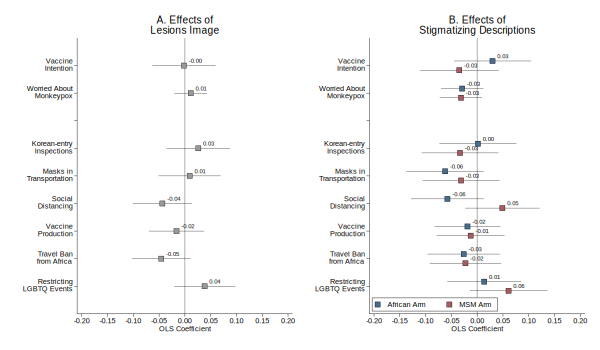









(file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\04_MonkeypoxExp\Fig1_weight.gph not found)
file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\04_MonkeypoxExp\Fig1_weight.gph saved

(file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\04_MonkeypoxExp\Fig1_weight.jpg not found)
file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\04_MonkeypoxExp\Fig1_weight.jpg written in JPEG format


Figure 1
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                               (1)                (2)                (3)                (4)                (5)                (6)                (7)                (8)   
                   RECODE of ex~1)    RECODE of ex~2)     EXP2_PLCY_INSP     EXP2_PLCY_MASK     EXP2_PLCY_DIST     EXP2_PLCY_VACC     EXP2_PLCY_AFRI     EXP2_PLC

In [6]:
xtset prvc
loc controls i.FEMALE i.AGE i.EDU i.MS i.JOB i.REL i.INCOME
loc vars EXP2_INTN EXP2_WORR EXP2_WORR EXP2_PLCY_INSP EXP2_PLCY_MASK EXP2_PLCY_DIST EXP2_PLCY_VACC EXP2_PLCY_AFRI EXP2_PLCY_LGBT
loc i = 0
loc xrange -0.2(0.05)0.2

loc title0 "What shoud the government do to protect people from Monkeypox?"
loc title1 `""A. Effects of" "Lesions Image""'
loc title2 `""B. Effects of" "Stigmatizing Descriptions""'

matrix IMG = J(9, 3, .)
matrix coln IMG = Beta LI95 UI95
matrix AFR = J(9, 3, .)
matrix coln AFR = Beta LI95 UI95
matrix MSM = J(9, 3, .)
matrix coln MSM = Beta LI95 UI95

foreach y in `vars' {
    loc i = `i' + 1
    
    eststo lmM`i': qui reg `y' i.EXP2_TREAT_IMG##i.EXP2_TREAT_STG i.PARTYID `controls' i.prvc [pw=weight] if age>=20, robust
    *matrix IMG[`i',1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
    *matrix AFR[`i',1] = r(table)[1,4], r(table)[5,4], r(table)[6,4]
    *matrix MSM[`i',1] = r(table)[1,5], r(table)[5,5], r(table)[6,5]
    margins, dydx(EXP2_TREAT_IMG)
    matrix IMG[`i',1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
    margins, dydx(EXP2_TREAT_STG)
    matrix AFR[`i',1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
    matrix MSM[`i',1] = r(table)[1,3], r(table)[5,3], r(table)[6,3]
}

mat IMG[3,1]=.,.,.
mat AFR[3,1]=.,.,.
mat MSM[3,1]=.,.,.

qui coefplot (matrix(IMG[,1]), ci((2 3)) mfcolor(gs8*0.8)), ///
         title(`title1') xtitle("OLS Coefficient") ///
         coeflabels(r1=`""Vaccine" "Intention""' r2=`""Worried About" "Monkeypox""' ///
                    r3=" " r4=`""Korean-entry" "Inspections""' r5=`""Masks in" "Transportation""' r6=`""Social" "Distancing""' ///
                    r7=`""Vaccine" "Production""' r8=`""Travel Ban" "from Africa""' r9=`""Restricting" "LGBTQ Events""', wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(0, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) mlabel format(%9.2f) mlabcolor(black) mlabposition(2) mlabgap(*2) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(medium)) ///
         legend(off) ///
         name(g1, replace)

qui coefplot (matrix(AFR[,1]), ci((2 3)) label(African Arm) mfcolor(navy*0.8)) ///
             (matrix(MSM[,1]), ci((2 3)) label(MSM Arm) mfcolor(maroon*0.8)), ///
         title(`title2') xtitle("OLS Coefficient") ///
         coeflabels(r1=`""Vaccine" "Intention""' r2=`""Worried About" "Monkeypox""' ///
                    r3=" " r4=`""Korean-entry" "Inspections""' r5=`""Masks in" "Transportation""' r6=`""Social" "Distancing""' ///
                    r7=`""Vaccine" "Production""' r8=`""Travel Ban" "from Africa""' r9=`""Restricting" "LGBTQ Events""', wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(0, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) mlabel format(%9.2f) mlabcolor(black) mlabposition(2) mlabgap(*2) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(medium)) ///
         legend(ring(0) position(7) rowgap(0.5) cols(2)) ///
         name(g2, replace)

graph combine g1 g2, ///
        b1("") ycommon ///
        l1("") cols(3) ///
        xsize(12) ysize(7) iscale(*0.8)
graph save "$outputs4\Fig1_weight.gph", replace
graph export "$outputs4\Fig1_weight.jpg", replace

esttab lmM1 lmM2 lmM4 lmM5 lmM6 lmM7 lmM8 lmM9 ///
    , replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Figure 1) nogaps ///
    varwidth(18) modelwidth(15) nobase label
esttab lmM1 lmM2 lmM4 lmM5 lmM6 lmM7 lmM8 lmM9 ///
    using "$outputs4\Appendix_Fig1.rtf" ///
    , replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Figure 1) nogaps ///
    varwidth(18) modelwidth(15) nobase label

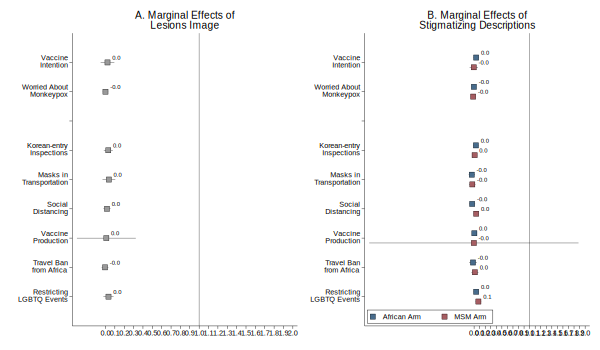

In [23]:
loc xrange 0(0.1)2

loc title0 "What shoud the government do to protect people from Monkeypox?"
loc title1 `""A. Marginal Effects of" "Lesions Image""'
loc title2 `""B. Marginal Effects of" "Stigmatizing Descriptions""'
loc title3 `""C. Interaction of" "A and B""'

qui coefplot (matrix(IMG[,1]), ci((2 3)) mfcolor(gs8*0.8)), ///
         eform title(`title1') ///
         coeflabels(r1=`""Vaccine" "Intention""' r2=`""Worried About" "Monkeypox""' ///
                    r3=" " r4=`""Korean-entry" "Inspections""' r5=`""Masks in" "Transportation""' r6=`""Social" "Distancing""' ///
                    r7=`""Vaccine" "Production""' r8=`""Travel Ban" "from Africa""' r9=`""Restricting" "LGBTQ Events""', wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(1, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) mlabel format(%9.1f) mlabcolor(black) mlabposition(2) mlabgap(*2) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(small)) ///
         legend(off) ///
         name(g1, replace)

qui coefplot (matrix(AFR[,1]), ci((2 3)) label(African Arm) mfcolor(navy*0.8)) ///
             (matrix(MSM[,1]), ci((2 3)) label(MSM Arm) mfcolor(maroon*0.8)), ///
         eform title(`title2') ///
         coeflabels(r1=`""Vaccine" "Intention""' r2=`""Worried About" "Monkeypox""' ///
                    r3=" " r4=`""Korean-entry" "Inspections""' r5=`""Masks in" "Transportation""' r6=`""Social" "Distancing""' ///
                    r7=`""Vaccine" "Production""' r8=`""Travel Ban" "from Africa""' r9=`""Restricting" "LGBTQ Events""', wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(1, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) mlabel format(%9.1f) mlabcolor(black) mlabposition(2) mlabgap(*2) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(small)) ///
         legend(ring(0) position(7) rowgap(0.5) cols(2)) ///
         name(g2, replace)

graph combine g1 g2, ///
        b1("") ycommon ///
        l1("") cols(3) ///
        xsize(12) ysize(7) iscale(*0.8)
*graph save "$outputs4\Fig1.gph", replace
*graph export "$outputs4\Fig1.jpg", replace

In [4]:
xtset prvc;
loc controls i.FEMALE i.AGE i.EDU i.MS i.JOB i.REL i.INCOME;
loc vars EXP2_PLCY_INSP EXP2_PLCY_MASK EXP2_PLCY_DIST EXP2_PLCY_VACC EXP2_PLCY_AFRI EXP2_PLCY_LGBT;
loc i = 0;
loc xrange -0.6(0.1)0.6;

loc title0 "What shoud the government do to protect people from Monkeypox?";
loc title1 "A. Liberals";
loc title2 "B. Conservatives";
loc title3 "C. Independents";

matrix M_IMG = J(6, 3, .);
matrix coln IMG = Beta LI95 UI95;
matrix M_AFR = J(6, 3, .);
matrix coln AFR = Beta LI95 UI95;
matrix M_MSM = J(6, 3, .);
matrix coln AFR = Beta LI95 UI95;

matrix IMG = J(6, 3, .);
matrix coln IMG = Beta LI95 UI95;
matrix AFR = J(6, 3, .);
matrix coln AFR = Beta LI95 UI95;
matrix MSM = J(6, 3, .);
matrix coln MSM = Beta LI95 UI95;
matrix AFR_IMG = J(6, 3, .);
matrix coln AFR_IMG = Beta LI95 UI95;
matrix MSM_IMG = J(6, 3, .);
matrix coln MSM_IMG = Beta LI95 UI95;

matrix IMG_R = J(6, 3, .);
matrix coln IMG_R = Beta LI95 UI95;
matrix AFR_R = J(6, 3, .);
matrix coln AFR_R = Beta LI95 UI95;
matrix MSM_R = J(6, 3, .);
matrix coln MSM_R = Beta LI95 UI95;
matrix AFR_IMG_R = J(6, 3, .);
matrix coln AFR_IMG_R = Beta LI95 UI95;
matrix MSM_IMG_R = J(6, 3, .);
matrix coln MSM_IMG_R = Beta LI95 UI95;

matrix IMG_I = J(6, 3, .);
matrix coln IMG_I = Beta LI95 UI95;
matrix AFR_I = J(6, 3, .);
matrix coln AFR_I = Beta LI95 UI95;
matrix MSM_I = J(6, 3, .);
matrix coln MSM_I = Beta LI95 UI95;
matrix AFR_IMG_I = J(6, 3, .);
matrix coln AFR_IMG_I = Beta LI95 UI95;
matrix MSM_IMG_I = J(6, 3, .);
matrix coln MSM_IMG_I = Beta LI95 UI95;

foreach y in `vars' {;
    loc i = `i' + 1;
    
    eststo lmM`i': qui xtreg `y' i.EXP2_TREAT_IMG##i.EXP2_TREAT_STG i.PARTYID `controls', fe vce(cluster prvc);
    
    qui margins, dydx(EXP2_TREAT_IMG);    
    matrix M_IMG[`i',1] = r(table)[1,2], r(table)[5,2], r(table)[6,2];
    
    qui margins, dydx(EXP2_TREAT_STG);
    matrix M_AFR[`i',1] = r(table)[1,2], r(table)[5,2], r(table)[6,2];
    matrix M_MSM[`i',1] = r(table)[1,3], r(table)[5,3], r(table)[6,3];
    
    eststo lm`i': qui xtreg `y' i.EXP2_TREAT_IMG##i.EXP2_TREAT_STG `controls' if PARTYID==0, fe vce(cluster prvc);
    
    qui lincom 1.EXP2_TREAT_IMG;
    matrix IMG[`i',1] = r(estimate), r(lb), r(ub);
    qui lincom 1.EXP2_TREAT_STG;
    matrix AFR[`i',1] = r(estimate), r(lb), r(ub);
    qui lincom 2.EXP2_TREAT_STG;
    matrix MSM[`i',1] = r(estimate), r(lb), r(ub);
    qui lincom 1.EXP2_TREAT_STG#1.EXP2_TREAT_IMG;
    matrix AFR_IMG[`i',1] = r(estimate), r(lb), r(ub);
    qui lincom 2.EXP2_TREAT_STG#1.EXP2_TREAT_IMG;
    matrix MSM_IMG[`i',1] = r(estimate), r(lb), r(ub);
        
    eststo lmR`i': qui xtreg `y' i.EXP2_TREAT_IMG##i.EXP2_TREAT_STG `controls' if PARTYID==1, fe vce(cluster prvc);
    qui lincom 1.EXP2_TREAT_IMG;
    matrix IMG_R[`i',1] = r(estimate), r(lb), r(ub);
    qui lincom 1.EXP2_TREAT_STG;
    matrix AFR_R[`i',1] = r(estimate), r(lb), r(ub);
    qui lincom 2.EXP2_TREAT_STG;
    matrix MSM_R[`i',1] = r(estimate), r(lb), r(ub);
    qui lincom 1.EXP2_TREAT_STG#1.EXP2_TREAT_IMG;
    matrix AFR_IMG_R[`i',1] = r(estimate), r(lb), r(ub);
    qui lincom 2.EXP2_TREAT_STG#1.EXP2_TREAT_IMG;
    matrix MSM_IMG_R[`i',1] = r(estimate), r(lb), r(ub);
    
    eststo lmI`i': qui xtreg `y' i.EXP2_TREAT_IMG##i.EXP2_TREAT_STG `controls' if PARTYID==2, fe vce(cluster prvc);
    qui lincom 1.EXP2_TREAT_IMG;
    matrix IMG_I[`i',1] = r(estimate), r(lb), r(ub);
    qui lincom 1.EXP2_TREAT_STG;
    matrix AFR_I[`i',1] = r(estimate), r(lb), r(ub);
    qui lincom 2.EXP2_TREAT_STG;
    matrix MSM_I[`i',1] = r(estimate), r(lb), r(ub);
    qui lincom 1.EXP2_TREAT_STG#1.EXP2_TREAT_IMG;
    matrix AFR_IMG_I[`i',1] = r(estimate), r(lb), r(ub);
    qui lincom 2.EXP2_TREAT_STG#1.EXP2_TREAT_IMG;
    matrix MSM_IMG_I[`i',1] = r(estimate), r(lb), r(ub);
};

qui coefplot (matrix(M_IMG[,1]), ci((2 3)) mfcolor(navy*0.8)),
         title("Symptom Image")
         coeflabels(r1=`""Korean-entry" "Inspections""' r2=`""Masks in" "Transportation""' r3=`""Social" "Distancing""'
                    r4=`""Vaccine" "Production""' r5=`""Travel Ban" "from Africa""' r6=`""Restricting" "LGBTQ Events""', wrap(30))
         xlabel(`xrange') ylabel(, nogrid)
         xline(0, lcolor(gray) lwidth(medium))
         plotregion(lwidth(thin) lpattern(solid))
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black)
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) *mlabel format(%9.1f) mlabcolor(black) mlabposition(2) mlabgap(*2)
         graphregion(fcolor(white) color(white) icolor(white) margin(small))
         legend(ring(6) position(6) rowgap(0.5) cols(2))
         name(g1, replace);

qui coefplot (matrix(M_AFR[,1]), ci((2 3)) label(African Arm) mfcolor(navy*0.8))             
             (matrix(M_MSM[,1]), ci((2 3)) label(MSM Arm) mfcolor(maroon*0.8)),
         title("Stigmatizing Descriptions")
         coeflabels(r1=`""Korean-entry" "Inspections""' r2=`""Masks in" "Transportation""' r3=`""Social" "Distancing""'
                    r4=`""Vaccine" "Production""' r5=`""Travel Ban" "from Africa""' r6=`""Restricting" "LGBTQ Events""', wrap(30))
         xlabel(`xrange') ylabel(, nogrid)
         xline(0, lcolor(gray) lwidth(medium))
         plotregion(lwidth(thin) lpattern(solid))
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black)
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) *mlabel format(%9.1f) mlabcolor(black) mlabposition(2) mlabgap(*2)
         graphregion(fcolor(white) color(white) icolor(white) margin(small))
         legend(ring(6) position(6) rowgap(0.5) cols(2))
         name(g2, replace);

graph combine g1 g2,
        b1("") ycommon
        l1("") cols(3) title("Marginal Effects")
        xsize(12) ysize(7) iscale(*0.6);
graph save "$outputs4\Fig1.gph", replace;
graph export "$outputs4\Fig1.jpg", replace;


qui coefplot (matrix(IMG[,1]), ci((2 3)) label(Plain Description w/ Image) mfcolor(gs8*0.8))
             (matrix(AFR[,1]), ci((2 3)) label(African Arm w/o Image) mfcolor(navy*0.8))
             (matrix(AFR_IMG[,1]), ci((2 3)) label(African Arm w/ Image) mfcolor(navy*0.8) msymbol(T))
             (matrix(MSM[,1]), ci((2 3)) label(MSM Arm w/o Image) mfcolor(maroon*0.8))
             (matrix(MSM_IMG[,1]), ci((2 3)) label(MSM Arm w/ Image) mfcolor(maroon*0.8) msymbol(T)),
         title(`title1')
         coeflabels(r1=`""Korean-entry" "Inspections""' r2=`""Masks in" "Transportation""' r3=`""Social" "Distancing""'
                    r4=`""Vaccine" "Production""' r5=`""Travel Ban" "from Africa""' r6=`""Restricting" "LGBTQ Events""', wrap(30))
         xlabel(`xrange') ylabel(, nogrid)
         xline(0, lcolor(gray) lwidth(medium))
         plotregion(lwidth(thin) lpattern(solid))
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black)
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) *mlabel format(%9.1f) mlabcolor(black) mlabposition(2) mlabgap(*2)
         graphregion(fcolor(white) color(white) icolor(white) margin(small))
         legend(ring(6) position(6) rowgap(0.5) cols(2))
         name(g1, replace);

qui coefplot (matrix(IMG_R[,1]), ci((2 3)) label(Plain Description w/ Image) mfcolor(gs8*0.8))
             (matrix(AFR_R[,1]), ci((2 3)) label(African Arm w/o Image) mfcolor(navy*0.8))
             (matrix(AFR_IMG_R[,1]), ci((2 3)) label(African Arm w/ Image) mfcolor(navy*0.8) msymbol(T))
             (matrix(MSM_R[,1]), ci((2 3)) label(MSM Arm w/o Image) mfcolor(maroon*0.8))
             (matrix(MSM_IMG_R[,1]), ci((2 3)) label(MSM Arm w/ Image) mfcolor(maroon*0.8) msymbol(T)),
         title(`title2')
         coeflabels(r1=`""Korean-entry" "Inspections""' r2=`""Masks in" "Transportation""' r3=`""Social" "Distancing""'
                    r4=`""Vaccine" "Production""' r5=`""Travel Ban" "from Africa""' r6=`""Restricting" "LGBTQ Events""', wrap(30))
         xlabel(`xrange') ylabel(, nogrid)
         xline(0, lcolor(gray) lwidth(medium))
         plotregion(lwidth(thin) lpattern(solid))
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black)
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) *mlabel format(%9.1f) mlabcolor(black) mlabposition(2) mlabgap(*2)
         graphregion(fcolor(white) color(white) icolor(white) margin(small))
         legend(ring(6) position(6) rowgap(0.5) cols(2))
         name(g2, replace);

qui coefplot (matrix(IMG_I[,1]), ci((2 3)) label(Plain Description w/ Image) mfcolor(gs8*0.8))
             (matrix(AFR_I[,1]), ci((2 3)) label(African Arm w/o Image) mfcolor(navy*0.8))
             (matrix(AFR_IMG_I[,1]), ci((2 3)) label(African Arm w/ Image) mfcolor(navy*0.8) msymbol(T))
             (matrix(MSM_I[,1]), ci((2 3)) label(MSM Arm w/o Image) mfcolor(maroon*0.8))
             (matrix(MSM_IMG_I[,1]), ci((2 3)) label(MSM Arm w/ Image) mfcolor(maroon*0.8) msymbol(T)),
         title(`title3')
         coeflabels(r1=`""Korean-entry" "Inspections""' r2=`""Masks in" "Transportation""' r3=`""Social" "Distancing""'
                    r4=`""Vaccine" "Production""' r5=`""Travel Ban" "from Africa""' r6=`""Restricting" "LGBTQ Events""', wrap(30))
         xlabel(`xrange') ylabel(, nogrid)
         xline(0, lcolor(gray) lwidth(medium))
         plotregion(lwidth(thin) lpattern(solid))
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black)
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) *mlabel format(%9.1f) mlabcolor(black) mlabposition(2) mlabgap(*2)
         graphregion(fcolor(white) color(white) icolor(white) margin(small))
         legend(ring(6) position(6) rowgap(0.5) cols(2))
         name(g3, replace);

graph combine g1 g2 g3,
        b1("") ycommon
        l1("") cols(3) title(`title0')
        xsize(12) ysize(7) iscale(*0.6);
graph save "$outputs4\Fig2.gph", replace;
graph export "$outputs4\Fig2.jpg", replace;

esttab lmM1 lmM2 lmM3 lmM4 lmM5 lmM6
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F)
    title(Figure 1) nogaps
    varwidth(18) modelwidth(15) nobase label;
esttab lm1 lm2 lm3 lm4 lm5 lm6
    using "$outputs4\Appendix_Fig1.rtf"
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F)
    title(Figure 1) nogaps
    varwidth(18) modelwidth(15) nobase label;



Panel variable: prvc (unbalanced)










matrix IMG not found


r(111);
r(111);


## eSupplement 6



Panel variable: prvc (unbalanced)


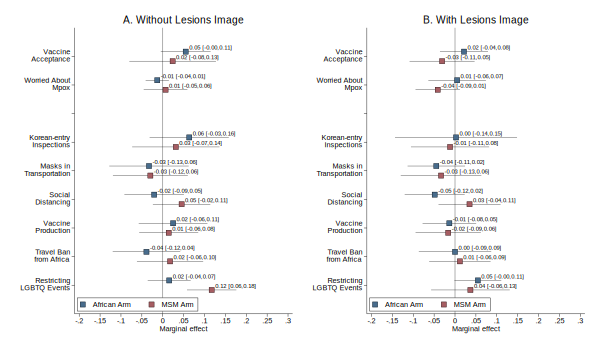




































file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\04_MonkeypoxExp\eSupplement6.gph saved

file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\04_MonkeypoxExp\eSupplement6.jpg written in JPEG format


Figure 2
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                               (1)                (2)                (3)                (4)                (5)                (6)                (7)                (8)   
                   RECODE of ex~1)    RECODE of ex~2)     EXP2_PLCY_INSP     EXP2_PLCY_MASK     EXP2_PLCY_DIST     EXP2_PLCY_VACC     EXP2_PLCY_AFRI     EXP2_PLCY_LGBT   
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
EXP2_TREAT_IMG=1          

In [38]:
xtset prvc
loc controls i.FEMALE i.AGE i.EDU i.MS i.JOB i.REL i.INCOME
loc vars EXP2_INTN EXP2_WORR EXP2_WORR EXP2_PLCY_INSP EXP2_PLCY_MASK EXP2_PLCY_DIST EXP2_PLCY_VACC EXP2_PLCY_AFRI EXP2_PLCY_LGBT
loc i = 0
loc xrange -0.2(0.05)0.3

loc title0 "What shoud the government do to protect people from Monkeypox?"
loc title1 `""A. Effects of" "Lesions Image""'
loc title2 "A. Without Lesions Image"
loc title3 "B. With Lesions Image"

matrix IMG = J(9, 3, .)
matrix coln IMG = Beta LI95 UI95
matrix AFR = J(9, 3, .)
matrix coln AFR = Beta LI95 UI95
matrix MSM = J(9, 3, .)
matrix coln MSM = Beta LI95 UI95
matrix AFR_NOIMG = J(9, 3, .)
matrix coln AFR_NOIMG = Beta LI95 UI95
matrix MSM_NOIMG = J(9, 3, .)
matrix coln MSM_NOIMG = Beta LI95 UI95
matrix AFR_IMG = J(9, 3, .)
matrix coln AFR_IMG = Beta LI95 UI95
matrix MSM_IMG = J(9, 3, .)
matrix coln MSM_IMG = Beta LI95 UI95

foreach y in `vars' {
    loc i = `i' + 1
    
    eststo lmM`i': qui xtreg `y' i.EXP2_TREAT_IMG##i.EXP2_TREAT_STG i.PARTYID `controls', fe robust

    qui margins EXP2_TREAT_IMG, dydx(EXP2_TREAT_STG)
    matrix AFR_NOIMG[`i',1] = r(table)[1,3], r(table)[5,3], r(table)[6,3]
    matrix MSM_NOIMG[`i',1] = r(table)[1,5], r(table)[5,5], r(table)[6,5]
    matrix AFR_IMG[`i',1] = r(table)[1,4], r(table)[5,4], r(table)[6,4]
    matrix MSM_IMG[`i',1] = r(table)[1,6], r(table)[5,6], r(table)[6,6]
}

mat IMG[3,1]=.,.,.
mat AFR[3,1]=.,.,.
mat MSM[3,1]=.,.,.
mat AFR_NOIMG[3,1]=.,.,.
mat MSM_NOIMG[3,1]=.,.,.
mat AFR_IMG[3,1]=.,.,.
mat MSM_IMG[3,1]=.,.,.

qui coefplot (matrix(AFR_NOIMG[,1]), ci((2 3)) label(African Arm) mfcolor(navy*0.8)) ///    
             (matrix(MSM_NOIMG[,1]), ci((2 3)) label(MSM Arm) mfcolor(maroon*0.8)), ///
         title(`title2') xtitle(Marginal effect) ///
         coeflabels(r1=`""Vaccine" "Acceptance""' r2=`""Worried About" "Mpox""' ///
                    r3=" " r4=`""Korean-entry" "Inspections""' r5=`""Masks in" "Transportation""' r6=`""Social" "Distancing""' ///
                    r7=`""Vaccine" "Production""' r8=`""Travel Ban" "from Africa""' r9=`""Restricting" "LGBTQ Events""', wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(0, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) ///
         mlabel("     " + string(@b, "%9.2f") + " [" + string(@ll, "%9.2f") + "," + string(@ul, "%9.2f") + "]") mlabformat("%9.2f") ///
         mlabcolor(black) mlabpos(2) mlabgap(*1) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(medium)) ///
         legend(ring(0) position(7) rowgap(0.5) cols(2)) ///
         name(g1, replace)

qui coefplot (matrix(AFR_IMG[,1]), ci((2 3)) label(African Arm) mfcolor(navy*0.8)) ///
             (matrix(MSM_IMG[,1]), ci((2 3)) label(MSM Arm) mfcolor(maroon*0.8)), ///
         title(`title3') xtitle(Marginal effect) ///
         coeflabels(r1=`""Vaccine" "Acceptance""' r2=`""Worried About" "Mpox""' ///
                    r3=" " r4=`""Korean-entry" "Inspections""' r5=`""Masks in" "Transportation""' r6=`""Social" "Distancing""' ///
                    r7=`""Vaccine" "Production""' r8=`""Travel Ban" "from Africa""' r9=`""Restricting" "LGBTQ Events""', wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(0, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) ///
         mlabel("     " + string(@b, "%9.2f") + " [" + string(@ll, "%9.2f") + "," + string(@ul, "%9.2f") + "]") mlabformat("%9.2f") ///
         mlabcolor(black) mlabpos(2) mlabgap(*1) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(medium)) ///
         legend(ring(0) position(7) rowgap(0.5) cols(2)) ///
         name(g2, replace)

graph combine g1 g2, ///
        b1("") ycommon ///
        l1("") cols(3) ///
        xsize(12) ysize(7) iscale(*0.8)
graph save "$outputs4\eSupplement6.gph", replace
graph export "$outputs4\eSupplement6.jpg", replace

esttab lmM1 lmM2 lmM4 lmM5 lmM6 lmM7 lmM8 lmM9 ///
    , replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Figure 2) nogaps ///
    varwidth(18) modelwidth(15) nobase label
esttab lmM1 lmM2 lmM4 lmM5 lmM6 lmM7 lmM8 lmM9 ///
    using "$outputs4\eSupplement6.rtf" ///
    , replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Figure 1) nogaps ///
    varwidth(18) modelwidth(15) nobase label

## Figure 2 based on post-stratification weights

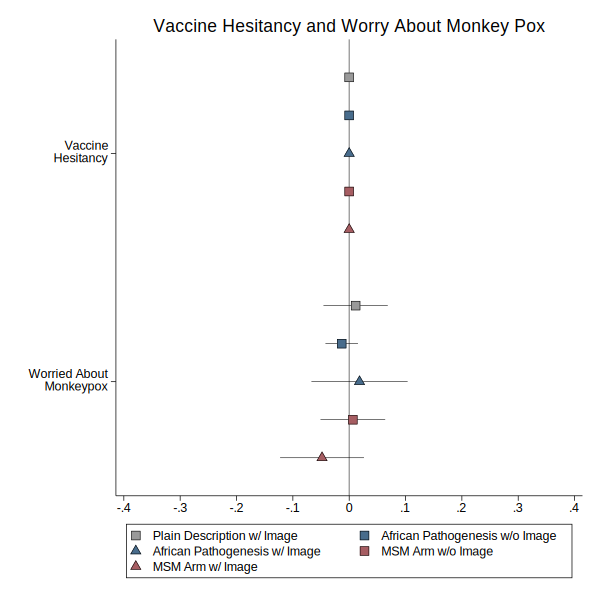



























file C:\OneDrive\OneDrive - University at Albany - SUNY\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\04_MonkeypoxExp\Fig2.gph saved

file C:\OneDrive\OneDrive - University at Albany - SUNY\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\04_MonkeypoxExp\Fig2.jpg written in JPEG format


Figure 1
--------------------------------------------------------
                               (1)                (2)   
                   RECODE of ex~1)    RECODE of ex~2)   
--------------------------------------------------------
EXP2_TREAT_IMG=1            0.0000             0.0114   
                       [0.00,0.00]       [-0.05,0.07]   
EXP2_TREAT_STG=1            0.0000            -0.0133   
                       [0.00,0.00]       [-0.04,0.02]   
EXP2_TREAT_STG=2            0.0000             0.0064   
                       [0.00,0.00]       [-0.05,0.06]   
EXP2_TREAT_IMG=1~T          0.0000             0.0183   
                       [0.00

In [8]:
xtset prvc
loc controls i.FEMALE i.AGE i.EDU i.MS i.JOB i.REL i.INCOME
loc vars EXP2_INTN EXP2_WORR EXP2_WORR EXP2_PLCY_INSP EXP2_PLCY_MASK EXP2_PLCY_DIST EXP2_PLCY_VACC EXP2_PLCY_AFRI EXP2_PLCY_LGBT
loc i = 0
loc xrange -0.2(0.05)0.3

loc title0 "What shoud the government do to protect people from Monkeypox?"
loc title1 `""A. Effects of" "Lesions Image""'
loc title2 "A. Without Lesions Image"
loc title3 "B. With Lesions Image"

matrix IMG = J(9, 3, .)
matrix coln IMG = Beta LI95 UI95
matrix AFR = J(9, 3, .)
matrix coln AFR = Beta LI95 UI95
matrix MSM = J(9, 3, .)
matrix coln MSM = Beta LI95 UI95
matrix AFR_NOIMG = J(9, 3, .)
matrix coln AFR_NOIMG = Beta LI95 UI95
matrix MSM_NOIMG = J(9, 3, .)
matrix coln MSM_NOIMG = Beta LI95 UI95
matrix AFR_IMG = J(9, 3, .)
matrix coln AFR_IMG = Beta LI95 UI95
matrix MSM_IMG = J(9, 3, .)
matrix coln MSM_IMG = Beta LI95 UI95

foreach y in `vars' {
    loc i = `i' + 1
    
    eststo lmM`i': qui reg `y' i.EXP2_TREAT_IMG##i.EXP2_TREAT_STG i.PARTYID `controls' i.prvc [pw=weight] if age>=20, vce(cluster prvc)

    margins EXP2_TREAT_IMG, dydx(EXP2_TREAT_STG)
    matrix AFR_NOIMG[`i',1] = r(table)[1,3], r(table)[5,3], r(table)[6,3]
    matrix MSM_NOIMG[`i',1] = r(table)[1,5], r(table)[5,5], r(table)[6,5]
    matrix AFR_IMG[`i',1] = r(table)[1,4], r(table)[5,4], r(table)[6,4]
    matrix MSM_IMG[`i',1] = r(table)[1,6], r(table)[5,6], r(table)[6,6]
}

mat IMG[3,1]=.,.,.
mat AFR[3,1]=.,.,.
mat MSM[3,1]=.,.,.
mat AFR_NOIMG[3,1]=.,.,.
mat MSM_NOIMG[3,1]=.,.,.
mat AFR_IMG[3,1]=.,.,.
mat MSM_IMG[3,1]=.,.,.

qui coefplot (matrix(AFR_NOIMG[,1]), ci((2 3)) label(African Arm) mfcolor(navy*0.8)) ///    
             (matrix(MSM_NOIMG[,1]), ci((2 3)) label(MSM Arm) mfcolor(maroon*0.8)), ///
         title(`title2') xtitle(Marginal effect) ///
         coeflabels(r1=`""Vaccine" "Intention""' r2=`""Worried About" "Monkeypox""' ///
                    r3=" " r4=`""Korean-entry" "Inspections""' r5=`""Masks in" "Transportation""' r6=`""Social" "Distancing""' ///
                    r7=`""Vaccine" "Production""' r8=`""Travel Ban" "from Africa""' r9=`""Restricting" "LGBTQ Events""', wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(0, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) mlabel format(%9.2f) mlabcolor(black) mlabposition(2) mlabgap(*2) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(medium)) ///
         legend(ring(0) position(7) rowgap(0.5) cols(2)) ///
         name(g1, replace)

qui coefplot (matrix(AFR_IMG[,1]), ci((2 3)) label(African Arm) mfcolor(navy*0.8)) ///
             (matrix(MSM_IMG[,1]), ci((2 3)) label(MSM Arm) mfcolor(maroon*0.8)), ///
         title(`title3') xtitle(Marginal effect) ///
         coeflabels(r1=`""Vaccine" "Intention""' r2=`""Worried About" "Monkeypox""' ///
                    r3=" " r4=`""Korean-entry" "Inspections""' r5=`""Masks in" "Transportation""' r6=`""Social" "Distancing""' ///
                    r7=`""Vaccine" "Production""' r8=`""Travel Ban" "from Africa""' r9=`""Restricting" "LGBTQ Events""', wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(0, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) mlabel format(%9.2f) mlabcolor(black) mlabposition(2) mlabgap(*2) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(medium)) ///
         legend(ring(0) position(7) rowgap(0.5) cols(2)) ///
         name(g2, replace)

graph combine g1 g2, ///
        b1("") ycommon ///
        l1("") cols(3) ///
        xsize(12) ysize(7) iscale(*0.8)
graph save "$outputs4\Fig1.gph", replace
graph export "$outputs4\Fig1.jpg", replace

esttab lmM1 lmM2 lmM4 lmM5 lmM6 lmM7 lmM8 lmM9 ///
    , replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Figure 1) nogaps ///
    varwidth(18) modelwidth(15) nobase label
esttab lmM1 lmM2 lmM4 lmM5 lmM6 lmM7 lmM8 lmM9 ///
    using "$outputs4\Appendix_Fig1.rtf" ///
    , replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Figure 1) nogaps ///
    varwidth(18) modelwidth(15) nobase label

## Risk Perception

# Trust

## Table 1. Descriptive Statistics

### Weighted

In [5]:
use "_Merged", clear

In [6]:
svyset [pweight=weight], strata(EDU)
qui tab EDU, gen(EDU_)
label var EDU_1 "High school or less"
label var EDU_2 "BA"
label var EDU_3 "MA or more"

loc varlist EDU_1 EDU_2 EDU_3
foreach x in `varlist' {
    di "----------"
    di "`x'"
    qui svy: mean `x' if DATA=="Vaccine"
    matrix temp = e(b)
    local m1 = temp[1,1]*100
    di "All " %9.2f `m1'
    
    qui svy: mean `x' if DATA=="Vaccine" & WAVE==1
    matrix temp = e(b)
    local m1 = temp[1,1]*100
    di "Marine " %9.2f `m1'
    
    qui svy: mean `x' if DATA=="Vaccine" & WAVE==2
    matrix temp = e(b)
    local m1 = temp[1,1]*100
    di "Marine " %9.2f `m1'
    
    qui svy: mean `x' if DATA=="Vaccine" & WAVE==3
    matrix temp = e(b)
    local m1 = temp[1,1]*100
    di "Marine " %9.2f `m1'
    
    qui svy: mean `x' if DATA=="Vaccine" & WAVE==4
    matrix temp = e(b)
    local m1 = temp[1,1]*100
    di "Marine " %9.2f `m1'
}



Sampling weights: weight
             VCE: linearized
     Single unit: missing
        Strata 1: EDU
 Sampling unit 1: <observations>
           FPC 1: <zero>






----------
EDU_1
All     43.44
Marine     44.43
Marine     41.14
Marine     42.86
Marine     45.25
----------
EDU_2
All     50.47
Marine     49.48
Marine     52.24
Marine     51.46
Marine     48.76
----------
EDU_3
All      6.09
Marine      6.09
Marine      6.62
Marine      5.68
Marine      5.99


In [3]:
use "HBK_W1_W4_clean", clear
svyset [pweight=weight], strata(EDU)

qui tab IDEOLOGY, gen(IDEOLOGY_)
label var IDEOLOGY_1 "Liberal"
label var IDEOLOGY_2 "Independent"
label var IDEOLOGY_3 "Conservative"
qui tab AGE, gen(AGE_)
qui tab EDU, gen(EDU_)
label var EDU_1 "High school or less"
label var EDU_2 "BA"
label var EDU_3 "MA or more"
qui tab INFECTED, gen(INFECTED_)
label var INFECTED_1 "Never infected"
label var INFECTED_2 "Myself"
label var INFECTED_3 "Others"
qui tab INCOME, gen(INCOME_)
label var INCOME_1 "<₩2M"
label var INCOME_2 "₩2M-₩3.99M"
label var INCOME_3 "₩4M-₩5.99M"
label var INCOME_4 "₩6M-₩7.99M"
label var INCOME_5 ">₩7.99M"

loc varlist IDEOLOGY_1 IDEOLOGY_2 IDEOLOGY_3 FEMALE MS UNEMPLOYED ///
    AGE_1 AGE_2 AGE_3 AGE_4 AGE_5 ///
    EDU_1 EDU_2 EDU_3 ///
    INCOME_1 INCOME_2 INCOME_3 INCOME_4 INCOME_5
foreach x in `varlist' {
    di "----------"
    di "`x'"
    qui svy: mean `x'
    matrix temp = e(b)
    local m1 = temp[1,1]*100
    di "All " %9.2f `m1'
    
    qui svy: mean `x' if DATA=="Vaccine"
    matrix temp = e(b)
    local m1 = temp[1,1]*100
    di "Vaccine " %9.2f `m1'
    
    qui svy: mean `x' if DATA=="Marine"
    matrix temp = e(b)
    local m1 = temp[1,1]*100
    di "Marine " %9.2f `m1'
}

loc varlist IDEOLOGY FEMALE MS UNEMPLOYED REL AGE EDU INCOME
foreach x in `varlist' {
    di "----------"
    di "`x'"
    tab `x' DATA, V
    matrix temp = e(V)
    local m1 = temp[1,1]
    di %9.2f `m1'
}



weight not found


r(111);
r(111);


### Unweighted

In [12]:
capt prog drop ctab
program ctab, eclass
    syntax varlist [if] [in]
    * Row 1: No. of Observations
    qui tab WAVE
    matrix temp = r(N)
    local c1 = temp[1,1]
    qui tab WAVE if WAVE == 1
    matrix temp = r(N)
    local c2 = temp[1,1]
    qui tab WAVE if WAVE == 2
    matrix temp = r(N)
    local c3 = temp[1,1]
    qui tab WAVE if WAVE == 3
    matrix temp = r(N)
    local c4 = temp[1,1]
    qui tab WAVE if WAVE == 4
    matrix temp = r(N)
    local c5 = temp[1,1]
    mat M = (`c1',`c2',`c3',`c4',`c5', 0)
    mat rownames M = "No of Obs"
    mat colnames M = "All" "Wave 1" "Wave 2" "Wave 3" "Wave 4" "Chi-squared"

    local num = 0
    foreach x in `varlist'{
        local num = `num' + 1

        qui sum `x'
        matrix temp = r(mean)
        local m1 = temp[1,1]*100
        qui sum `x' if WAVE==1
        matrix temp = r(mean)
        local m2 = temp[1,1]*100
        qui sum `x' if WAVE==2
        matrix temp = r(mean)
        local m3 = temp[1,1]*100
        qui sum `x' if WAVE==3
        matrix temp = r(mean)
        local m4 = temp[1,1]*100
        qui sum `x' if WAVE==4
        matrix temp = r(mean)
        local m5 = temp[1,1]*100
        qui tab `x' WAVE, chi
        mat temp = r(p)
        local m6 = temp[1,1]

        mat temp = (`m1',`m2',`m3',`m4', `m5', `m6')
        local rowname: variable label `x'
        mat rownames temp = "`rowname'"
        mat M = M\temp
        *mat M = M[1..3,1...]
    }
    esttab matrix(M, fmt("0 2"))
    esttab matrix(M, fmt("0 2")) using "$outputs5\Table1.rtf", replace
end

In [13]:
use "HBK_W1_W4_clean", clear

qui tab IDEOLOGY, gen(IDEOLOGY_)
label var IDEOLOGY_1 "Liberal"
label var IDEOLOGY_2 "Independent"
label var IDEOLOGY_3 "Conservative"
qui tab AGE, gen(AGE_)
qui tab EDU, gen(EDU_)
label var EDU_1 "High school or less"
label var EDU_2 "BA"
label var EDU_3 "MA or more"
qui tab INCOME, gen(INCOME_)
label var INCOME_1 "<₩2M"
label var INCOME_2 "₩2M-₩3.99M"
label var INCOME_3 "₩4M-₩5.99M"
label var INCOME_4 "₩6M-₩7.99M"
label var INCOME_5 ">₩7.99M"

loc vars VAX1 VAX2 VAX3 VAX_ADD VAX_EFF VAX_SIDE VAX_BNF ///
         TR_PRES TR_KDCA ///
         FEMALE REL IDEOLOGY_1-IDEOLOGY_3 AGE_1-AGE_5 EDU_1-EDU_3 INCOME_1-INCOME_5
foreach x in `vars' {
    qui drop if `x'==.
    di "`x'"
    count
}

ctab `vars'



















VAX1
  6,000
VAX2
  6,000
VAX3
  6,000
VAX_ADD
  6,000
VAX_EFF
  6,000
VAX_SIDE
  6,000
VAX_BNF
  6,000
TR_PRES
  6,000
TR_KDCA
  6,000
FEMALE
  6,000
REL
  6,000
IDEOLOGY_1-IDEOLOGY_3
  6,000
AGE_1-AGE_5
  6,000
EDU_1-EDU_3
  6,000
INCOME_1-INCOME_5
  6,000


------------------------------------------------------------------------------------------
                        M                                                                 
                      All       Wave 1       Wave 2       Wave 3       Wave 4  Chi-squared
------------------------------------------------------------------------------------------
No of Obs            6000         1500         1500         1500         1500            0
1 Dose or ~e        94.73        94.87        95.27        94.73        94.07         0.52
2 Doses or~e        93.23        93.53        93.80        93.20        92.40         0.45
Booster or~e        65.60        67.53        64.27        65.60        65.00       

## Figure 1

Figure 1 presents the trends of trust in the president and the KDCA in the study period. Figure 1A indicates that trust in the president has sharply diverged along with partisan lines since May 2022. Nearly 70% of Liberal respondents answered that they trust the president in Wave 1, while only 30% of Conservative respondents answered so.


+-------------------+
| Key               |
|-------------------|
|     frequency     |
| column percentage |
+-------------------+

     Trust |                    WAVE
 President |         1          2          3          4 |     Total
-----------+--------------------------------------------+----------
        No |       108        265        268        288 |       929 
           |     30.51      71.05      80.24      83.24 |     66.03 
-----------+--------------------------------------------+----------
       Yes |       246        108         66         58 |       478 
           |     69.49      28.95      19.76      16.76 |     33.97 
-----------+--------------------------------------------+----------
     Total |       354        373        334        346 |     1,407 
           |    100.00     100.00     100.00     100.00 |    100.00 

+-------------------+
| Key               |
|-------------------|
|     frequency     |
| column percentage |
+-------------------+

     Trus

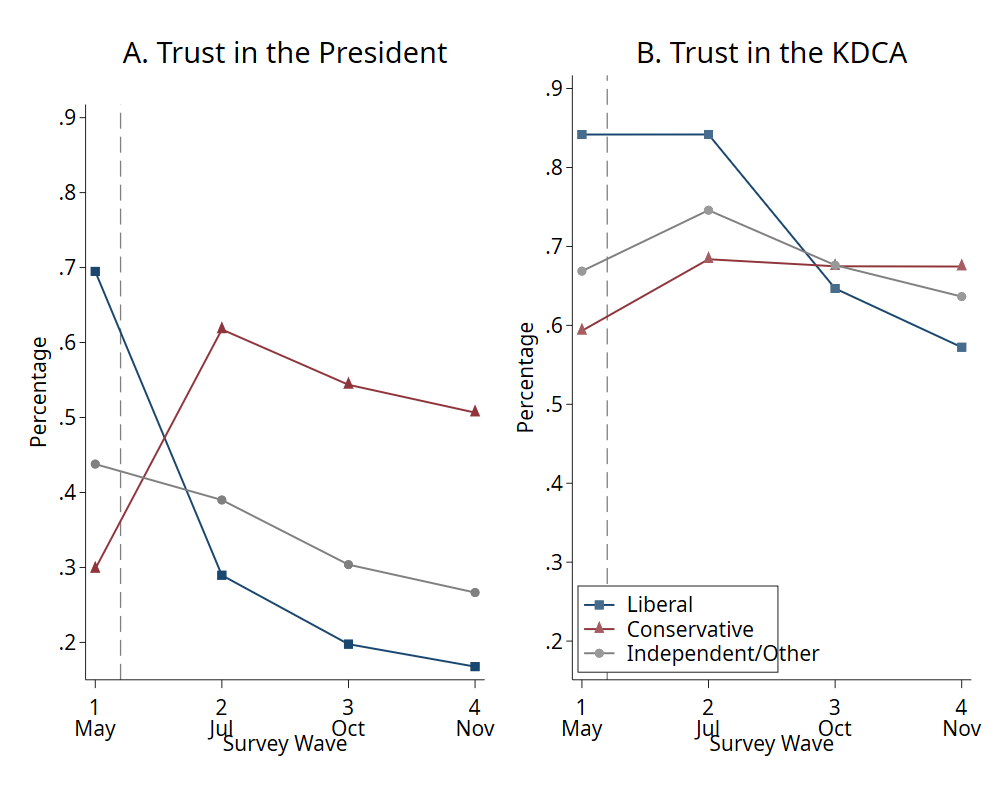

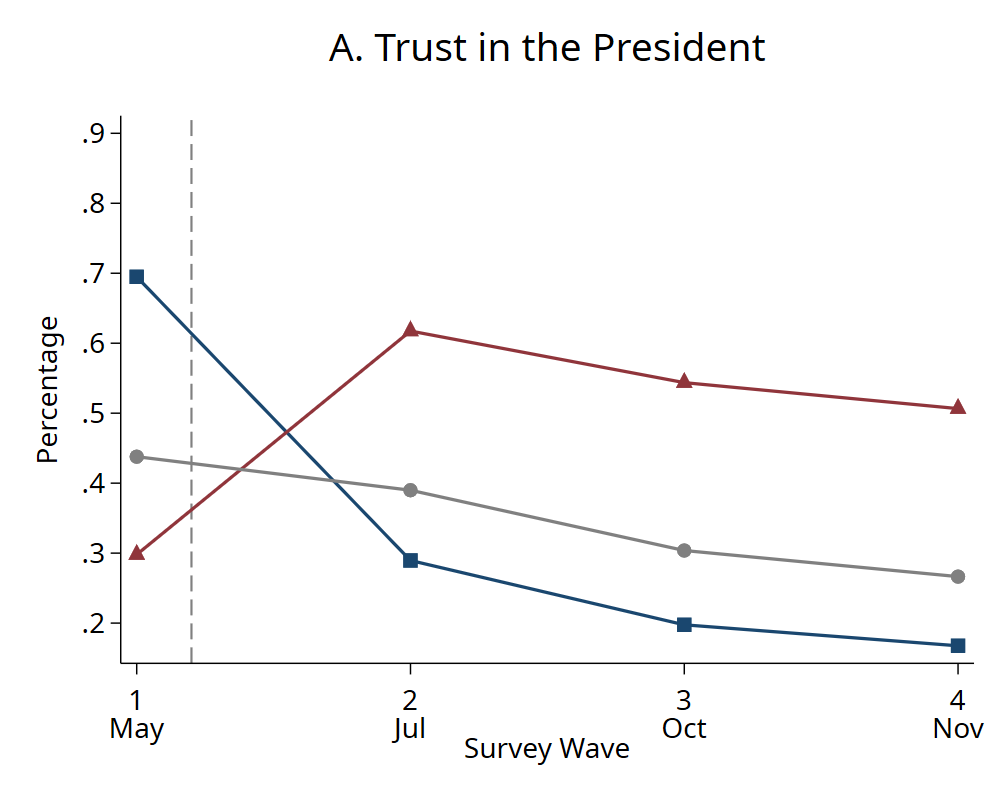

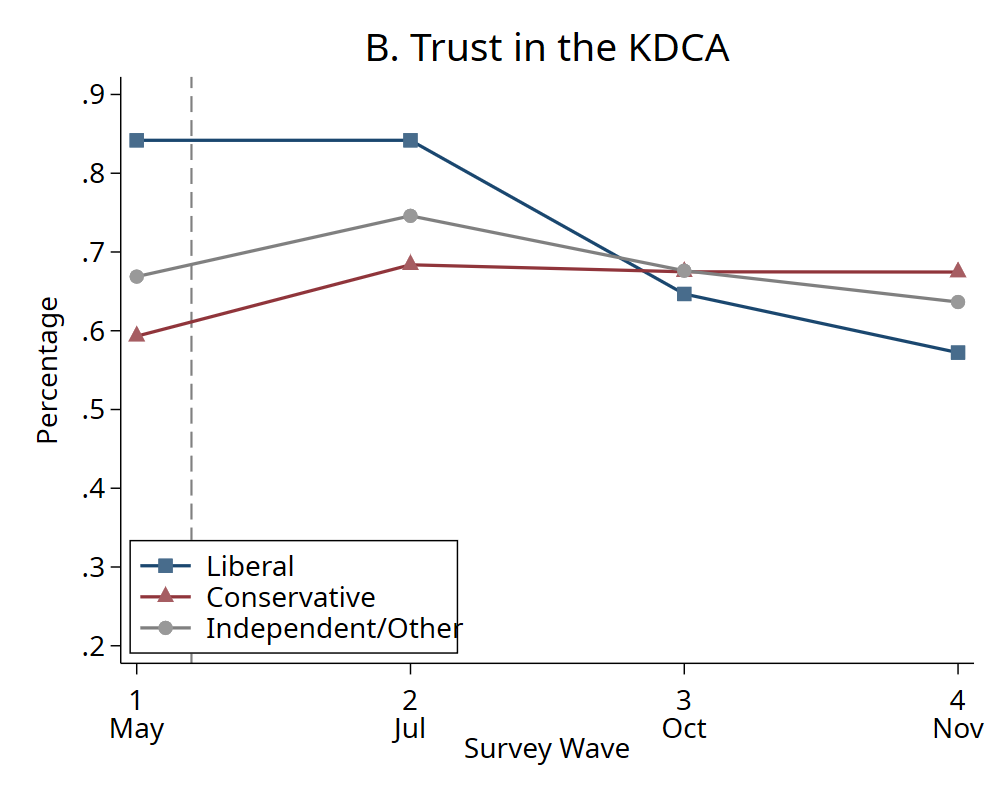

In [18]:
%%stata

/* ----- Figure 1. Trends of the Outcome Variables in the Study Period ----- */
local title1 `""A. Trust in the President" " ""'
local title2 `""B. Trust in the KDCA""'

local color1 navy
local color2 maroon
local color3 gray
local num = 0

use "HBK_W1_W4_clean", clear

tab TR_PRES WAVE if IDEOLOGY==0, col
tab TR_PRES WAVE if IDEOLOGY==1, col
tab TR_KDCA WAVE if IDEOLOGY==0, col
tab TR_KDCA WAVE if IDEOLOGY==1, col

loc x TR_PRES
collapse (mean) `x', by(IDEOLOGY WAVE)

qui tw (con `x' WAVE if IDEOLOGY == 0, lcolor(`color1') mcolor(`color1') lw(medthick) msymbol(S)) ///
       (con `x' WAVE if IDEOLOGY == 1, lcolor(`color2') mcolor(`color2') lw(medthick) msymbol(T)) ///
       (con `x' WAVE if IDEOLOGY == 2, lcolor(`color3') mcolor(`color3') lw(medthick) msymbol(O)), ///
           title(`title1') ytitle(Percentage, margin(small)) xtitle(Survey Wave) ///
           ylabel(0.2(0.1)0.9) xlabel(1 `""1" "May""' 2 `""2" "Jul""' 3 `""3" "Oct""' 4 `""4" "Nov""', nogrid) ///
           xline(1.2, lp(dash) lc(gray)) ///
           legend(off) ///
           name(g1, replace)
                                      
use "HBK_W1_W4_clean", clear

loc x TR_KDCA
collapse (mean) `x', by(IDEOLOGY WAVE)

qui tw (con `x' WAVE if IDEOLOGY == 0, lcolor(`color1') mcolor(`color1'*0.8) lw(medthick) msymbol(S)) ///
       (con `x' WAVE if IDEOLOGY == 1, lcolor(`color2') mcolor(`color2'*0.8) lw(medthick) msymbol(T)) ///
       (con `x' WAVE if IDEOLOGY == 2, lcolor(`color3') mcolor(`color3'*0.8) lw(medthick) msymbol(O)), ///
           title(`title2') ytitle(Percentage, margin(small)) xtitle(Survey Wave) ///
           ylabel(0.2(0.1)0.9) xlabel(1 `""1" "May""' 2 `""2" "Jul""' 3 `""3" "Oct""' 4 `""4" "Nov""', nogrid) ///
           legend(order(1 "Liberal" 2 "Conservative" 3 "Independent/Other") position(7) size(*1) rowgap(0.3pt)) ///
           xline(1.2, lp(dash) lc(gray)) ///
           name(g2, replace)

graph combine g1 g2, ///
    ycommon b1("") l1("") cols(2) iscale(*1) xsize(12) ysize(7)
qui graph save "$outputs5\Fig1.gph", replace
qui graph export "$outputs5\Fig1.svg", replace
qui graph export "$outputs5\Fig1.jpg", replace

## Figure 2

In [20]:
%%stata
tab FEMALE WAVE


           |               WAVE
    Female |         1          2          3 |     Total
-----------+---------------------------------+----------
      Male |       764        765        764 |     2,293 
    Female |       736        735        736 |     2,207 
-----------+---------------------------------+----------
     Total |     1,500      1,500      1,500 |     4,500 










Average marginal effects                                 Number of obs = 6,000
Model VCE: Robust

Expression: Linear prediction, predict()
dy/dx wrt:  1.TR_PRES

---------------------------------------------------------------------------------
                |            Delta-method
                |      dy/dx   std. err.      z    P>|z|     [95% conf. interval]
----------------+----------------------------------------------------------------
0.TR_PRES       |  (base outcome)
----------------+----------------------------------------------------------------
1.TR_PRES       |
  IDEOLOGY#WAVE |
     Liberal#1  |    .452694   .0376695    12.02   0.000     .3788632    .5265248
     Liberal#2  |   .1429628   .0272901     5.24   0.000     .0894752    .1964504
     Liberal#3  |   .3544667   .0395202     8.97   0.000     .2770084    .4319249
     Liberal#4  |   .3665089   .0596432     6.15   0.000     .2496104    .4834074
Conservative#1  |   .4954247   .0383605    12.91   0.000     .4

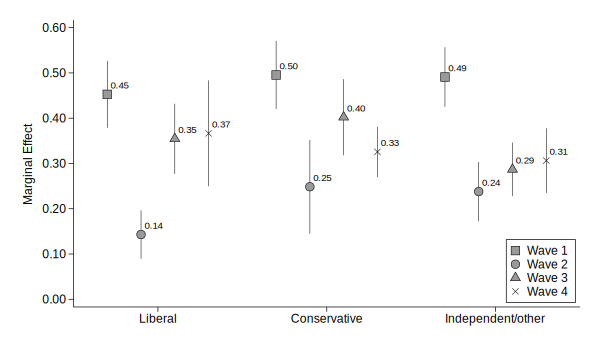

























file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\05_PolarizingTrust\Fig2.gph saved

file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\05_PolarizingTrust\Fig2.svg saved as SVG format

file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\05_PolarizingTrust\Fig2.jpg written in JPEG format


Appendix 7-2
-----------------------------------------------------------------
                       (1)                      (2)              
                Trust KDCA               Trust KDCA              
-----------------------------------------------------------------
Yes                   0.45*** [0.37,0.53]       0.45*** [0.37,0.53]
Conservative         -0.07    [-0.19,0.04]      -0.07    [-0.19,0.04]
Independent          -0.06    [-0.15,0.02]      -0.06    [-0.15,0.02]
Yes # Conserv~e       0.04    [-0.08,0.17]       0.04    [-0.08,0.17]
Yes # Indepen~t       0.04    [-0.06,0.13]       0.04    [-0.0

In [48]:
use "HBK_W1_W4_clean", clear
local outcomes TR_KDCA
local controls i.FEMALE i.AGE i.EDU i.UNEMPLOYED i.MS i.REL i.INCOME

local num = 0
eststo clear
foreach y in `outcomes' {
    local num = `num' + 1
    eststo xt`num': qui xtreg `y' i.TR_PRES##i.IDEOLOGY##i.WAVE `controls', fe vce(cluster prvc)
    eststo mfx`num': margins IDEOLOGY#WAVE, dydx(TR_PRES) vsquish
    mat li r(table)
    est save "$models\Fig2_mfx`num'.ster", replace
}

matrix M1 = J(3, 3, .)
matrix coln M1 = Beta LI95 UI95
matrix M1[1,1] = r(table)[1,13], r(table)[5,13], r(table)[6,13]
matrix M1[2,1] = r(table)[1,17], r(table)[5,17], r(table)[6,17]
matrix M1[3,1] = r(table)[1,21], r(table)[5,21], r(table)[6,21]

matrix M2 = J(3, 3, .)
matrix coln M1 = Beta LI95 UI95
matrix M2[1,1] = r(table)[1,14], r(table)[5,14], r(table)[6,14]
matrix M2[2,1] = r(table)[1,18], r(table)[5,18], r(table)[6,18]
matrix M2[3,1] = r(table)[1,22], r(table)[5,22], r(table)[6,22]

matrix M3 = J(3, 3, .)
matrix coln M1 = Beta LI95 UI95
matrix M3[1,1] = r(table)[1,15], r(table)[5,15], r(table)[6,15]
matrix M3[2,1] = r(table)[1,19], r(table)[5,19], r(table)[6,19]
matrix M3[3,1] = r(table)[1,23], r(table)[5,23], r(table)[6,23]

matrix M4 = J(3, 3, .)
matrix coln M1 = Beta LI95 UI95
matrix M4[1,1] = r(table)[1,16], r(table)[5,16], r(table)[6,16]
matrix M4[2,1] = r(table)[1,20], r(table)[5,20], r(table)[6,20]
matrix M4[3,1] = r(table)[1,24], r(table)[5,24], r(table)[6,24]

qui coefplot (matrix(M1[,1]), label(Wave 1) ci((2 3)) mcolor(gray*0.8) msymbol(S)) ///
             (matrix(M2[,1]), label(Wave 2) ci((2 3)) mcolor(gray*0.8) msymbol(O)) ///
             (matrix(M3[,1]), label(Wave 3) ci((2 3)) mcolor(gray*0.8) msymbol(T)) ///
             (matrix(M4[,1]), label(Wave 4) ci((2 3)) mcolor(gray*0.8) msymbol(X)) ///
     , xtitle(, margin(small)) ///
       ytitle("Marginal Effect", margin(tiny)) ///
       msymbol(s) byopts(cols(6)) ///
       coeflabels(r1 = "Liberal" r2 = "Conservative" r3 = "Independent/other") ///
       xsize(10) ysize(5) vertical ///
       subtitle(, fcolor(none) lstyle(none)) ///
       mlabel format(%9.2f) mlabsize(small) mlabcolor(black) mlabposition(1) ///
       msize(large) mlcolor(black) mlwidth(vthin) ///
       ciopts(lcolor(black) lwidth(vthin)) ///
       ylabel(0(0.1)0.6) ///
       legend(position(5) size(*1) rowgap(0.3pt)) ///
       plotregion(lwidth(thin) lpattern(solid)) ///
       name(g1, replace)
graph combine g1, ///
        b1("") ///
        l1("") ycommon ///
        xsize(12) ysize(7) iscale(*1)
graph save "$outputs5\Fig2.gph", replace
graph export "$outputs5\Fig2.svg", replace
graph export "$outputs5\Fig2.jpg", replace

esttab xt1 mfx1 ///
    ,replace b(2) ci(2) r2(2) ar2(2) ///
    title(Appendix 7-2) wide ///
    varwidth(15) modelwidth(10) nobase label

esttab xt1 mfx1 ///
    using "$outputs5\Fig2.rtf" ///
    ,replace b(2) ci(2) r2(2) ar2(2) ///
    title(Appendix 7-2) wide nogaps ///
    varwidth(15) modelwidth(10) nobase label

## Figure 3

In [41]:
use "HBK_W1_W4_clean", clear
local outcomes VAX_ADD VAX_EFF VAX_SIDE VAX_BNF
local controls i.FEMALE i.AGE i.EDU i.JOB i.MS i.REL i.INCOME

local num = 0
eststo clear
foreach y in `outcomes' {
    local num = `num' + 1
    eststo xt`num': qui xtreg `y' i.TR_KDCA##i.IDEOLOGY##i.WAVE `controls', fe vce(cluster prvc)
    eststo mfx`num': margins WAVE#IDEOLOGY, post vsquish
    est save "$models\Fig2_mfx`num'.ster", replace
}
/*
esttab xt1 xt2
    *using "$myimg\Appendix`tablenum'.rtf"
    ,replace b(2) se(2) r2(2) ar2(2) scalar(F)
    title(Appendix 7-2) wide
    varwidth(15) modelwidth(10) nobase label

esttab mfx1 mfx2
    *using "$myimg\Appendix`tablenum'.rtf"
    ,replace b(2) se(2) r2(2) ar2(2) scalar(F)
    title(Appendix 7-2) wide nogaps
    varwidth(15) modelwidth(10) nobase label

esttab xt1 xt2
    using "$outputs\Appendix7_2.rtf"
    ,replace b(2) se(2) r2(2) ar2(2) scalar(F)
    title(Appendix 7-2) wide nogaps
    varwidth(15) modelwidth(10) nobase label

*/








Predictive margins                                       Number of obs = 6,000
Model VCE: Robust

Expression: Linear prediction, predict()

---------------------------------------------------------------------------------
                |            Delta-method
                |     Margin   std. err.      z    P>|z|     [95% conf. interval]
----------------+----------------------------------------------------------------
  WAVE#IDEOLOGY |
     1#Liberal  |   .4973681   .0177158    28.07   0.000     .4626457    .5320904
1#Conservative  |   .4388989   .0172102    25.50   0.000     .4051675    .4726303
 1#Independent  |   .4382641   .0149904    29.24   0.000     .4088833    .4676448
     2#Liberal  |   .5368836    .035498    15.12   0.000     .4673089    .6064583
2#Conservative  |   .4784369   .0210371    22.74   0.000     .4372049    .5196688
 2#Independent  |   .4171815   .0118743    35.13   0.000     .3939083    .4404547
     3#Liberal  |   .4584671   .0294247    15.58   0.00

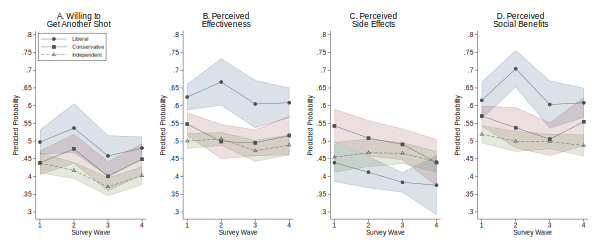
















file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\05_PolarizingTrust\Fig3_mfx.gph saved

file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\05_PolarizingTrust\Fig3_mfx.svg saved as SVG format

file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\05_PolarizingTrust\Fig3_mfx.jpg written in JPEG format


In [42]:
local outcomes VAX_ADD VAX_EFF VAX_SIDE VAX_BNF

local title1 `""A. Willing to" "Get Another Shot""'
local title2 `""B. Perceived" "Effectiveness""'
local title3 `""C. Perceived" "Side Effects""'
local title4 `""D. Perceived" "Social Benefits""'

local lw1 0.2
local lw2 0.5

local num = 0
eststo clear
foreach x in `outcomes' {
    local num = `num' + 1
    est use "$models/Fig2_mfx`num'.ster"
    qui marginsplot, ///
        title(`title`num'') xtitle("Survey Wave") ytitle("Predicted Probability") ///        
        xlabel(1 "1" 2 "2" 3 "3" 4 "4", nogrid) ///
        plot1opts(lw(`lw1') fcolor(`r(p1)') mcolor(gs5) lcolor(gs5) msymbol(O) acolor(black)) ///
        plot2opts(lw(`lw1') fcolor(`r(p2)') mcolor(gs5) lcolor(gs5) msymbol(S) acolor(black)) ///
        plot3opts(lw(`lw1') fcolor(gray) mcolor(gs5) lcolor(gs5) msymbol(Th) lpattern("-")) ///
        recastci(rarea) ciopt(color(%20)) ///
        xsize(8) ysize(6) ylabel(0.3(0.05)0.8) ///
        legend(off) ///
        name(g`num', replace)
}
est use "$models/Fig2_mfx1.ster"
    qui marginsplot, ///
        title(`title1') xtitle("Survey Wave") ytitle("Predicted Probability") ///        
        xlabel(1 "1" 2 "2" 3 "3" 4 "4", nogrid) ///
        plot1opts(lw(`lw1') fcolor(`r(p1)') mcolor(gs5) lcolor(gs5) msymbol(O) acolor(black)) ///
        plot2opts(lw(`lw1') fcolor(`r(p2)') mcolor(gs5) lcolor(gs5) msymbol(S) acolor(black)) ///
        plot3opts(lw(`lw1') fcolor(gray) mcolor(gs5) lcolor(gs5) msymbol(Th) lpattern("-")) ///
        recastci(rarea) ciopt(color(%20)) ///
        xsize(8) ysize(6) ylabel(0.3(0.05)0.8) ///
        legend(position(11) size(*0.8) rowgap(*0.4) symxsize(*2)) ///        
        name(g1, replace)

graph combine g1 g2 g3 g4, ///
        b1("") ///
        l1("") ycommon cols(4) ///
        xsize(12) ysize(5) iscale(*1)
graph save "$outputs5\Fig3_mfx.gph", replace
graph export "$outputs5\Fig3_mfx.svg", replace
graph export "$outputs5\Fig3_mfx.jpg", replace

In [ ]:
qui coefplot xt1, bylabel(`""A. Vaccine" "Effectiveness""') ||
             xt2, bylabel(`""B. Vaccine" "Social Benefits""') ||
             xt3, bylabel(`""C. Serious" "Side Effects""') ||
         , keep(1.CAT 2.CAT)
           *xtitle(, margin(small))
           ytitle(Likelihood Change After Vaccination, margin(tiny))
           msymbol(s) byopts(cols(6))
           coeflabels(1.CAT = `""Without" "Side" "Effects""' 2.CAT = `""With" "Side" "Effects""')
           xsize(10) ysize(5) vertical
           subtitle(, fcolor(none) lstyle(none))
           mlabel format(%9.2f) mlabsize(small) mlabposition(1)
           msize(large) mcolor(`r(p)'*0.8) mlcolor(black) mlwidth(vthin)
           ciopts(lcolor(black) lwidth(vthin))
           ylabel(-0.08(0.02)0.06)
           yline(0, lcolor(gray) lwidth(medium))
           legend(position(7) cols(2))
           plotregion(lwidth(thin) lpattern(solid))
           name(g1, replace);

## New Figure

In [39]:
use "HBK_W1_W4_clean", clear
gen WAVE3 = WAVE
replace WAVE3 = 3 if WAVE3==4

local controls i.FEMALE i.AGE i.EDU i.JOB i.MS i.REL i.INCOME
qui xtreg VAX_ADD i.TR_KDCA##i.IDEOLOGY##i.WAVE3 `controls', fe vce(cluster prvc)
margins WAVE3#IDEOLOGY, dydx(TR_KDCA)
mat li r(table)




(1,500 real changes made)




Average marginal effects                                 Number of obs = 6,000
Model VCE: Robust

Expression: Linear prediction, predict()
dy/dx wrt:  1.TR_KDCA

---------------------------------------------------------------------------------
                |            Delta-method
                |      dy/dx   std. err.      z    P>|z|     [95% conf. interval]
----------------+----------------------------------------------------------------
0.TR_KDCA       |  (base outcome)
----------------+----------------------------------------------------------------
1.TR_KDCA       |
 WAVE3#IDEOLOGY |
     1#Liberal  |   .1555287   .0634045     2.45   0.014     .0312581    .2797993
1#Conservative  |   .3248637   .0427744     7.59   0.000     .2410274    .4086999
 1#Independent  |   .2159307   .0328383     6.58   0.000     .1515687    .2802927
     2#Liberal  |   .1315783   .0544873     2.41   0.016     .0247851    .2383715
2#Conservative  |   .1771505   .05907







(1,500 real changes made)


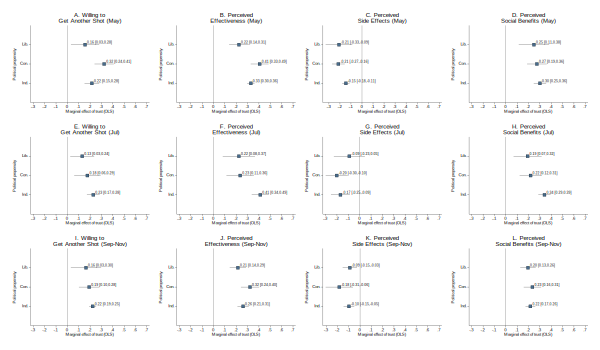






































































file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\05_PolarizingTrust\Fig_new.gph saved

file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\05_PolarizingTrust\Fig_new.jpg written in JPEG format


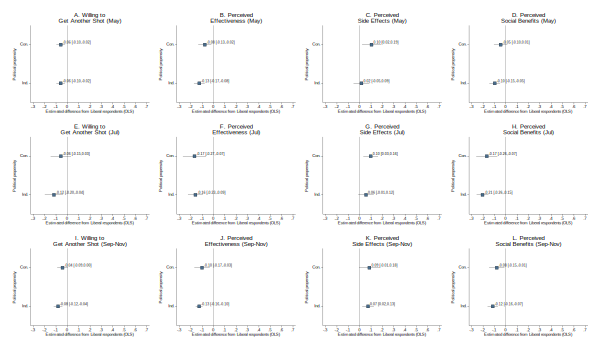




file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\05_PolarizingTrust\Fig_new2.gph saved

file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\05_PolarizingTrust\Fig_new2.jpg written in JPEG format


Figure 1
----------------------------------------------------------------------------------------------
                               (1)                (2)                (3)                (4)   
                   Will to Another    Perc Effectiv~s    Perc Side Eff~s    Perc Social B~s   
----------------------------------------------------------------------------------------------
Yes                         0.1559*            0.2239***         -0.2088**           0.2476** 
                       [0.02,0.29]        [0.13,0.32]      [-0.34,-0.08]        [0.10,0.39]   
Conservative               -0.1739**          -0.2021**           0.1081            -0.0635   
                     [-0.29,-0.06]      [-0.33,-0.07]       [-0.06,0.28]       

In [44]:
use "HBK_W1_W4_clean", clear
loc controls i.FEMALE i.AGE i.EDU i.UNEMPLOYED i.MS i.REL i.INCOME
local outcomes VAX_ADD VAX_EFF VAX_SIDE VAX_BNF
loc xrange -0.3(0.1)0.7

gen WAVE3 = WAVE
replace WAVE3 = 3 if WAVE3==4

local title1 `""A. Willing to" "Get Another Shot (May)""'
local title2 `""B. Perceived" "Effectiveness (May)""'
local title3 `""C. Perceived" "Side Effects (May)""'
local title4 `""D. Perceived" "Social Benefits (May)""'

local title5 `""E. Willing to" "Get Another Shot (Jul)""'
local title6 `""F. Perceived" "Effectiveness (Jul)""'
local title7 `""G. Perceived" "Side Effects (Jul)""'
local title8 `""H. Perceived" "Social Benefits (Jul)""'

local title9 `""I. Willing to" "Get Another Shot (Sep-Nov)""'
local title10 `""J. Perceived" "Effectiveness (Sep-Nov)""'
local title11 `""K. Perceived" "Side Effects (Sep-Nov)""'
local title12 `""L. Perceived" "Social Benefits (Sep-Nov)""'

* Wave 1
matrix M1_1 = J(3, 4, .)
matrix coln M1_1 = Beta LI95 UI95 pValue
matrix M1_2 = J(3, 4, .)
matrix coln M1_2 = Beta LI95 UI95 pValue
matrix M1_3 = J(3, 4, .)
matrix coln M1_3 = Beta LI95 UI95 pValue
matrix M1_4 = J(3, 4, .)
matrix coln M1_4 = Beta LI95 UI95 pValue

matrix M2_1 = J(3, 4, .)
matrix coln M2_1 = Beta LI95 UI95 pValue
matrix M2_2 = J(3, 4, .)
matrix coln M2_2 = Beta LI95 UI95 pValue
matrix M2_3 = J(3, 4, .)
matrix coln M2_3 = Beta LI95 UI95 pValue
matrix M2_4 = J(3, 4, .)
matrix coln M2_4 = Beta LI95 UI95 pValue

matrix M3_1 = J(3, 4, .)
matrix coln M3_1 = Beta LI95 UI95 pValue
matrix M3_2 = J(3, 4, .)
matrix coln M3_2 = Beta LI95 UI95 pValue
matrix M3_3 = J(3, 4, .)
matrix coln M3_3 = Beta LI95 UI95 pValue
matrix M3_4 = J(3, 4, .)
matrix coln M3_4 = Beta LI95 UI95 pValue

matrix P1_1 = J(2, 4, .)
matrix coln P1_1 = Beta LI95 UI95 pValue
matrix P1_2 = J(2, 4, .)
matrix coln P1_2 = Beta LI95 UI95 pValue
matrix P1_3 = J(2, 4, .)
matrix coln P1_3 = Beta LI95 UI95 pValue
matrix P1_4 = J(2, 4, .)
matrix coln P1_4 = Beta LI95 UI95 pValue

matrix P2_1 = J(2, 4, .)
matrix coln P2_1 = Beta LI95 UI95 pValue
matrix P2_2 = J(2, 4, .)
matrix coln P2_2 = Beta LI95 UI95 pValue
matrix P2_3 = J(2, 4, .)
matrix coln P2_3 = Beta LI95 UI95 pValue
matrix P2_4 = J(2, 4, .)
matrix coln P2_4 = Beta LI95 UI95 pValue

matrix P3_1 = J(2, 4, .)
matrix coln P3_1 = Beta LI95 UI95 pValue
matrix P3_2 = J(2, 4, .)
matrix coln P3_2 = Beta LI95 UI95 pValue
matrix P3_3 = J(2, 4, .)
matrix coln P3_3 = Beta LI95 UI95 pValue
matrix P3_4 = J(2, 4, .)
matrix coln P3_4 = Beta LI95 UI95 pValue

loc i = 0
foreach y in `outcomes' {
    loc i = `i' + 1
    
    eststo lm`i': qui xtreg `y' i.TR_KDCA##i.IDEOLOGY##i.WAVE3 `controls', fe vce(cluster prvc)
    qui margins WAVE3#IDEOLOGY, dydx(TR_KDCA)
    matrix M1_`i'[1,1] = r(table)[1,10], r(table)[5,10], r(table)[6,10], r(table)[4,10]
    matrix M1_`i'[2,1] = r(table)[1,11], r(table)[5,11], r(table)[6,11], r(table)[4,11]
    matrix M1_`i'[3,1] = r(table)[1,12], r(table)[5,12], r(table)[6,12], r(table)[4,12]
    
    matrix M2_`i'[1,1] = r(table)[1,13], r(table)[5,13], r(table)[6,13], r(table)[4,13]
    matrix M2_`i'[2,1] = r(table)[1,14], r(table)[5,14], r(table)[6,14], r(table)[4,14]
    matrix M2_`i'[3,1] = r(table)[1,15], r(table)[5,15], r(table)[6,15], r(table)[4,15]
    
    matrix M3_`i'[1,1] = r(table)[1,16], r(table)[5,16], r(table)[6,16], r(table)[4,16]
    matrix M3_`i'[2,1] = r(table)[1,17], r(table)[5,17], r(table)[6,17], r(table)[4,17]
    matrix M3_`i'[3,1] = r(table)[1,18], r(table)[5,18], r(table)[6,18], r(table)[4,18]
    
    qui margins WAVE3, dydx(IDEOLOGY)
    matrix P1_`i'[1,1] = r(table)[1,4], r(table)[5,4], r(table)[6,4], r(table)[4,4]
    matrix P1_`i'[2,1] = r(table)[1,7], r(table)[5,7], r(table)[6,7], r(table)[4,7]
    
    matrix P2_`i'[1,1] = r(table)[1,5], r(table)[5,5], r(table)[6,5], r(table)[4,5]
    matrix P2_`i'[2,1] = r(table)[1,8], r(table)[5,8], r(table)[6,8], r(table)[4,8]
    
    matrix P3_`i'[1,1] = r(table)[1,6], r(table)[5,6], r(table)[6,6], r(table)[4,6]
    matrix P3_`i'[2,1] = r(table)[1,9], r(table)[5,9], r(table)[6,9], r(table)[4,9]
}

loc i = 0
forvalue i = 1(1)4 {
    qui coefplot (matrix(M1_`i'[,1]), ci((2 3)) mfcolor(navy*0.8)), ///
         title(`title`i'') xtitle("Marginal effect of trust (OLS)") ytitle("Political propensity") ///
         coeflabels(r1="Lib." r2="Con." r3="Ind.", wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(0, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) ///
         mlabel("     " + string(@b, "%9.2f") + " [" + string(@ll, "%9.2f") + "," + string(@ul, "%9.2f") + "]") mlabformat("%9.2f") ///
         mlabcolor(black) mlabpos(2) mlabgap(*1) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(medium)) ///
         legend(off) ///
         name(g`i', replace)
    
    loc j = `i' + 4
    qui coefplot (matrix(M2_`i'[,1]), ci((2 3)) mfcolor(navy*0.8)), ///
         title(`title`j'') xtitle("Marginal effect of trust (OLS)") ytitle("Political propensity") ///
         coeflabels(r1="Lib." r2="Con." r3="Ind.", wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(0, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) ///
         mlabel("     " + string(@b, "%9.2f") + " [" + string(@ll, "%9.2f") + "," + string(@ul, "%9.2f") + "]") mlabformat("%9.2f") ///
         mlabcolor(black) mlabpos(2) mlabgap(*1) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(medium)) ///
         legend(off) ///         
         name(g`j', replace)
    
    loc j = `i' + 8
    qui coefplot (matrix(M3_`i'[,1]), ci((2 3)) mfcolor(navy*0.8)), ///
         title(`title`j'') xtitle("Marginal effect of trust (OLS)") ytitle("Political propensity") ///
         coeflabels(r1="Lib." r2="Con." r3="Ind.", wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(0, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) ///
         mlabel("     " + string(@b, "%9.2f") + " [" + string(@ll, "%9.2f") + "," + string(@ul, "%9.2f") + "]") mlabformat("%9.2f") ///
         mlabcolor(black) mlabpos(2) mlabgap(*1) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(medium)) ///
         legend(off) ///
         name(g`j', replace)
}

loc i = 0
forvalue i = 1(1)4 {
    qui coefplot (matrix(P1_`i'[,1]), ci((2 3)) mfcolor(navy*0.8)), ///
         title(`title`i'') xtitle("Estimated difference from Liberal respondents (OLS)") ytitle("Political propensity") ///
         coeflabels(r1="Con." r2="Ind.", wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(0, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) ///
         mlabel("     " + string(@b, "%9.2f") + " [" + string(@ll, "%9.2f") + "," + string(@ul, "%9.2f") + "]") mlabformat("%9.2f") ///
         mlabcolor(black) mlabpos(2) mlabgap(*1) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(medium)) ///
         legend(off) ///
         name(p`i', replace)
    
    loc j = `i' + 4
    qui coefplot (matrix(P2_`i'[,1]), ci((2 3)) mfcolor(navy*0.8)), ///
         title(`title`j'') xtitle("Estimated difference from Liberal respondents (OLS)") ytitle("Political propensity") ///
         coeflabels(r1="Con." r2="Ind.", wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(0, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) ///
         mlabel("     " + string(@b, "%9.2f") + " [" + string(@ll, "%9.2f") + "," + string(@ul, "%9.2f") + "]") mlabformat("%9.2f") ///
         mlabcolor(black) mlabpos(2) mlabgap(*1) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(medium)) ///
         legend(off) ///         
         name(p`j', replace)
    
    loc j = `i' + 8
    qui coefplot (matrix(P3_`i'[,1]), ci((2 3)) mfcolor(navy*0.8)), ///
         title(`title`j'') xtitle("Estimated difference from Liberal respondents (OLS)") ytitle("Political propensity") ///
         coeflabels(r1="Con." r2="Ind.", wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(0, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) ///
         mlabel("     " + string(@b, "%9.2f") + " [" + string(@ll, "%9.2f") + "," + string(@ul, "%9.2f") + "]") mlabformat("%9.2f") ///
         mlabcolor(black) mlabpos(2) mlabgap(*1) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(medium)) ///
         legend(off) ///
         name(p`j', replace)
}

graph combine g1 g2 g3 g4 g5 g6 g7 g8 g9 g10 g11 g12, ///
        b1("") ycommon ///
        l1("") cols(4) ///
        xsize(12) ysize(7) iscale(*0.7)
graph save "$outputs5\Fig_new.gph", replace
graph export "$outputs5\Fig_new.jpg", replace

graph combine p1 p2 p3 p4 p5 p6 p7 p8 p9 p10 p11 p12, ///
        b1("") ycommon ///
        l1("") cols(4) ///
        xsize(12) ysize(7) iscale(*0.7)
graph save "$outputs5\Fig_new2.gph", replace
graph export "$outputs5\Fig_new2.jpg", replace

esttab lm1 lm2 lm3 lm4 ///
    , replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Figure 1) nogaps ///
    varwidth(18) modelwidth(15) nobase label
esttab lm1 lm2 lm3 lm4 ///
    using "$outputs5\Appendix_Fig1.rtf" ///
    , replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Figure 1) nogaps ///
    varwidth(18) modelwidth(15) nobase label

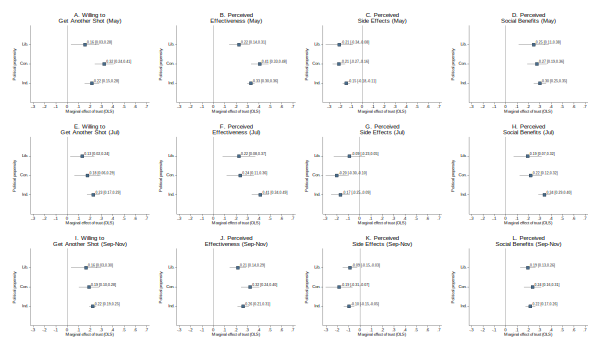




file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\05_PolarizingTrust\Fig_new.gph saved

file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\05_PolarizingTrust\Fig_new.jpg written in JPEG format


In [35]:
graph combine g1 g2 g3 g4 g5 g6 g7 g8 g9 g10 g11 g12, ///
        b1("") ycommon ///
        l1("") cols(4) ///
        xsize(12) ysize(7) iscale(*0.7)
graph save "$outputs5\Fig_new.gph", replace
graph export "$outputs5\Fig_new.jpg", replace

In [ ]:
use "HBK_W1_W4_clean", clear
loc controls i.FEMALE i.AGE i.EDU i.JOB i.MS i.REL i.INCOME
local outcomes VAX_ADD VAX_EFF VAX_SIDE VAX_BNF
loc xrange -0.3(0.1)0.7

gen WAVE3 = WAVE
replace WAVE3 = 3 if WAVE3==4

local title1 `""A. Willing to" "Get Another Shot (May)""'
local title2 `""B. Perceived" "Effectiveness (May)""'
local title3 `""C. Perceived" "Side Effects (May)""'
local title4 `""D. Perceived" "Social Benefits (May)""'

local title5 `""E. Willing to" "Get Another Shot (Jul)""'
local title6 `""F. Perceived" "Effectiveness (Jul)""'
local title7 `""G. Perceived" "Side Effects (Jul)""'
local title8 `""H. Perceived" "Social Benefits (Jul)""'

local title9 `""I. Willing to" "Get Another Shot (Sep-Nov)""'
local title10 `""J. Perceived" "Effectiveness (Sep-Nov)""'
local title11 `""K. Perceived" "Side Effects (Sep-Nov)""'
local title12 `""L. Perceived" "Social Benefits (Sep-Nov)""'

* Wave 1
matrix M1_1 = J(3, 4, .)
matrix coln M1_1 = Beta LI95 UI95 pValue
matrix M1_2 = J(3, 4, .)
matrix coln M1_2 = Beta LI95 UI95 pValue
matrix M1_3 = J(3, 4, .)
matrix coln M1_3 = Beta LI95 UI95 pValue
matrix M1_4 = J(3, 4, .)
matrix coln M1_4 = Beta LI95 UI95 pValue

matrix M2_1 = J(3, 4, .)
matrix coln M2_1 = Beta LI95 UI95 pValue
matrix M2_2 = J(3, 4, .)
matrix coln M2_2 = Beta LI95 UI95 pValue
matrix M2_3 = J(3, 4, .)
matrix coln M2_3 = Beta LI95 UI95 pValue
matrix M2_4 = J(3, 4, .)
matrix coln M2_4 = Beta LI95 UI95 pValue

matrix M3_1 = J(3, 4, .)
matrix coln M3_1 = Beta LI95 UI95 pValue
matrix M3_2 = J(3, 4, .)
matrix coln M3_2 = Beta LI95 UI95 pValue
matrix M3_3 = J(3, 4, .)
matrix coln M3_3 = Beta LI95 UI95 pValue
matrix M3_4 = J(3, 4, .)
matrix coln M3_4 = Beta LI95 UI95 pValue

loc i = 0
foreach y in `outcomes' {
    loc i = `i' + 1
    
    eststo lm`i': qui xtreg `y' i.TR_KDCA##i.IDEOLOGY##i.WAVE3 `controls', fe vce(cluster prvc)
    qui margins WAVE3#IDEOLOGY, dydx(TR_KDCA)
    matrix M1_`i'[1,1] = r(table)[1,10], r(table)[5,10], r(table)[6,10], r(table)[4,10]
    matrix M1_`i'[2,1] = r(table)[1,11], r(table)[5,11], r(table)[6,11], r(table)[4,11]
    matrix M1_`i'[3,1] = r(table)[1,12], r(table)[5,12], r(table)[6,12], r(table)[4,12]
    
    matrix M2_`i'[1,1] = r(table)[1,13], r(table)[5,13], r(table)[6,13], r(table)[4,13]
    matrix M2_`i'[2,1] = r(table)[1,14], r(table)[5,14], r(table)[6,14], r(table)[4,14]
    matrix M2_`i'[3,1] = r(table)[1,15], r(table)[5,15], r(table)[6,15], r(table)[4,15]
    
    matrix M3_`i'[1,1] = r(table)[1,16], r(table)[5,16], r(table)[6,16], r(table)[4,16]
    matrix M3_`i'[2,1] = r(table)[1,17], r(table)[5,17], r(table)[6,17], r(table)[4,17]
    matrix M3_`i'[3,1] = r(table)[1,18], r(table)[5,18], r(table)[6,18], r(table)[4,18]
}

loc i = 0
forvalue i = 1(1)4 {
    qui coefplot (matrix(M1_`i'[,1]), ci((2 3)) mfcolor(navy*0.8)), ///
         title(`title`i'') xtitle("Marginal effect of trust (OLS)") ytitle("Political propensity") ///
         coeflabels(r1="Lib." r2="Con." r3="Ind.", wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(0, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) ///
         mlabel("     " + string(@b, "%9.2f") + " [" + string(@ll, "%9.2f") + "," + string(@ul, "%9.2f") + "]") mlabformat("%9.2f") ///
         mlabcolor(black) mlabpos(2) mlabgap(*1) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(medium)) ///
         legend(off) ///
         name(g`i', replace)
    
    loc j = `i' + 4
    qui coefplot (matrix(M2_`i'[,1]), ci((2 3)) mfcolor(navy*0.8)), ///
         title(`title`j'') xtitle("Marginal effect of trust (OLS)") ytitle("Political propensity") ///
         coeflabels(r1="Lib." r2="Con." r3="Ind.", wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(0, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) ///
         mlabel("     " + string(@b, "%9.2f") + " [" + string(@ll, "%9.2f") + "," + string(@ul, "%9.2f") + "]") mlabformat("%9.2f") ///
         mlabcolor(black) mlabpos(2) mlabgap(*1) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(medium)) ///
         legend(off) ///         
         name(g`j', replace)
    
    loc j = `i' + 8
    qui coefplot (matrix(M3_`i'[,1]), ci((2 3)) mfcolor(navy*0.8)), ///
         title(`title`j'') xtitle("Marginal effect of trust (OLS)") ytitle("Political propensity") ///
         coeflabels(r1="Lib." r2="Con." r3="Ind.", wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(0, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) ///
         mlabel("     " + string(@b, "%9.2f") + " [" + string(@ll, "%9.2f") + "," + string(@ul, "%9.2f") + "]") mlabformat("%9.2f") ///
         mlabcolor(black) mlabpos(2) mlabgap(*1) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(medium)) ///
         legend(off) ///
         name(g`j', replace)
}
qui coefplot (matrix(M3_1[,1]), ci((2 3)) mfcolor(navy*0.8)), ///
         title(`title9') xtitle("Marginal effect of trust (OLS)") ytitle("Political propensity") ///
         coeflabels(r1="Lib." r2="Con." r3="Ind.", wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(0, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) ///
         mlabel("     " + string(@b, "%9.2f") + " [" + string(@ll, "%9.2f") + "," + string(@ul, "%9.2f") + "]") mlabformat("%9.2f") ///
         mlabcolor(black) mlabpos(2) mlabgap(*1) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(medium)) ///
         legend(off) ///
         name(g9, replace)

graph combine g1 g2 g3 g4 g5 g6 g7 g8 g9 g10 g11 g12, ///
        b1("") ycommon ///
        l1("") cols(4) ///
        xsize(12) ysize(7) iscale(*0.7)
graph save "$outputs5\Fig_new.gph", replace
graph export "$outputs5\Fig_new.jpg", replace

# Performance

In [2]:
use "HBK_W1_W4_clean", clear

gen CatEffec = 0
replace CatEffec = 1 if TR_KDCA==1 & PF_EFFC==0
replace CatEffec = 2 if TR_KDCA==0 & PF_EFFC==1
replace CatEffec = 3 if TR_KDCA==0 & PF_EFFC==0
label define CatEffec 0 "TrGov/Effec" 1 "TrGov/Ineffec" 2 "MisGov/Effec" 3 "MisGov/Ineffec"
label val CatEffec CatEffec

gen CatEffi = 0
replace CatEffi = 1 if TR_KDCA==1 & PF_EFFI==0
replace CatEffi = 2 if TR_KDCA==0 & PF_EFFI==1
replace CatEffi = 3 if TR_KDCA==0 & PF_EFFI==0
label define CatEffi 0 "TrGov/Effi" 1 "TrGov/Ineffi" 2 "MisGov/Effi" 3 "MisGov/Ineffi"
label val CatEffi CatEffi

gen CatTran = 0
replace CatTran = 1 if TR_KDCA==1 & PF_TRAN==0
replace CatTran = 2 if TR_KDCA==0 & PF_TRAN==1
replace CatTran = 3 if TR_KDCA==0 & PF_TRAN==0
label define CatTran 0 "TrGov/Tran" 1 "TrGov/Opaq" 2 "MisGov/Tran" 3 "MisGov/Opaq"
label val CatTran CatTran




(882 real changes made)

(446 real changes made)

(1,431 real changes made)




(687 real changes made)

(228 real changes made)

(821 real changes made)




(1,279 real changes made)

(345 real changes made)

(1,532 real changes made)




In [40]:
use "HBK_W1_W4_clean", clear
corr TR_KDCA PF_EFFC PF_EQUI PF_TRAN

(obs=2,000)

             |       TR  PF_EFFC  PF_EQUI  PF_TRAN
-------------+------------------------------------
          TR |   1.0000
     PF_EFFC |   0.4455   1.0000
     PF_EQUI |   0.4166   0.5333   1.0000
     PF_TRAN |   0.3846   0.5030   0.5369   1.0000



In [41]:
use "KIOST_clean", clear
corr TR_MOF PF_EFFC_MOF PF_EQUI_MOF PF_TRAN_MOF



(obs=2,000)

             |   TR_MOF PF_EFF~F PF_EQU~F PF_TRA~F
-------------+------------------------------------
      TR_MOF |   1.0000
 PF_EFFC_MOF |   0.4455   1.0000
 PF_EQUI_MOF |   0.4166   0.5333   1.0000
 PF_TRAN_MOF |   0.3846   0.5030   0.5369   1.0000



In [11]:
loc controls i.IDEOLOGY i.COVID_EXGG i.FEMALE i.AGE i.EDU i.MS i.JOB2 i.REL i.INCOME i.WAVE
xtreg VAX_ADD i.CatEffec `controls', robust



(43 missing values generated)

Random-effects GLS regression                   Number of obs     =      6,000
Group variable: prvc                            Number of groups  =         17

R-squared:                                      Obs per group:
     Within  = 0.1070                                         min =         46
     Between = 0.2558                                         avg =      352.9
     Overall = 0.1077                                         max =      1,599

                                                Wald chi2(16)     =          .
corr(u_i, X) = 0 (assumed)                      Prob > chi2       =          .

                                         (Std. err. adjusted for 17 clusters in prvc)
-------------------------------------------------------------------------------------
                    |               Robust
            VAX_ADD | Coefficient  std. err.      z    P>|z|     [95% conf. interval]
--------------------+--------------------------

## Descriptive Statistics (Weighted)

### Table 1. Weighted

In [54]:
capt prog drop ctab
program ctab, eclass
    syntax varlist [if] [in]
    // Row 1: No. of Observations
    qui tab DATA
    matrix temp = r(N)
    local c1 = temp[1,1]
    qui tab DATA if DATA == "Vaccine"
    matrix temp = r(N)
    local c2 = temp[1,1]
    qui tab DATA if DATA == "Marine"
    matrix temp = r(N)
    local c3 = temp[1,1]

    mat M = (`c1',`c2',`c3',0)
    mat rownames M = "No of Obs"
    mat colnames M = "All" "Vaccine" "Marine" "Chi-squared"

    local num = 0
    foreach x in `varlist'{
        local num = `num' + 1

        svy: qui mean `x'
        matrix temp = e(b)
        local m1 = temp[1,1]*100
        svy: qui mean `x' if DATA=="Vaccine"
        matrix temp = e(b)
        local m2 = temp[1,1]*100
        svy: qui mean `x' if DATA=="Marine"
        matrix temp = e(b)
        local m3 = temp[1,1]*100

        qui tab `x' DATA, chi
        mat temp = r(p)
        local m4 = temp[1,1]

        mat temp = (`m1',`m2',`m3',`m4')
        local rowname: variable label `x'
        mat rownames temp = "`rowname'"
        mat M = M\temp
        // mat M = M[1..3,1...]
    }
    esttab matrix(M, fmt("0 2"))
    esttab matrix(M, fmt("0 2")) using "$outputs7\Table1_1.rtf", replace
end

In [83]:
tab DATA EDU, V
e(V)



           |            Education
      DATA | High scho  Associate   Graduate |     Total
-----------+---------------------------------+----------
    Marine |       516      1,146        338 |     2,000 
   Vaccine |     1,347      3,871        782 |     6,000 
-----------+---------------------------------+----------
     Total |     1,863      5,017      1,120 |     8,000 

               Cramér's V =   0.0668

V ambiguous abbreviation


r(111);
r(111);


In [85]:
use "_Merged.dta", clear
svyset [pweight=weight], strata(EDU)

qui tab IDEOLOGY, gen(IDEOLOGY_)
label var IDEOLOGY_1 "Liberal"
label var IDEOLOGY_2 "Independent"
label var IDEOLOGY_3 "Conservative"
qui tab AGE, gen(AGE_)
qui tab EDU, gen(EDU_)
label var EDU_1 "High school or less"
label var EDU_2 "BA"
label var EDU_3 "MA or more"
qui tab INFECTED, gen(INFECTED_)
label var INFECTED_1 "Never infected"
label var INFECTED_2 "Myself"
label var INFECTED_3 "Others"
qui tab INCOME, gen(INCOME_)
label var INCOME_1 "<₩2M"
label var INCOME_2 "₩2M-₩3.99M"
label var INCOME_3 "₩4M-₩5.99M"
label var INCOME_4 "₩6M-₩7.99M"
label var INCOME_5 ">₩7.99M"

loc varlist VAX3 VAX_ADD ///
    auto_ship blockchain forecast cap_illegal iden_plastic auto_weapon auto_robot ///
    PF_EFFC PF_TRAN PF_EFFC_MOF PF_TRAN_MOF TR_KDCA TR_MOF COVID_EXGG INFECTED_1 INFECTED_2 INFECTED_3
foreach x in `varlist' {
    di "----------"
    di "`x'"
    qui svy: mean `x'
    matrix temp = e(b)
    local m1 = temp[1,1]*100
    di %9.2f `m1'
}

loc varlist IDEOLOGY_1 IDEOLOGY_2 IDEOLOGY_3 FEMALE MS UNEMPLOYED REL ///
    AGE_1 AGE_2 AGE_3 AGE_4 AGE_5 ///
    EDU_1 EDU_2 EDU_3 ///
    INCOME_1 INCOME_2 INCOME_3 INCOME_4 INCOME_5
foreach x in `varlist' {
    di "----------"
    di "`x'"
    qui svy: mean `x'
    matrix temp = e(b)
    local m1 = temp[1,1]*100
    di "All " %9.2f `m1'
    
    qui svy: mean `x' if DATA=="Vaccine"
    matrix temp = e(b)
    local m1 = temp[1,1]*100
    di "Vaccine " %9.2f `m1'
    
    qui svy: mean `x' if DATA=="Marine"
    matrix temp = e(b)
    local m1 = temp[1,1]*100
    di "Marine " %9.2f `m1'
}

loc varlist IDEOLOGY FEMALE MS UNEMPLOYED REL AGE EDU INCOME
foreach x in `varlist' {
    di "----------"
    di "`x'"
    tab `x' DATA, V
    matrix temp = e(V)
    local m1 = temp[1,1]
    di %9.2f `m1'
}




Sampling weights: weight
             VCE: linearized
     Single unit: missing
        Strata 1: EDU
 Sampling unit 1: <observations>
           FPC 1: <zero>





















----------
VAX3
    65.37
----------
VAX_ADD
    43.86
----------
auto_ship
    74.02
----------
blockchain
    73.84
----------
forecast
    78.52
----------
cap_illegal
    78.85
----------
iden_plastic
    83.32
----------
auto_weapon
    69.59
----------
auto_robot
    76.64
----------
PF_EFFC
    61.07
----------
PF_TRAN
    52.22
----------
PF_EFFC_MOF
    38.71
----------
PF_TRAN_MOF
    33.97
----------
TR_KDCA
    68.44
----------
TR_MOF
    34.16
----------
COVID_EXGG
    35.85
----------
INFECTED_1
    13.54
----------
INFECTED_2
     7.75
----------
INFECTED_3
    78.71


----------
IDEOLOGY_1
All     24.06
Vaccine     23.63
Marine     25.36
----------
IDEOLOGY_2
All     24.29
Vaccine     23.68
Marine     26.11
----------
IDEOLOGY_3
All     51.65
Vaccine     52.70
Marine     48.53
----------
F

In [55]:
use "_Merged.dta", clear
svyset [pweight=weight], strata(EDU)

qui tab IDEOLOGY, gen(IDEOLOGY_)
label var IDEOLOGY_1 "Liberal"
label var IDEOLOGY_2 "Independent"
label var IDEOLOGY_3 "Conservative"
qui tab AGE, gen(AGE_)
qui tab EDU, gen(EDU_)
label var EDU_1 "High school or less"
label var EDU_2 "BA"
label var EDU_3 "MA or more"
qui tab INFECTED, gen(INFECTED_)
label var INFECTED_1 "Never infected"
label var INFECTED_2 "Myself"
label var INFECTED_3 "Others"
qui tab INCOME, gen(INCOME_)
label var INCOME_1 "<₩2M"
label var INCOME_2 "₩2M-₩3.99M"
label var INCOME_3 "₩4M-₩5.99M"
label var INCOME_4 "₩6M-₩7.99M"
label var INCOME_5 ">₩7.99M"

ctab VAX3 VAX_ADD ///
     auto_ship blockchain forecast cap_illegal iden_plastic auto_weapon auto_robot ///
     PF_EFFC PF_TRAN PF_EFFC_MOF PF_TRAN_MOF TR_KDCA TR_MOF ///
     IDEOLOGY_1-IDEOLOGY_3 COVID_EXGG INFECTED_1-INFECTED_3 FEMALE MS UNEMPLOYED REL AGE_1-AGE_5 EDU_1-EDU_3 INCOME_1-INCOME_5




Sampling weights: weight
             VCE: linearized
     Single unit: missing
        Strata 1: EDU
 Sampling unit 1: <observations>
           FPC 1: <zero>




















(note: ignoring quietly)
(running mean on estimation sample)

Survey: Mean estimation

Number of strata =     3          Number of obs   =      6,000
Number of PSUs   = 6,000          Population size = 5,999.9998
                                  Design df       =      5,997

--------------------------------------------------------------
             |             Linearized
             |       Mean   std. err.     [95% conf. interval]
-------------+------------------------------------------------
        VAX3 |    .653676   .0069139      .6401223    .6672297
--------------------------------------------------------------
(note: ignoring quietly)
(running mean on estimation sample)

Survey: Mean estimation

Number of strata =     3          Number of obs   =      6,000
Number of PSUs   = 6,000          Pop

r(2000);
r(2000);


### Appendix 1. Unweighted

In [41]:
capt prog drop ctab
program ctab, eclass
    syntax varlist [if] [in]
    // Row 1: No. of Observations
    qui tab DATA
    matrix temp = r(N)
    local c1 = temp[1,1]
    qui tab DATA if DATA == "Vaccine"
    matrix temp = r(N)
    local c2 = temp[1,1]
    qui tab DATA if DATA == "Marine"
    matrix temp = r(N)
    local c3 = temp[1,1]

    mat M = (`c1',`c2',`c3',0)
    mat rownames M = "No of Obs"
    mat colnames M = "All" "Vaccine" "Marine" "Chi-squared"

    local num = 0
    foreach x in `varlist'{
        local num = `num' + 1

        qui sum `x'
        matrix temp = r(mean)
        local m1 = temp[1,1]*100
        qui sum `x' if DATA=="Vaccine"
        matrix temp = r(mean)
        local m2 = temp[1,1]*100
        qui sum `x' if DATA=="Marine"
        matrix temp = r(mean)
        local m3 = temp[1,1]*100

        qui tab `x' WAVE, chi
        mat temp = r(p)
        local m4 = temp[1,1]

        mat temp = (`m1',`m2',`m3',`m4')
        local rowname: variable label `x'
        mat rownames temp = "`rowname'"
        mat M = M\temp
        // mat M = M[1..3,1...]
    }
    esttab matrix(M, fmt("0 2"))
    esttab matrix(M, fmt("0 2")) using "$outputs7\Appendix2.rtf", replace
end

In [64]:
use "_Merged.dta", clear

qui tab IDEOLOGY, gen(IDEOLOGY_)
label var IDEOLOGY_1 "Liberal"
label var IDEOLOGY_2 "Independent"
label var IDEOLOGY_3 "Conservative"
qui tab AGE, gen(AGE_)
qui tab EDU, gen(EDU_)
label var EDU_1 "High school or less"
label var EDU_2 "BA"
label var EDU_3 "MA or more"
qui tab INFECTED, gen(INFECTED_)
label var INFECTED_1 "Never infected"
label var INFECTED_2 "Myself"
label var INFECTED_3 "Others"
qui tab INCOME, gen(INCOME_)
label var INCOME_1 "<₩2M"
label var INCOME_2 "₩2M-₩3.99M"
label var INCOME_3 "₩4M-₩5.99M"
label var INCOME_4 "₩6M-₩7.99M"
label var INCOME_5 ">₩7.99M"

ctab VAX3 VAX_ADD ///
     auto_ship blockchain forecast cap_illegal iden_plastic auto_weapon auto_robot ///
     PF_EFFC PF_TRAN PF_EFFC_MOF PF_TRAN_MOF TR_KDCA TR_MOF ///
     IDEOLOGY_1-IDEOLOGY_3 COVID_EXGG INFECTED_1-INFECTED_3 FEMALE MS UNEMPLOYED REL AGE_1-AGE_5 EDU_1-EDU_3 INCOME_1-INCOME_5























----------------------------------------------------------------
                        M                                       
                      All      Vaccine       Marine  Chi-squared
----------------------------------------------------------------
No of Obs            8000         6000         2000            0
Booster or~e        65.60        65.60            .         0.27
Will to An~r        43.42        43.42            .         0.00
Autonomous~p        74.25            .        74.25            .
Blockchain          74.00            .        74.00            .
Weather fo~t        79.45            .        79.45            .
Capture il~l        79.35            .        79.35            .
Identify p~c        83.85            .        83.85            .
Autonomous~n        69.80            .        69.80            .
Autonomous~t        77.10            .        77.10            .
Perceived ~s        61.45        61.45            .         0.00
Per

### Vaccine Survey

In [8]:
capt prog drop ctab
program ctab, eclass
    syntax varlist [if] [in]
    // Row 1: No. of Observations
    qui tab WAVE
    matrix temp = r(N)
    local c1 = temp[1,1]
    qui tab WAVE if WAVE == 1
    matrix temp = r(N)
    local c2 = temp[1,1]
    qui tab WAVE if WAVE == 2
    matrix temp = r(N)
    local c3 = temp[1,1]
    qui tab WAVE if WAVE == 3
    matrix temp = r(N)
    local c4 = temp[1,1]
    qui tab WAVE if WAVE == 4
    matrix temp = r(N)
    local c5 = temp[1,1]
    mat M = (`c1',`c2',`c3',`c4',`c5', 0)
    mat rownames M = "No of Obs"
    mat colnames M = "All" "Wave 1" "Wave 2" "Wave 3" "Wave 4" "Chi-squared"

    local num = 0
    foreach x in `varlist'{
        local num = `num' + 1

        qui sum `x'
        matrix temp = r(mean)
        local m1 = temp[1,1]*100
        qui sum `x' if WAVE==1
        matrix temp = r(mean)
        local m2 = temp[1,1]*100
        qui sum `x' if WAVE==2
        matrix temp = r(mean)
        local m3 = temp[1,1]*100
        qui sum `x' if WAVE==3
        matrix temp = r(mean)
        local m4 = temp[1,1]*100
        qui sum `x' if WAVE==4
        matrix temp = r(mean)
        local m5 = temp[1,1]*100
        qui tab `x' WAVE, chi
        mat temp = r(p)
        local m6 = temp[1,1]

        mat temp = (`m1',`m2',`m3',`m4',`m5',`m6')
        local rowname: variable label `x'
        mat rownames temp = "`rowname'"
        mat M = M\temp
        // mat M = M[1..3,1...]
    }
    esttab matrix(M, fmt("0 2"))
    esttab matrix(M, fmt("0 2")) using "$outputs7\Appendix1.rtf", replace
end

In [109]:
use "HBK_W1_W4_clean", clear
*drop if vc001==4 & WAVE<=2
*drop if vc001==5 & WAVE>2

qui tab IDEOLOGY, gen(IDEOLOGY_)
label var IDEOLOGY_1 "Liberal"
label var IDEOLOGY_2 "Independent"
label var IDEOLOGY_3 "Conservative"
qui tab AGE, gen(AGE_)
qui tab EDU, gen(EDU_)
label var EDU_1 "High school or less"
label var EDU_2 "BA"
label var EDU_3 "MA or more"
qui tab INCOME, gen(INCOME_)
label var INCOME_1 "<₩2M"
label var INCOME_2 "₩2M-₩3.99M"
label var INCOME_3 "₩4M-₩5.99M"
label var INCOME_4 "₩6M-₩7.99M"
label var INCOME_5 ">₩7.99M"

ctab VAX3 VAX_ADD PF_EFFC PF_TRAN TR_KDCA IDEOLOGY_1-IDEOLOGY_3 COVID_EXGG FEMALE MS JOB2 REL AGE_1-AGE_5 EDU_1-EDU_3 INCOME_1-INCOME_5



















------------------------------------------------------------------------------------------
                        M                                                                 
                      All       Wave 1       Wave 2       Wave 3       Wave 4  Chi-squared
------------------------------------------------------------------------------------------
No of Obs            6000         1500         1500         1500         1500            0
Booster or~e        65.60        67.53        64.27        65.60        65.00         0.27
Will to An~r        43.42        44.80        47.20        39.47        42.20         0.00
Perceived ~s        61.45        61.67        68.60        56.67        58.87         0.00
Perceived ~y        53.15        55.73        60.60        47.20        49.07         0.00
Trust KDCA          68.72        69.20        75.60        66.93        63.13         0.00
Liberal             23.45        23.60        24.87        22.27        

## Appendix 2. Population Benchmark

In [55]:
use "_Merged.dta", clear
keep if DATA=="Vaccine"
tab FEMALE
tab AGE

use "_Merged.dta", clear
keep if DATA=="Vaccine"
drop if sq3<20 | age<20
tab EDU
tab MS

use "_Merged.dta", clear
keep if DATA=="Marine"
tab FEMALE
tab AGE

use "_Merged.dta", clear
keep if DATA=="Marine"
drop if sq3<20 | age<20
tab EDU
tab MS



(2,000 observations deleted)


     Female |      Freq.     Percent        Cum.
------------+-----------------------------------
       Male |      3,058       50.97       50.97
     Female |      2,942       49.03      100.00
------------+-----------------------------------
      Total |      6,000      100.00


        Age |      Freq.     Percent        Cum.
------------+-----------------------------------
      18-29 |      1,171       19.52       19.52
        30s |      1,054       17.57       37.08
        40s |      1,270       21.17       58.25
        50s |      1,356       22.60       80.85
        60s |      1,149       19.15      100.00
------------+-----------------------------------
      Total |      6,000      100.00


(2,000 observations deleted)

(128 observations deleted)


          Education |      Freq.     Percent        Cum.
--------------------+-----------------------------------
High school or less |      1,288       21.93       21.93
 Associate/Bachelor | 

## Appendix 3. Correlation Matrix

In [66]:
use "_Merged", clear
corr TR_KDCA PF_EFFC PF_TRAN if DATA=="Vaccine"
corr TR_MOF PF_EFFC_MOF PF_TRAN_MOF if DATA=="Marine"



(obs=6,000)

             |  TR_KDCA  PF_EFFC  PF_TRAN
-------------+---------------------------
     TR_KDCA |   1.0000
     PF_EFFC |   0.5225   1.0000
     PF_TRAN |   0.4701   0.6014   1.0000


(obs=2,000)

             |   TR_MOF PF_EFF~F PF_TRA~F
-------------+---------------------------
      TR_MOF |   1.0000
 PF_EFFC_MOF |   0.4455   1.0000
 PF_TRAN_MOF |   0.3846   0.5030   1.0000



## Figure 1 & 2 (Appendix 4 & 5)

### Modeling

In [3]:
use "_Merged", clear
replace PF_EFFC = PF_EFFC_MOF if DATA=="Marine"
replace PF_EQUI = PF_EQUI_MOF if DATA=="Marine"
replace PF_TRAN = PF_TRAN_MOF if DATA=="Marine"



(2,000 real changes made)

(2,000 real changes made)

(2,000 real changes made)


In [6]:
tab IDEOLOGY, gen(POL)


    Ideology |      Freq.     Percent        Cum.
-------------+-----------------------------------
     Liberal |      1,905       23.81       23.81
Conservative |      1,952       24.40       48.21
 Independent |      4,143       51.79      100.00
-------------+-----------------------------------
       Total |      8,000      100.00


In [7]:
corr PF_EFFC PF_EQUI PF_TRAN POL1 POL2 POL3 COVID_EXGG INFECTED FEMALE AGE EDU MS UNEMPLOYED REL INCOME

(obs=6,000)

             |  PF_EFFC  PF_EQUI  PF_TRAN     POL1     POL2     POL3 COVID_~G INFECTED   FEMALE      AGE      EDU       MS UNEMPL~D      REL   INCOME
-------------+---------------------------------------------------------------------------------------------------------------------------------------
     PF_EFFC |   1.0000
     PF_EQUI |   0.6449   1.0000
     PF_TRAN |   0.6014   0.6098   1.0000
        POL1 |   0.1224   0.1090   0.1286   1.0000
        POL2 |  -0.0495  -0.0217  -0.0392  -0.3093   1.0000
        POL3 |  -0.0617  -0.0740  -0.0757  -0.5848  -0.5905   1.0000
  COVID_EXGG |  -0.0313  -0.0241  -0.0213  -0.0400   0.0829  -0.0368   1.0000
    INFECTED |   0.0598   0.0474   0.0434   0.0266   0.0019  -0.0242   0.0244   1.0000
      FEMALE |   0.0672   0.0462   0.0203   0.0276  -0.0369   0.0081  -0.0442   0.0378   1.0000
         AGE |   0.1528   0.1611   0.1213   0.0895   0.0571  -0.1247  -0.0480   0.0085   0.0243   1.0000
         EDU |   0.0182   0.0059   0.0359 

In [ ]:
xtabond2 n l.n l(0/1).(w k) yr1980-yr1984, gmm(l.n w k) iv(yr1980-yr1984, passthru) noleveleq small

In [6]:
/*----- Prep -----*/
use "_Merged", clear
svyset [pweight=weight], strata(EDU)

gen TR = TR_KDCA
replace TR = TR_MOF if DATA=="Marine"
replace PF_EFFC = PF_EFFC_MOF if DATA=="Marine"
replace PF_EQUI = PF_EQUI_MOF if DATA=="Marine"
replace PF_TRAN = PF_TRAN_MOF if DATA=="Marine"

loc perf EFFC TRAN
loc title1 "A. Vaccine Uptake"
loc title2 "B. Willingness to Get Additional Shot"

forvalues i = 1(1)9 {
    matrix TR_EFFC`i' = J(2, 4, .)
    matrix TR_TRAN`i' = J(2, 4, .)
    matrix EFFC`i' = J(2, 4, .)
    matrix TRAN`i' = J(2, 4, .)
}

/*----- Vaccine -----*/
loc outcomes VAX3 VAX_ADD
loc controls i.IDEOLOGY i.COVID_EXGG i.INFECTED i.FEMALE i.AGE i.EDU i.MS i.UNEMPLOYED i.REL i.INCOME i.WAVE
loc i = 0
foreach y in `outcomes' {
    loc i = `i' + 1
    foreach x in `perf' {
        eststo `x'`i': qui reghdfe `y' i.PF_`x'##i.TR `controls' [pweight=weight] if DATA=="Vaccine",  absorb(prvc) cluster(prvc)
        eststo mfx_`x'_`i': qui margins TR, dydx(PF_`x')
        mat li r(table)
        matrix `x'`i'[1,1] = r(table)[1,4], r(table)[5,4], r(table)[6,4], r(table)[4,4] // Figure 2A. Effects of performance in high trust
        matrix `x'`i'[2,1] = r(table)[1,3], r(table)[5,3], r(table)[6,3], r(table)[4,3] // Figure 2A. Effects of performance in low trust
        eststo mfx_TR_`x'_`i'_PF: qui margins, dydx(PF_`x')
        matrix TR_`x'`i'[1,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2], r(table)[4,2] // Figure 1A. Effects of Performance
        eststo mfx_TR_`x'_`i'_TR: qui margins, dydx(TR)
        matrix TR_`x'`i'[2,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2], r(table)[4,2] // Figure 1A. Effects of Trust
        di "`x'" `i'
    }
}

/*----- Marine -----*/
loc outcomes auto_ship blockchain forecast cap_illegal iden_plastic auto_weapon auto_robot
loc controls i.IDEOLOGY i.FEMALE i.AGE i.EDU i.MS i.UNEMPLOYED i.REL i.INCOME
foreach y in `outcomes' {
    loc i = `i' + 1
    foreach x in `perf' {        
        eststo `x'`i': qui reghdfe `y' i.PF_`x'##i.TR `controls' [pweight=weight] if DATA=="Marine",  absorb(prvc) cluster(prvc)
        eststo mfx_`x'_`i': qui margins TR, dydx(PF_`x')
        matrix `x'`i'[1,1] = r(table)[1,4], r(table)[5,4], r(table)[6,4], r(table)[4,4] // Figure 2B. Effects of performance in high trust
        matrix `x'`i'[2,1] = r(table)[1,3], r(table)[5,3], r(table)[6,3], r(table)[4,3] // Figure 2B. Effects of performance in low trust
        eststo mfx_TR_`x'_`i'_PF: qui margins, dydx(PF_`x')
        matrix TR_`x'`i'[1,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2], r(table)[4,2] // Figure 1B. Effects of Performance
        eststo mfx_TR_`x'_`i'_TR: qui margins, dydx(TR)
        matrix TR_`x'`i'[2,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2], r(table)[4,2] // Figure 1B. Effects of Trust
        di "`x'" `i'
    }
}

esttab EFFC1 EFFC2 EFFC3 EFFC4 EFFC5 EFFC6 EFFC7 EFFC8 EFFC9 ///
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Appendix 4) nogaps ///
    varwidth(18) modelwidth(15) nobase label

esttab TRAN1 TRAN2 TRAN3 TRAN4 TRAN5 TRAN6 TRAN7 TRAN8 TRAN9 ///
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Appendix 6) nogaps ///
    varwidth(18) modelwidth(15) nobase label

esttab EFFC1 EFFC2 EFFC3 EFFC4 EFFC5 EFFC6 EFFC7 EFFC8 EFFC9 ///
    using "$outputs7\Appendix_6.rtf" ///
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Appendix 4) nogaps ///
    varwidth(18) modelwidth(15) nobase label

esttab TRAN1 TRAN2 TRAN3 TRAN4 TRAN5 TRAN6 TRAN7 TRAN8 TRAN9 ///
    using "$outputs7\Appendix_7.rtf" ///
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Appendix 6) nogaps ///
    varwidth(18) modelwidth(15) nobase label




Sampling weights: weight
             VCE: linearized
     Single unit: missing
        Strata 1: EDU
 Sampling unit 1: <observations>
           FPC 1: <zero>

(2,000 missing values generated)

(2,000 real changes made)

(2,000 real changes made)

(2,000 real changes made)

(2,000 real changes made)









r(table)[9,4]
         0b.PF_EFFC:  0b.PF_EFFC:   1.PF_EFFC:   1.PF_EFFC:
                 0o.          1o.           0.           1.
                 TR           TR           TR           TR
     b            0            0    .05740143    .03946581
    se            .            .    .02158068    .02103693
     z            .            .     2.659853    1.8760254
pvalue            .            .    .00781748    .06065179
    ll            .            .    .01510408   -.00176581
    ul            .            .    .09969878    .08069743
    df            .            .            .            .
  crit     1.959964     1.959964     1.959964     1.959964
 eform            0  

In [32]:
mat li TR_EFFC1
mat M = TR_EFFC1[2,1...]
mat li M



TR_EFFC1[2,4]
           c1         c2         c3         c4
r1  .04512667  .01511278  .07514055  .00321021
r2  .08566346  .05192414  .11940278  6.481e-07



M[1,4]
           c1         c2         c3         c4
r2  .08566346  .05192414  .11940278  6.481e-07


In [7]:
loc outcomes VAX3 VAX_ADD auto_ship blockchain forecast cap_illegal iden_plastic auto_weapon auto_robot

/*----- Figure 1A. Effects of Effectiveness -----*/
loc pf EFFC
mat M1 = (0,0,0,0)
mat colnames M1 = "B" "Lower" "Upper" "p-Value"
loc i = 0
foreach y in `outcomes' {
    loc i = `i' + 1
    mat temp = TR_`pf'`i'[1,1...]
    mat rownames temp = "`y'"
    mat M1 = M1\temp
}

/*----- Figure 1A. Effects of Trust -----*/
mat M2 = (0,0,0,0)
mat colnames M2 = "B" "Lower" "Upper" "p-Value"

loc i = 0
foreach y in `outcomes' {
    loc i = `i' + 1
    mat temp = TR_`pf'`i'[2,1...]
    mat rownames temp = "`y'"
    mat M2 = M2\temp
}

loc pf TRAN
/*----- Figure 1B. Effects of Transparency -----*/
mat M3 = (0,0,0,0)
mat colnames M3 = "B" "Lower" "Upper" "p-Value"
loc i = 0
foreach y in `outcomes' {
    loc i = `i' + 1
    mat temp = TR_`pf'`i'[1,1...]
    mat rownames temp = "`y'"
    mat M3 = M3\temp
}

/*----- Figure 1B. Effects of Trust -----*/
mat M4 = (0,0,0,0)
mat colnames M4 = "B" "Lower" "Upper" "p-Value"

loc i = 0
foreach y in `outcomes' {
    loc i = `i' + 1
    mat temp = TR_`pf'`i'[2,1...]
    mat rownames temp = "`y'"
    mat M4 = M4\temp
}

/*----- Figure 2A. Effectiveness in high trust -----*/
loc pf EFFC
mat M5 = (0,0,0,0)
mat colnames M5 = "B" "Lower" "Upper" "p-Value"
loc i = 0
foreach y in `outcomes' {
    loc i = `i' + 1
    mat temp = `pf'`i'[1,1...]
    mat rownames temp = "`y'"
    mat M5 = M5\temp
}

/*----- Figure 2A. Effectiveness in low trust -----*/
mat M6 = (0,0,0,0)
mat colnames M6 = "B" "Lower" "Upper" "p-Value"

loc i = 0
foreach y in `outcomes' {
    loc i = `i' + 1
    mat temp = `pf'`i'[2,1...]
    mat rownames temp = "`y'"
    mat M6 = M6\temp
}

/*----- Figure 2B. Transparency in high trust -----*/
loc pf TRAN
mat M7 = (0,0,0,0)
mat colnames M7 = "B" "Lower" "Upper" "p-Value"
loc i = 0
foreach y in `outcomes' {
    loc i = `i' + 1
    mat temp = `pf'`i'[1,1...]
    mat rownames temp = "`y'"
    mat M7 = M7\temp
}

/*----- Figure 2B. Transparency in low trust -----*/
mat M8 = (0,0,0,0)
mat colnames M8 = "B" "Lower" "Upper" "p-Value"

loc i = 0
foreach y in `outcomes' {
    loc i = `i' + 1
    mat temp = `pf'`i'[2,1...]
    mat rownames temp = "`y'"
    mat M8 = M8\temp
}

esttab matrix(M1, fmt("2" "2" "2" "3")), title(Figure 1A. Effects of Effectiveness)
esttab matrix(M2, fmt("2" "2" "2" "3")), title(Figure 1A. Effects of Trust)
esttab matrix(M3, fmt("2" "2" "2" "3")), title(Figure 1B. Effects of Transparency)
esttab matrix(M4, fmt("2" "2" "2" "4")), title(Figure 1B. Effects of Trust)
esttab matrix(M5, fmt("2" "2" "2" "3")), title(Figure 2A. Effectiveness in high trust)
esttab matrix(M6, fmt("2" "2" "2" "3")), title(Figure 2A. Effectiveness in low trust)
esttab matrix(M7, fmt("2" "2" "2" "3")), title(Figure 2B. Transparency in high trust)
esttab matrix(M8, fmt("2" "2" "2" "3")), title(Figure 2B. Transparency in low trust)








































Figure 1A. Effects of Effectiveness
----------------------------------------------------------------
                       M1                                       
                        B        Lower        Upper      p-Value
----------------------------------------------------------------
r1                   0.00         0.00         0.00        0.000
VAX3                 0.05         0.02         0.08        0.003
VAX_ADD              0.14         0.10         0.17        0.000
auto_ship            0.08         0.02         0.13        0.006
blockchain           0.08         0.05         0.11        0.000
forecast             0.06         0.02         0.09        0.002
cap_illegal          0.10         0.06         0.13        0.000
iden_plastic         0.05         0.01         0.09        0.013
auto_weapon          0.13         0.08         0.17        0.000
auto_robot           0.08         0.06         0.10        0.000
---------------

### Performance & Trust

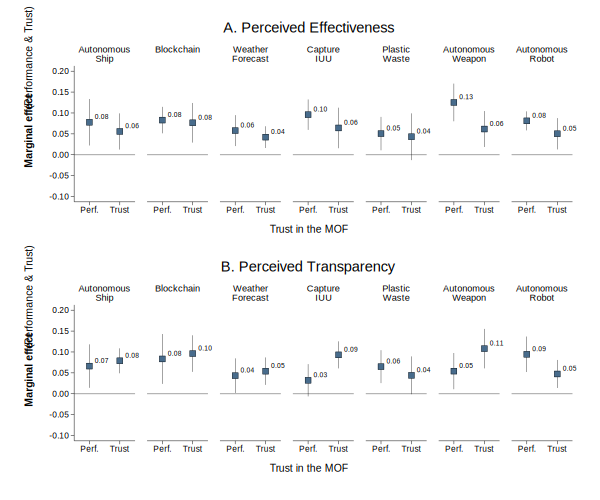


















file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\07_Performance\Fig1.gph saved

file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\07_Performance\Fig1.jpg written in JPEG format


In [9]:
loc title1 `""Booster" "Uptake""'
loc title2 `""Vaccine" "Intent""'
loc title3 `""Autonomous" "Ship""'
loc title4 `""Blockchain" " ""'
loc title5 `""Weather" "Forecast""'
loc title6 `""Capture" "IUU""'
loc title7 `""Plastic" "Waste""'
loc title8 `""Autonomous" "Weapon""'
loc title9 `""Autonomous" "Robot""'
loc yrange -0.1(0.05)0.2

loc x TR_EFFC
qui coefplot (matrix(`x'3[,1]), ci((2 3))), bylabel(`title3') || ///
             (matrix(`x'4[,1]), ci((2 3))), bylabel(`title4') || ///
             (matrix(`x'5[,1]), ci((2 3))), bylabel(`title5') || ///
             (matrix(`x'6[,1]), ci((2 3))), bylabel(`title6') || ///
             (matrix(`x'7[,1]), ci((2 3))), bylabel(`title7') || ///
             (matrix(`x'8[,1]), ci((2 3))), bylabel(`title8') || ///
             (matrix(`x'9[,1]), ci((2 3))), bylabel(`title9') || ///
           , coeflabels(r1="Perf." r2="Trust", wrap(30)) ///
             byopts(title("A. Perceived Effectiveness") row(1)) ///
             xtitle(Trust in the MOF, margin(small)) ytitle({bf:Marginal effect} (Performance & Trust), margin(small)) ///
             xlabel(, nogrid) ylabel(`yrange') ///
             yline(0, lcolor(gray) lwidth(medium)) ///
             plotregion(lwidth(thin) lpattern(solid)) ///
             msize(large) mlwidth(vthin) msymbol(S) mfcolor(navy*0.8) mlcolor(black) ///
             ciopts(recast(rspike) lcolor(black) lwidth(vthin)) mlabel format(%9.2f) mlabcolor(black) mlabposition(2) mlabgap(*2) ///
             graphregion(fcolor(white) color(white) icolor(white) margin(small)) vertical ///
             legend(position(7) rowgap(0.5)) ///
             name(g1, replace)
loc x TR_TRAN
qui coefplot (matrix(`x'3[,1]), ci((2 3))), bylabel(`title3') || ///
             (matrix(`x'4[,1]), ci((2 3))), bylabel(`title4') || ///
             (matrix(`x'5[,1]), ci((2 3))), bylabel(`title5') || ///
             (matrix(`x'6[,1]), ci((2 3))), bylabel(`title6') || ///
             (matrix(`x'7[,1]), ci((2 3))), bylabel(`title7') || ///
             (matrix(`x'8[,1]), ci((2 3))), bylabel(`title8') || ///
             (matrix(`x'9[,1]), ci((2 3))), bylabel(`title9') || ///
           , coeflabels(r1="Perf." r2="Trust", wrap(30)) ///
             byopts(title("B. Perceived Transparency") row(1)) ///
             xtitle(Trust in the MOF, margin(small)) ytitle({bf:Marginal effect} (Performance & Trust), margin(small)) ///
             xlabel(, nogrid) ylabel(`yrange') ///
             yline(0, lcolor(gray) lwidth(medium)) ///
             plotregion(lwidth(thin) lpattern(solid)) ///
             msize(large) mlwidth(vthin) msymbol(S) mfcolor(navy*0.8) mlcolor(black) ///
             ciopts(recast(rspike) lcolor(black) lwidth(vthin)) mlabel format(%9.2f) mlabcolor(black) mlabposition(2) mlabgap(*2) ///
             graphregion(fcolor(white) color(white) icolor(white) margin(small)) vertical ///
             legend(position(7) rowgap(0.5)) ///
             name(g2, replace)
             
graph combine g1 g2, ///
        b1("") ///
        l1("") cols(1) ///
        xsize(12) ysize(10) iscale(*0.8)
graph save "$outputs7\Fig1.gph", replace
graph export "$outputs7\Fig1.jpg", replace

### Performance

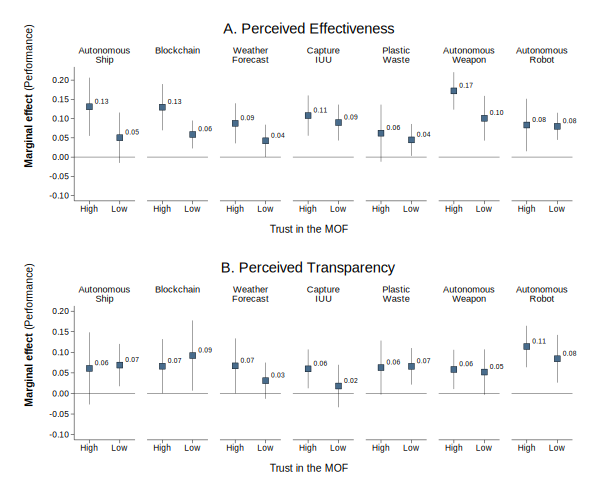


















file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\07_Performance\Fig2.gph saved

file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\07_Performance\Fig2.jpg written in JPEG format


In [11]:
loc title1 `""Booster" "Uptake""'
loc title2 `""Vaccine" "Intent""'
loc title3 `""Autonomous" "Ship""'
loc title4 `""Blockchain" " ""'
loc title5 `""Weather" "Forecast""'
loc title6 `""Capture" "IUU""'
loc title7 `""Plastic" "Waste""'
loc title8 `""Autonomous" "Weapon""'
loc title9 `""Autonomous" "Robot""'
loc yrange -0.1(0.05)0.2

loc x EFFC
qui coefplot (matrix(`x'3[,1]), ci((2 3))), bylabel(`title3') || ///
             (matrix(`x'4[,1]), ci((2 3))), bylabel(`title4') || ///
             (matrix(`x'5[,1]), ci((2 3))), bylabel(`title5') || ///
             (matrix(`x'6[,1]), ci((2 3))), bylabel(`title6') || ///
             (matrix(`x'7[,1]), ci((2 3))), bylabel(`title7') || ///
             (matrix(`x'8[,1]), ci((2 3))), bylabel(`title8') || ///
             (matrix(`x'9[,1]), ci((2 3))), bylabel(`title9') || ///
           , coeflabels(r1="High" r2="Low", wrap(30)) ///
             byopts(title("A. Perceived Effectiveness") row(1)) ///
             xtitle(Trust in the MOF, margin(small)) ytitle({bf:Marginal effect} (Performance), margin(small)) ///
             xlabel(, nogrid) ylabel(`yrange') ///
             yline(0, lcolor(gray) lwidth(medium)) ///
             plotregion(lwidth(thin) lpattern(solid)) ///
             msize(large) mlwidth(vthin) msymbol(S) mfcolor(navy*0.8) mlcolor(black) ///
             ciopts(recast(rspike) lcolor(black) lwidth(vthin)) mlabel format(%9.2f) mlabcolor(black) mlabposition(2) mlabgap(*2) ///
             graphregion(fcolor(white) color(white) icolor(white) margin(small)) vertical ///
             legend(position(7) rowgap(0.5)) ///
             name(g1, replace)
loc x TRAN
qui coefplot (matrix(`x'3[,1]), ci((2 3))), bylabel(`title3') || ///
             (matrix(`x'4[,1]), ci((2 3))), bylabel(`title4') || ///
             (matrix(`x'5[,1]), ci((2 3))), bylabel(`title5') || ///
             (matrix(`x'6[,1]), ci((2 3))), bylabel(`title6') || ///
             (matrix(`x'7[,1]), ci((2 3))), bylabel(`title7') || ///
             (matrix(`x'8[,1]), ci((2 3))), bylabel(`title8') || ///
             (matrix(`x'9[,1]), ci((2 3))), bylabel(`title9') || ///
           , coeflabels(r1="High" r2="Low", wrap(30)) ///
             byopts(title("B. Perceived Transparency") row(1)) ///
             xtitle(Trust in the MOF, margin(small)) ytitle({bf:Marginal effect} (Performance), margin(small)) ///
             xlabel(, nogrid) ylabel(`yrange') ///
             yline(0, lcolor(gray) lwidth(medium)) ///
             plotregion(lwidth(thin) lpattern(solid)) ///
             msize(large) mlwidth(vthin) msymbol(S) mfcolor(navy*0.8) mlcolor(black) ///
             ciopts(recast(rspike) lcolor(black) lwidth(vthin)) mlabel format(%9.2f) mlabcolor(black) mlabposition(2) mlabgap(*2) ///
             graphregion(fcolor(white) color(white) icolor(white) margin(small)) vertical ///
             legend(position(7) rowgap(0.5)) ///
             name(g2, replace)
             
graph combine g1 g2, ///
        b1("") ///
        l1("") cols(1) ///
        xsize(12) ysize(10) iscale(*0.8)
graph save "$outputs7\Fig2.gph", replace
graph export "$outputs7\Fig2.jpg", replace

## Appendix 8 & 9

In [3]:
/*----- Prep -----*/
use "_Merged", clear
svyset [pweight=weight], strata(EDU)

gen TR = TR_KDCA
replace TR = TR_MOF if DATA=="Marine"
replace PF_EFFC = PF_EFFC_MOF if DATA=="Marine"
replace PF_EQUI = PF_EQUI_MOF if DATA=="Marine"
replace PF_TRAN = PF_TRAN_MOF if DATA=="Marine"

loc perf EFFC TRAN
loc title1 "A. Vaccine Uptake"
loc title2 "B. Willingness to Get Additional Shot"

forvalues i = 1(1)9 {
    matrix TR_EFFC`i' = J(2, 4, .)
    matrix TR_TRAN`i' = J(2, 4, .)
    matrix EFFC`i' = J(2, 4, .)
    matrix TRAN`i' = J(2, 4, .)
}

/*----- Vaccine -----*/
loc outcomes VAX3 VAX_ADD
loc controls i.IDEOLOGY i.COVID_EXGG i.INFECTED i.FEMALE i.AGE i.EDU i.MS i.UNEMPLOYED i.REL i.INCOME i.WAVE
loc i = 0
foreach y in `outcomes' {
    loc i = `i' + 1
    foreach x in `perf' {
        eststo `x'`i': qui logit `y' i.PF_`x'##i.TR `controls' i.prvc [pweight=weight] if DATA=="Vaccine"
        eststo mfx_`x'_`i': qui margins TR, dydx(PF_`x')
        mat li r(table)
        matrix `x'`i'[1,1] = r(table)[1,4], r(table)[5,4], r(table)[6,4], r(table)[4,4] // Figure 2A. Effects of performance in high trust
        matrix `x'`i'[2,1] = r(table)[1,3], r(table)[5,3], r(table)[6,3], r(table)[4,3] // Figure 2A. Effects of performance in low trust
        eststo mfx_TR_`x'_`i'_PF: qui margins, dydx(PF_`x')
        matrix TR_`x'`i'[1,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2], r(table)[4,2] // Figure 1A. Effects of Performance
        eststo mfx_TR_`x'_`i'_TR: qui margins, dydx(TR)
        matrix TR_`x'`i'[2,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2], r(table)[4,2] // Figure 1A. Effects of Trust
        di "`x'" `i'
    }
}

/*----- Marine -----*/
loc outcomes auto_ship blockchain forecast cap_illegal iden_plastic auto_weapon auto_robot
loc controls i.IDEOLOGY i.FEMALE i.AGE i.EDU i.MS i.UNEMPLOYED i.REL i.INCOME
foreach y in `outcomes' {
    loc i = `i' + 1
    foreach x in `perf' {        
        eststo `x'`i': qui logit `y' i.PF_`x'##i.TR `controls' i.prvc [pweight=weight] if DATA=="Marine"
        eststo mfx_`x'_`i': qui margins TR, dydx(PF_`x')
        matrix `x'`i'[1,1] = r(table)[1,4], r(table)[5,4], r(table)[6,4], r(table)[4,4] // Figure 2B. Effects of performance in high trust
        matrix `x'`i'[2,1] = r(table)[1,3], r(table)[5,3], r(table)[6,3], r(table)[4,3] // Figure 2B. Effects of performance in low trust
        eststo mfx_TR_`x'_`i'_PF: qui margins, dydx(PF_`x')
        matrix TR_`x'`i'[1,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2], r(table)[4,2] // Figure 1B. Effects of Performance
        eststo mfx_TR_`x'_`i'_TR: qui margins, dydx(TR)
        matrix TR_`x'`i'[2,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2], r(table)[4,2] // Figure 1B. Effects of Trust
        di "`x'" `i'
    }
}




Sampling weights: weight
             VCE: linearized
     Single unit: missing
        Strata 1: EDU
 Sampling unit 1: <observations>
           FPC 1: <zero>

(2,000 missing values generated)

(2,000 real changes made)

(2,000 real changes made)

(2,000 real changes made)

(2,000 real changes made)









r(table)[9,4]
         0b.PF_EFFC:  0b.PF_EFFC:   1.PF_EFFC:   1.PF_EFFC:
                 0o.          1o.           0.           1.
                 TR           TR           TR           TR
     b            0            0    .05464334    .03995426
    se            .            .    .02859256    .01934599
     z            .            .    1.9111036    2.0652474
pvalue            .            .    .05599126     .0388996
    ll            .            .   -.00139704    .00203681
    ul            .            .    .11068372    .07787172
    df            .            .            .            .
  crit     1.959964     1.959964     1.959964     1.959964
 eform            0  

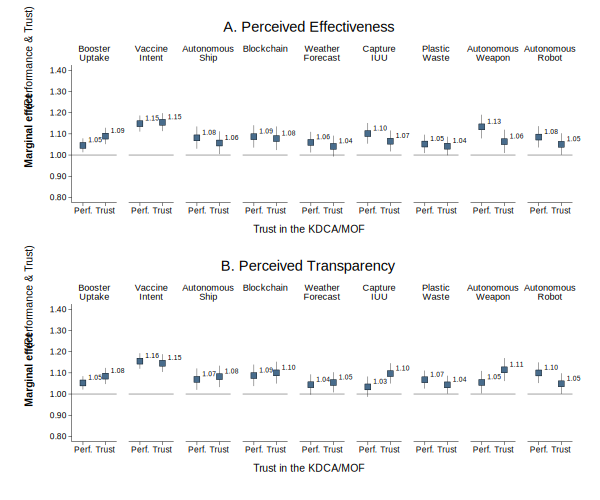


















file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\07_Performance\Appendix8.gph saved

file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\07_Performance\Appendix8.jpg written in JPEG format


In [9]:
loc title1 `""Booster" "Uptake""'
loc title2 `""Vaccine" "Intent""'
loc title3 `""Autonomous" "Ship""'
loc title4 `""Blockchain" " ""'
loc title5 `""Weather" "Forecast""'
loc title6 `""Capture" "IUU""'
loc title7 `""Plastic" "Waste""'
loc title8 `""Autonomous" "Weapon""'
loc title9 `""Autonomous" "Robot""'
loc yrange 0.8(0.1)1.4

loc x TR_EFFC
qui coefplot (matrix(`x'1[,1]), ci((2 3))), bylabel(`title1') || ///
             (matrix(`x'2[,1]), ci((2 3))), bylabel(`title2') || ///
             (matrix(`x'3[,1]), ci((2 3))), bylabel(`title3') || ///
             (matrix(`x'4[,1]), ci((2 3))), bylabel(`title4') || ///
             (matrix(`x'5[,1]), ci((2 3))), bylabel(`title5') || ///
             (matrix(`x'6[,1]), ci((2 3))), bylabel(`title6') || ///
             (matrix(`x'7[,1]), ci((2 3))), bylabel(`title7') || ///
             (matrix(`x'8[,1]), ci((2 3))), bylabel(`title8') || ///
             (matrix(`x'9[,1]), ci((2 3))), bylabel(`title9') || ///
           , eform coeflabels(r1="Perf." r2="Trust", wrap(30)) ///
             byopts(title("A. Perceived Effectiveness") row(1)) ///
             xtitle(Trust in the KDCA/MOF, margin(small)) ytitle({bf:Marginal effect} (Performance & Trust), margin(small)) ///
             xlabel(, nogrid) ylabel(`yrange') ///
             yline(1, lcolor(gray) lwidth(medium)) ///
             plotregion(lwidth(thin) lpattern(solid)) ///
             msize(large) mlwidth(vthin) msymbol(S) mfcolor(navy*0.8) mlcolor(black) ///
             ciopts(recast(rspike) lcolor(black) lwidth(vthin)) mlabel format(%9.2f) mlabcolor(black) mlabposition(2) mlabgap(*2) ///
             graphregion(fcolor(white) color(white) icolor(white) margin(small)) vertical ///
             legend(position(7) rowgap(0.5)) ///
             name(g1, replace)
loc x TR_TRAN
qui coefplot (matrix(`x'1[,1]), ci((2 3))), bylabel(`title1') || ///
             (matrix(`x'2[,1]), ci((2 3))), bylabel(`title2') || ///
             (matrix(`x'3[,1]), ci((2 3))), bylabel(`title3') || ///
             (matrix(`x'4[,1]), ci((2 3))), bylabel(`title4') || ///
             (matrix(`x'5[,1]), ci((2 3))), bylabel(`title5') || ///
             (matrix(`x'6[,1]), ci((2 3))), bylabel(`title6') || ///
             (matrix(`x'7[,1]), ci((2 3))), bylabel(`title7') || ///
             (matrix(`x'8[,1]), ci((2 3))), bylabel(`title8') || ///
             (matrix(`x'9[,1]), ci((2 3))), bylabel(`title9') || ///
           , eform coeflabels(r1="Perf." r2="Trust", wrap(30)) ///
             byopts(title("B. Perceived Transparency") row(1)) ///
             xtitle(Trust in the KDCA/MOF, margin(small)) ytitle({bf:Marginal effect} (Performance & Trust), margin(small)) ///
             xlabel(, nogrid) ylabel(`yrange') ///
             yline(1, lcolor(gray) lwidth(medium)) ///
             plotregion(lwidth(thin) lpattern(solid)) ///
             msize(large) mlwidth(vthin) msymbol(S) mfcolor(navy*0.8) mlcolor(black) ///
             ciopts(recast(rspike) lcolor(black) lwidth(vthin)) mlabel format(%9.2f) mlabcolor(black) mlabposition(2) mlabgap(*2) ///
             graphregion(fcolor(white) color(white) icolor(white) margin(small)) vertical ///
             legend(position(7) rowgap(0.5)) ///
             name(g2, replace)
             
graph combine g1 g2, ///
        b1("") ///
        l1("") cols(1) ///
        xsize(12) ysize(10) iscale(*0.8)
graph save "$outputs7\Appendix8.gph", replace
graph export "$outputs7\Appendix8.jpg", replace

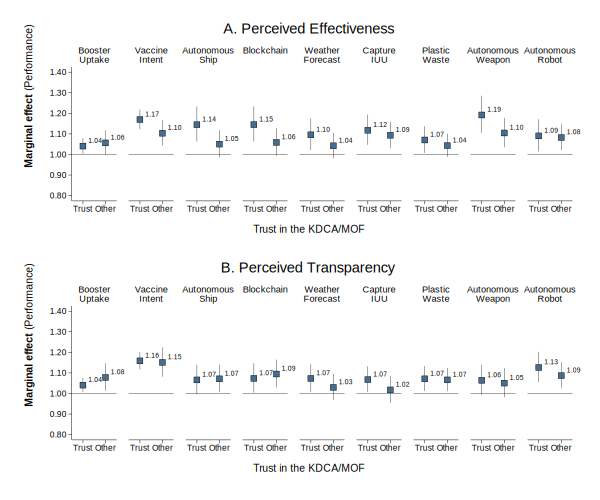


















file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\07_Performance\Appendix9.gph saved

file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\07_Performance\Appendix9.jpg written in JPEG format


In [8]:
loc title1 `""Booster" "Uptake""'
loc title2 `""Vaccine" "Intent""'
loc title3 `""Autonomous" "Ship""'
loc title4 `""Blockchain" " ""'
loc title5 `""Weather" "Forecast""'
loc title6 `""Capture" "IUU""'
loc title7 `""Plastic" "Waste""'
loc title8 `""Autonomous" "Weapon""'
loc title9 `""Autonomous" "Robot""'
loc yrange 0.8(0.1)1.4

loc x EFFC
qui coefplot (matrix(`x'1[,1]), ci((2 3))), bylabel(`title1') || ///
             (matrix(`x'2[,1]), ci((2 3))), bylabel(`title2') || ///
             (matrix(`x'3[,1]), ci((2 3))), bylabel(`title3') || ///
             (matrix(`x'4[,1]), ci((2 3))), bylabel(`title4') || ///
             (matrix(`x'5[,1]), ci((2 3))), bylabel(`title5') || ///
             (matrix(`x'6[,1]), ci((2 3))), bylabel(`title6') || ///
             (matrix(`x'7[,1]), ci((2 3))), bylabel(`title7') || ///
             (matrix(`x'8[,1]), ci((2 3))), bylabel(`title8') || ///
             (matrix(`x'9[,1]), ci((2 3))), bylabel(`title9') || ///
           , eform coeflabels(r1="Trust" r2="Other", wrap(30)) ///
             byopts(title("A. Perceived Effectiveness") row(1)) ///
             xtitle(Trust in the KDCA/MOF, margin(small)) ytitle({bf:Marginal effect} (Performance), margin(small)) ///
             xlabel(, nogrid) ylabel(`yrange') ///
             yline(1, lcolor(gray) lwidth(medium)) ///
             plotregion(lwidth(thin) lpattern(solid)) ///
             msize(large) mlwidth(vthin) msymbol(S) mfcolor(navy*0.8) mlcolor(black) ///
             ciopts(recast(rspike) lcolor(black) lwidth(vthin)) mlabel format(%9.2f) mlabcolor(black) mlabposition(2) mlabgap(*2) ///
             graphregion(fcolor(white) color(white) icolor(white) margin(small)) vertical ///
             legend(position(7) rowgap(0.5)) ///
             name(g1, replace)
loc x TRAN
qui coefplot (matrix(`x'1[,1]), ci((2 3))), bylabel(`title1') || ///
             (matrix(`x'2[,1]), ci((2 3))), bylabel(`title2') || ///
             (matrix(`x'3[,1]), ci((2 3))), bylabel(`title3') || ///
             (matrix(`x'4[,1]), ci((2 3))), bylabel(`title4') || ///
             (matrix(`x'5[,1]), ci((2 3))), bylabel(`title5') || ///
             (matrix(`x'6[,1]), ci((2 3))), bylabel(`title6') || ///
             (matrix(`x'7[,1]), ci((2 3))), bylabel(`title7') || ///
             (matrix(`x'8[,1]), ci((2 3))), bylabel(`title8') || ///
             (matrix(`x'9[,1]), ci((2 3))), bylabel(`title9') || ///
           , eform coeflabels(r1="Trust" r2="Other", wrap(30)) ///
             byopts(title("B. Perceived Transparency") row(1)) ///
             xtitle(Trust in the KDCA/MOF, margin(small)) ytitle({bf:Marginal effect} (Performance), margin(small)) ///
             xlabel(, nogrid) ylabel(`yrange') ///
             yline(1, lcolor(gray) lwidth(medium)) ///
             plotregion(lwidth(thin) lpattern(solid)) ///
             msize(large) mlwidth(vthin) msymbol(S) mfcolor(navy*0.8) mlcolor(black) ///
             ciopts(recast(rspike) lcolor(black) lwidth(vthin)) mlabel format(%9.2f) mlabcolor(black) mlabposition(2) mlabgap(*2) ///
             graphregion(fcolor(white) color(white) icolor(white) margin(small)) vertical ///
             legend(position(7) rowgap(0.5)) ///
             name(g2, replace)
             
graph combine g1 g2, ///
        b1("") ///
        l1("") cols(1) ///
        xsize(12) ysize(10) iscale(*0.8)
graph save "$outputs7\Appendix9.gph", replace
graph export "$outputs7\Appendix9.jpg", replace

## Figure 2 & 4 (Appendix 5 & 7)

In [ ]:
/*----- Vaccine -----*/
use "_Merged", clear
keep if DATA=="Vaccine"
gen TR = TR_KDCA
capt drop JOB
gen JOB = JOB2

gen CatEffec = 0
replace CatEffec = 1 if TR==1 & PF_EFFC==0
replace CatEffec = 2 if TR==0 & PF_EFFC==1
replace CatEffec = 3 if TR==0 & PF_EFFC==0
label define CatEffec 0 "TrGov/Effec" 1 "TrGov/Ineffec" 2 "MisGov/Effec" 3 "MisGov/Ineffec"
label val CatEffec CatEffec

gen CatTran = 0
replace CatTran = 1 if TR==1 & PF_TRAN==0
replace CatTran = 2 if TR==0 & PF_TRAN==1
replace CatTran = 3 if TR==0 & PF_TRAN==0
label define CatTran 0 "TrGov/Tran" 1 "TrGov/Opaq" 2 "MisGov/Tran" 3 "MisGov/Opaq"
label val CatTran CatTran

loc controls i.IDEOLOGY i.COVID_EXGG i.INFECTED i.FEMALE i.AGE i.EDU i.MS i.UNEMPLOYED i.REL i.INCOME i.WAVE
eststo lm1_1: qui xtreg VAX3 i.CatEffec `controls', fe vce(cluster prvc)
eststo lm2_1: qui xtreg VAX3 i.CatTran `controls', fe vce(cluster prvc)
eststo lm1_2: qui xtreg VAX_ADD i.CatEffec `controls', fe vce(cluster prvc)
eststo lm2_2: qui xtreg VAX_ADD i.CatTran `controls', fe vce(cluster prvc)

/*----- Marine Policy -----*/
use "_Merged", clear
keep if DATA=="Marine"
capt drop PF_EFFC PF_EQUI PF_TRAN
gen TR = TR_MOF
gen PF_EFFC = PF_EFFC_MOF
gen PF_EQUI = PF_EQUI_MOF
gen PF_TRAN = PF_TRAN_MOF

gen CatEffec = 0
replace CatEffec = 1 if TR==1 & PF_EFFC==0
replace CatEffec = 2 if TR==0 & PF_EFFC==1
replace CatEffec = 3 if TR==0 & PF_EFFC==0
label define CatEffec 0 "TrGov/Effec" 1 "TrGov/Ineffec" 2 "MisGov/Effec" 3 "MisGov/Ineffec"
label val CatEffec CatEffec

gen CatTran = 0
replace CatTran = 1 if TR==1 & PF_TRAN==0
replace CatTran = 2 if TR==0 & PF_TRAN==1
replace CatTran = 3 if TR==0 & PF_TRAN==0
label define CatTran 0 "TrGov/Tran" 1 "TrGov/Opaq" 2 "MisGov/Tran" 3 "MisGov/Opaq"
label val CatTran CatTran

loc controls i.IDEOLOGY i.FEMALE i.AGE i.EDU i.MS i.UNEMPLOYED i.REL i.INCOME
eststo lm3_1: qui xtreg auto_ship i.CatEffec `controls', fe vce(cluster prvc)
eststo lm4_1: qui xtreg blockchain i.CatEffec `controls', fe vce(cluster prvc)
eststo lm5_1: qui xtreg forecast i.CatEffec `controls', fe vce(cluster prvc)
eststo lm6_1: qui xtreg cap_illegal i.CatEffec `controls', fe vce(cluster prvc)
eststo lm7_1: qui xtreg iden_plastic i.CatEffec `controls', fe vce(cluster prvc)
eststo lm8_1: qui xtreg auto_weapon i.CatEffec `controls', fe vce(cluster prvc)
eststo lm9_1: qui xtreg auto_robot i.CatEffec `controls', fe vce(cluster prvc)

eststo lm3_2: qui xtreg auto_ship i.CatTran `controls', fe vce(cluster prvc)
eststo lm4_2: qui xtreg blockchain i.CatTran `controls', fe vce(cluster prvc)
eststo lm5_2: qui xtreg forecast i.CatTran `controls', fe vce(cluster prvc)
eststo lm6_2: qui xtreg cap_illegal i.CatTran `controls', fe vce(cluster prvc)
eststo lm7_2: qui xtreg iden_plastic i.CatTran `controls', fe vce(cluster prvc)
eststo lm8_2: qui xtreg auto_weapon i.CatTran `controls', fe vce(cluster prvc)
eststo lm9_2: qui xtreg auto_robot i.CatTran `controls', fe vce(cluster prvc)

esttab lm1_1 lm2_1 lm3_1 lm4_1 lm5_1 lm6_1 lm7_1 lm8_1 lm9_1 ///
    using "$outputs7\Appendix5_1_Effectiveness.rtf" ///
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Appendix 5: Subgroup - Effectiveness) nogaps ///
    varwidth(18) modelwidth(15) nobase label
esttab lm1_2 lm2_2 lm3_2 lm4_2 lm5_2 lm6_2 lm7_2 lm8_2 lm9_2 ///
    using "$outputs7\Appendix7_2_Transparency.rtf" ///
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Appendix 7: Subgroup - Transparency) nogaps ///
    varwidth(18) modelwidth(15) nobase label

## Analysis 20230318

In [8]:
/*----- Vaccine -----*/
use "_Merged", clear
keep if DATA=="Vaccine"
gen TR = TR_KDCA

loc controls i.IDEOLOGY i.COVID_EXGG i.INFECTED i.FEMALE i.AGE i.EDU i.MS i.UNEMPLOYED i.REL i.INCOME i.WAVE
loc title1 "A. Vaccine Uptake"
loc title2 "B. Willingness to Get Additional Shot"

eststo lm1: qui xtreg VAX3 i.PF_EFFC i.PF_TRAN i.TR `controls', fe vce(cluster prvc)
eststo lm2: qui xtreg VAX_ADD i.PF_EFFC i.PF_TRAN i.TR `controls', fe vce(cluster prvc)

/*----- Marine Policy -----*/
use "_Merged", clear
keep if DATA=="Marine"
gen TR = TR_MOF
gen PF_EFFC = PF_EFFC_MOF
gen PF_EQUI = PF_EQUI_MOF
gen PF_TRAN = PF_TRAN_MOF

loc controls i.IDEOLOGY i.FEMALE i.AGE i.EDU i.MS i.UNEMPLOYED i.REL i.INCOME
eststo lm3: qui xtreg auto_ship i.PF_EFFC i.PF_TRAN i.TR `controls', fe vce(cluster prvc)
eststo lm4: qui xtreg blockchain i.PF_EFFC i.PF_TRAN i.TR `controls', fe vce(cluster prvc)
eststo lm5: qui xtreg forecast i.PF_EFFC i.PF_TRAN i.TR `controls', fe vce(cluster prvc)
eststo lm6: qui xtreg cap_illegal i.PF_EFFC i.PF_TRAN i.TR `controls', fe vce(cluster prvc)
eststo lm7: qui xtreg iden_plastic i.PF_EFFC i.PF_TRAN i.TR `controls', fe vce(cluster prvc)
eststo lm8: qui xtreg auto_weapon i.PF_EFFC i.PF_TRAN i.TR `controls', fe vce(cluster prvc)
eststo lm9: qui xtreg auto_robot i.PF_EFFC i.PF_TRAN i.TR `controls', fe vce(cluster prvc)

esttab lm1 lm2 lm3 lm4 lm5 lm6 lm7 lm8 lm9 ///
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Figure 1) nogaps ///
    varwidth(18) modelwidth(15) nobase label
esttab lm1 lm2 lm3 lm4 lm5 lm6 lm7 lm8 lm9 ///
    using "$outputs7\Appendix_.rtf" ///
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Analysis 1) nogaps ///
    varwidth(18) modelwidth(15) nobase label



(43 missing values generated)


(43 missing values generated)



















Figure 1
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                               (1)                (2)                (3)                (4)                (5)                (6)                (7)                (8)   
                              VAX3    Autonomous ship         Blockchain    Weather forec~t    Capture illegal    Identify plas~c    Autonomous we~n    Autonomous ro~t   
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
PF_EFFC=1                   0.0168             0.0512             0.0686**           0.0336             0.1008***          0.0376             0.1142***          0.0592** 
                      [-0.02,0.05]       [-0.01,0.11]

In [38]:
use "HBK_W1_W4_clean", clear

gen TR = TR_KDCA
capt drop JOB
gen JOB = JOB2

gen CatEffec = 0
replace CatEffec = 1 if TR==1 & PF_EFFC==0
replace CatEffec = 2 if TR==0 & PF_EFFC==1
replace CatEffec = 3 if TR==0 & PF_EFFC==0
label define CatEffec 0 "TrGov/Effec" 1 "TrGov/Ineffec" 2 "MisGov/Effec" 3 "MisGov/Ineffec"
label val CatEffec CatEffec

gen CatEqui = 0
replace CatEqui = 1 if TR==1 & PF_EQUI==0
replace CatEqui = 2 if TR==0 & PF_EQUI==1
replace CatEqui = 3 if TR==0 & PF_EQUI==0
label define CatEqui 0 "TrGov/Equi" 1 "TrGov/Inequi" 2 "MisGov/Equi" 3 "MisGov/Inequi"
label val CatEqui CatEqui

gen CatTran = 0
replace CatTran = 1 if TR==1 & PF_TRAN==0
replace CatTran = 2 if TR==0 & PF_TRAN==1
replace CatTran = 3 if TR==0 & PF_TRAN==0
label define CatTran 0 "TrGov/Tran" 1 "TrGov/Opaq" 2 "MisGov/Tran" 3 "MisGov/Opaq"
label val CatTran CatTran

loc controls i.IDEOLOGY i.COVID_EXGG i.INFECTED i.FEMALE i.AGE i.EDU i.MS i.JOB i.REL i.INCOME i.WAVE
eststo lm1_1: qui xtreg VAX3 i.CatEffec `controls', fe vce(cluster prvc)
eststo lm1_2: qui xtreg VAX3 i.CatEqui `controls', fe vce(cluster prvc)
eststo lm1_3: qui xtreg VAX3 i.CatTran `controls', fe vce(cluster prvc)

/*----- Marine Policy -----*/
use "KIOST_clean", clear
gen TR = TR_MOF
gen PF_EFFC = PF_EFFC_MOF
gen PF_EQUI = PF_EQUI_MOF
gen PF_TRAN = PF_TRAN_MOF

gen CatEffec = 0
replace CatEffec = 1 if TR==1 & PF_EFFC==0
replace CatEffec = 2 if TR==0 & PF_EFFC==1
replace CatEffec = 3 if TR==0 & PF_EFFC==0
label define CatEffec 0 "TrGov/Effec" 1 "TrGov/Ineffec" 2 "MisGov/Effec" 3 "MisGov/Ineffec"
label val CatEffec CatEffec

gen CatEqui = 0
replace CatEqui = 1 if TR==1 & PF_EQUI==0
replace CatEqui = 2 if TR==0 & PF_EQUI==1
replace CatEqui = 3 if TR==0 & PF_EQUI==0
label define CatEqui 0 "TrGov/Equi" 1 "TrGov/Inequi" 2 "MisGov/Equi" 3 "MisGov/Inequi"
label val CatEqui CatEqui

gen CatTran = 0
replace CatTran = 1 if TR==1 & PF_TRAN==0
replace CatTran = 2 if TR==0 & PF_TRAN==1
replace CatTran = 3 if TR==0 & PF_TRAN==0
label define CatTran 0 "TrGov/Tran" 1 "TrGov/Opaq" 2 "MisGov/Tran" 3 "MisGov/Opaq"
label val CatTran CatTran

loc controls i.IDEOLOGY i.FEMALE i.AGE i.EDU i.MS i.JOB i.REL i.INCOME
eststo lm2_1: qui xtreg auto_ship i.CatEffec `controls', fe vce(cluster prvc)
eststo lm3_1: qui xtreg blockchain i.CatEffec `controls', fe vce(cluster prvc)
eststo lm4_1: qui xtreg forecast i.CatEffec `controls', fe vce(cluster prvc)
eststo lm5_1: qui xtreg cap_illegal i.CatEffec `controls', fe vce(cluster prvc)
eststo lm6_1: qui xtreg iden_plastic i.CatEffec `controls', fe vce(cluster prvc)
eststo lm7_1: qui xtreg auto_weapon i.CatEffec `controls', fe vce(cluster prvc)
eststo lm8_1: qui xtreg auto_robot i.CatEffec `controls', fe vce(cluster prvc)

eststo lm2_2: qui xtreg auto_ship i.CatEqui `controls', fe vce(cluster prvc)
eststo lm3_2: qui xtreg blockchain i.CatEqui `controls', fe vce(cluster prvc)
eststo lm4_2: qui xtreg forecast i.CatEqui `controls', fe vce(cluster prvc)
eststo lm5_2: qui xtreg cap_illegal i.CatEqui `controls', fe vce(cluster prvc)
eststo lm6_2: qui xtreg iden_plastic i.CatEqui `controls', fe vce(cluster prvc)
eststo lm7_2: qui xtreg auto_weapon i.CatEqui `controls', fe vce(cluster prvc)
eststo lm8_2: qui xtreg auto_robot i.CatEqui `controls', fe vce(cluster prvc)

eststo lm2_3: qui xtreg auto_ship i.CatTran `controls', fe vce(cluster prvc)
eststo lm3_3: qui xtreg blockchain i.CatTran `controls', fe vce(cluster prvc)
eststo lm4_3: qui xtreg forecast i.CatTran `controls', fe vce(cluster prvc)
eststo lm5_3: qui xtreg cap_illegal i.CatTran `controls', fe vce(cluster prvc)
eststo lm6_3: qui xtreg iden_plastic i.CatTran `controls', fe vce(cluster prvc)
eststo lm7_3: qui xtreg auto_weapon i.CatTran `controls', fe vce(cluster prvc)
eststo lm8_3: qui xtreg auto_robot i.CatTran `controls', fe vce(cluster prvc)

esttab lm1 lm2 lm3 lm4 lm5 lm6 lm7 lm8 ///
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Analysis 2_1: Subgroup - Effectiveness) nogaps ///
    varwidth(18) modelwidth(15) nobase label
esttab lm1_1 lm2_1 lm3_1 lm4_1 lm5_1 lm6_1 lm7_1 lm8_1 ///
    using "$outputs7\Analysis_2_1_Effectiveness.rtf" ///
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Analysis 2_1: Subgroup - Effectiveness) nogaps ///
    varwidth(18) modelwidth(15) nobase label
esttab lm1_2 lm2_2 lm3_2 lm4_2 lm5_2 lm6_2 lm7_2 lm8_2 ///
    using "$outputs7\Analysis_2_2_Equity.rtf" ///
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Analysis 2_2: Subgroup - Equity) nogaps ///
    varwidth(18) modelwidth(15) nobase label
esttab lm1_3 lm2_3 lm3_3 lm4_3 lm5_3 lm6_3 lm7_3 lm8_3 ///
    using "$outputs7\Analysis_2_3_Transparency.rtf" ///
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Analysis 2_3: Subgroup - Transparency) nogaps ///
    varwidth(18) modelwidth(15) nobase label



(43 missing values generated)


(43 missing values generated)


(882 real changes made)

(446 real changes made)

(1,431 real changes made)




(1,132 real changes made)

(389 real changes made)

(1,488 real changes made)




(1,279 real changes made)

(345 real changes made)

(1,532 real changes made)













(218 real changes made)

(294 real changes made)

(1,028 real changes made)




(253 real changes made)

(274 real changes made)

(1,048 real changes made)




(277 real changes made)

(274 real changes made)

(1,048 real changes made)


























Analysis 2_1: Subgroup - Effectiveness
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                               (1)                (2)                (3)                (4)                (5)                (6)                (7)                (8)   
                              VAX3    

In [ ]:

eststo lm2: qui xtreg VAX3 i.PF_EQUI `controls', fe vce(cluster prvc)
eststo lm3: qui xtreg VAX3 i.CatTran `controls', fe vce(cluster prvc)

In [ ]:
use "HBK_W1_W4_clean", clear

gen TR = TR_KDCA
capt drop JOB
gen JOB = JOB2

gen CatEffec = 0
replace CatEffec = 1 if TR==1 & PF_EFFC==0
replace CatEffec = 2 if TR==0 & PF_EFFC==1
replace CatEffec = 3 if TR==0 & PF_EFFC==0
label define CatEffec 0 "TrGov/Effec" 1 "TrGov/Ineffec" 2 "MisGov/Effec" 3 "MisGov/Ineffec"
label val CatEffec CatEffec

gen CatEffi = 0
replace CatEffi = 1 if TR==1 & PF_EFFI==0
replace CatEffi = 2 if TR==0 & PF_EFFI==1
replace CatEffi = 3 if TR==0 & PF_EFFI==0
label define CatEffi 0 "TrGov/Effi" 1 "TrGov/Ineffi" 2 "MisGov/Effi" 3 "MisGov/Ineffi"
label val CatEffi CatEffi

gen CatTran = 0
replace CatTran = 1 if TR==1 & PF_TRAN==0
replace CatTran = 2 if TR==0 & PF_TRAN==1
replace CatTran = 3 if TR==0 & PF_TRAN==0
label define CatTran 0 "TrGov/Tran" 1 "TrGov/Opaq" 2 "MisGov/Tran" 3 "MisGov/Opaq"
label val CatTran CatTran

loc controls i.IDEOLOGY i.COVID_EXGG i.INFECTED i.FEMALE i.AGE i.EDU i.MS i.JOB i.REL i.INCOME i.WAVE
eststo lm1: qui xtreg VAX3 i.CatEffec `controls', fe vce(cluster prvc)

use "HBK_W1_W4_clean", clear

gen TR = TR_KDCA
capt drop JOB
gen JOB = JOB2

gen CatEffec = 0
replace CatEffec = 1 if TR==1 & PF_EFFC==0
replace CatEffec = 2 if TR==0 & PF_EFFC==1
replace CatEffec = 3 if TR==0 & PF_EFFC==0
label define CatEffec 0 "TrGov/Effec" 1 "TrGov/Ineffec" 2 "MisGov/Effec" 3 "MisGov/Ineffec"
label val CatEffec CatEffec

gen CatEqui = 0
replace CatEqui = 1 if TR==1 & PF_EQUI==0
replace CatEqui = 2 if TR==0 & PF_EQUI==1
replace CatEqui = 3 if TR==0 & PF_EQUI==0
label define CatEqui 0 "TrGov/Equi" 1 "TrGov/Inequi" 2 "MisGov/Equi" 3 "MisGov/Inequi"
label val CatEqui CatEqui

gen CatTran = 0
replace CatTran = 1 if TR==1 & PF_TRAN==0
replace CatTran = 2 if TR==0 & PF_TRAN==1
replace CatTran = 3 if TR==0 & PF_TRAN==0
label define CatTran 0 "TrGov/Tran" 1 "TrGov/Opaq" 2 "MisGov/Tran" 3 "MisGov/Opaq"
label val CatTran CatTran

loc controls i.IDEOLOGY i.COVID_EXGG i.INFECTED i.FEMALE i.AGE i.EDU i.MS i.JOB i.REL i.INCOME i.WAVE
eststo lm1: qui xtreg VAX3 i.CatEffec `controls', fe vce(cluster prvc)

/*----- Vaccine -----*/
use "KIOST_clean", clear
gen TR = TR_MOF
gen PF_EFFC = PF_EFFC_MOF
gen PF_EQUI = PF_EQUI_MOF
gen PF_TRAN = PF_TRAN_MOF

gen CatEffec = 0
replace CatEffec = 1 if TR==1 & PF_EFFC==0
replace CatEffec = 2 if TR==0 & PF_EFFC==1
replace CatEffec = 3 if TR==0 & PF_EFFC==0
label define CatEffec 0 "TrGov/Effec" 1 "TrGov/Ineffec" 2 "MisGov/Effec" 3 "MisGov/Ineffec"
label val CatEffec CatEffec

gen CatEqui = 0
replace CatEqui = 1 if TR==1 & PF_EQUI==0
replace CatEqui = 2 if TR==0 & PF_EQUI==1
replace CatEqui = 3 if TR==0 & PF_EQUI==0
label define CatEqui 0 "TrGov/Equi" 1 "TrGov/Inequi" 2 "MisGov/Equi" 3 "MisGov/Inequi"
label val CatEqui CatEqui

gen CatTran = 0
replace CatTran = 1 if TR==1 & PF_TRAN==0
replace CatTran = 2 if TR==0 & PF_TRAN==1
replace CatTran = 3 if TR==0 & PF_TRAN==0
label define CatTran 0 "TrGov/Tran" 1 "TrGov/Opaq" 2 "MisGov/Tran" 3 "MisGov/Opaq"
label val CatTran CatTran

loc controls i.IDEOLOGY i.FEMALE i.AGE i.EDU i.MS i.JOB i.REL i.INCOME
eststo lm2: qui xtreg auto_ship i.CatEffec `controls', fe vce(cluster prvc)
eststo lm3: qui xtreg blockchain i.CatEffec `controls', fe vce(cluster prvc)
eststo lm4: qui xtreg forecast i.CatEffec `controls', fe vce(cluster prvc)
eststo lm5: qui xtreg cap_illegal i.CatEffec `controls', fe vce(cluster prvc)
eststo lm6: qui xtreg iden_plastic i.CatEffec `controls', fe vce(cluster prvc)
eststo lm7: qui xtreg auto_weapon i.CatEffec `controls', fe vce(cluster prvc)
eststo lm8: qui xtreg auto_robot i.CatEffec `controls', fe vce(cluster prvc)

esttab lm1 lm2 lm3 lm4 lm5 lm6 lm7 lm8 ///
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Analysis 2_1: Subgroup - Effectiveness) nogaps ///
    varwidth(18) modelwidth(15) nobase label
esttab lm1 lm2 lm3 lm4 lm5 lm6 lm7 lm8 ///
    using "$outputs7\Analysis_2_1.rtf" ///
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Analysis 2_1: Subgroup - Effectiveness) nogaps ///
    varwidth(18) modelwidth(15) nobase label

## Figure 1

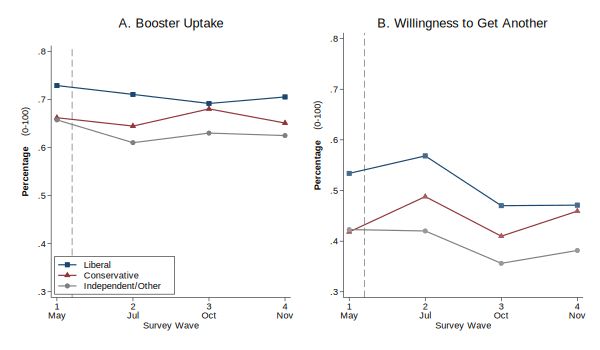

In [81]:
/* ----- Figure 1. Trends of the Outcome Variables in the Study Period ----- */
local title1 `""A. Booster Uptake" " ""'
local title2 `""B. Willingness to Get Another""'

local color1 navy
local color2 maroon
local color3 gray
local num = 0

use "HBK_W1_W4_clean", clear

*tab TR_KDCA WAVE if IDEOLOGY==0, col
*tab TR_KDCA WAVE if IDEOLOGY==1, col
*tab TR_KDCA WAVE if IDEOLOGY==0, col
*tab TR_KDCA WAVE if IDEOLOGY==1, col

loc x VAX3
collapse (mean) `x', by(IDEOLOGY WAVE)

qui tw (con `x' WAVE if IDEOLOGY == 0, lcolor(`color1') mcolor(`color1') lw(medthick) msymbol(S)) ///
       (con `x' WAVE if IDEOLOGY == 1, lcolor(`color2') mcolor(`color2') lw(medthick) msymbol(T)) ///
       (con `x' WAVE if IDEOLOGY == 2, lcolor(`color3') mcolor(`color3') lw(medthick) msymbol(O)), ///
           title(`title1') ytitle("{bf:Percentage} (0-100)", margin(small)) xtitle(Survey Wave) ///
           ylabel(0.3(0.1)0.8) xlabel(1 `""1" "May""' 2 `""2" "Jul""' 3 `""3" "Oct""' 4 `""4" "Nov""', nogrid) ///
           xline(1.2, lp(dash) lc(gray)) ///
           legend(order(1 "Liberal" 2 "Conservative" 3 "Independent/Other") position(7) size(*1) rowgap(0.3pt)) ///
           name(g1, replace)

use "HBK_W1_W4_clean", clear

loc x VAX_ADD
collapse (mean) `x', by(IDEOLOGY WAVE)

qui tw (con `x' WAVE if IDEOLOGY == 0, lcolor(`color1') mcolor(`color1'*0.8) lw(medthick) msymbol(S)) ///
       (con `x' WAVE if IDEOLOGY == 1, lcolor(`color2') mcolor(`color2'*0.8) lw(medthick) msymbol(T)) ///
       (con `x' WAVE if IDEOLOGY == 2, lcolor(`color3') mcolor(`color3'*0.8) lw(medthick) msymbol(O)), ///
           title(`title2') ytitle("{bf:Percentage} (0-100)", margin(small)) xtitle(Survey Wave) ///
           ylabel(0.3(0.1)0.8) xlabel(1 `""1" "May""' 2 `""2" "Jul""' 3 `""3" "Oct""' 4 `""4" "Nov""', nogrid) ///
           legend(off) ///
           xline(1.2, lp(dash) lc(gray)) ///
           name(g2, replace)


graph combine g1 g2, ///
    ycommon b1("") l1("") cols(3) iscale(*1) xsize(12) ysize(7)
qui graph save "$outputs7\Fig1.gph", replace
qui graph export "$outputs7\Fig1.svg", replace
qui graph export "$outputs7\Fig1.jpg", replace

## Figure 2

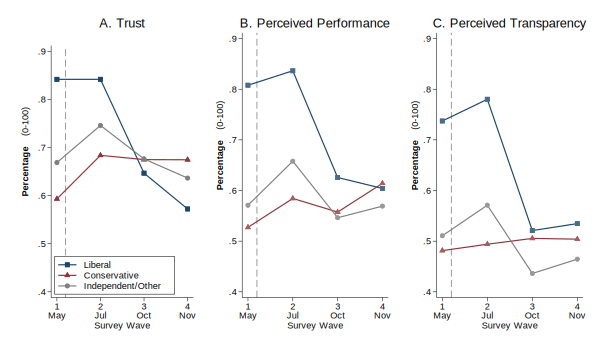

In [82]:
/* ----- Figure 1. Trends of the Outcome Variables in the Study Period ----- */
local title1 `""A. Trust" " ""'
local title2 `""B. Perceived Performance""'
local title3 `""C. Perceived Transparency""'

local color1 navy
local color2 maroon
local color3 gray
local num = 0

use "HBK_W1_W4_clean", clear
*tab TR_KDCA WAVE if IDEOLOGY==0, col
*tab TR_KDCA WAVE if IDEOLOGY==1, col
*tab TR_KDCA WAVE if IDEOLOGY==0, col
*tab TR_KDCA WAVE if IDEOLOGY==1, col

loc x TR_KDCA
collapse (mean) `x', by(IDEOLOGY WAVE)

qui tw (con `x' WAVE if IDEOLOGY == 0, lcolor(`color1') mcolor(`color1') lw(medthick) msymbol(S)) ///
       (con `x' WAVE if IDEOLOGY == 1, lcolor(`color2') mcolor(`color2') lw(medthick) msymbol(T)) ///
       (con `x' WAVE if IDEOLOGY == 2, lcolor(`color3') mcolor(`color3') lw(medthick) msymbol(O)), ///
           title(`title1') ytitle("{bf:Percentage} (0-100)", margin(small)) xtitle(Survey Wave) ///
           ylabel(0.4(0.1)0.9) xlabel(1 `""1" "May""' 2 `""2" "Jul""' 3 `""3" "Oct""' 4 `""4" "Nov""', nogrid) ///
           xline(1.2, lp(dash) lc(gray)) ///
           legend(order(1 "Liberal" 2 "Conservative" 3 "Independent/Other") position(7) size(*1) rowgap(0.3pt)) ///
           name(g1, replace)
                                      
use "HBK_W1_W4_clean", clear
loc x PF_EFFC
collapse (mean) `x', by(IDEOLOGY WAVE)

qui tw (con `x' WAVE if IDEOLOGY == 0, lcolor(`color1') mcolor(`color1'*0.8) lw(medthick) msymbol(S)) ///
       (con `x' WAVE if IDEOLOGY == 1, lcolor(`color2') mcolor(`color2'*0.8) lw(medthick) msymbol(T)) ///
       (con `x' WAVE if IDEOLOGY == 2, lcolor(`color3') mcolor(`color3'*0.8) lw(medthick) msymbol(O)), ///
           title(`title2') ytitle("{bf:Percentage} (0-100)", margin(small)) xtitle(Survey Wave) ///
           ylabel(0.4(0.1)0.9) xlabel(1 `""1" "May""' 2 `""2" "Jul""' 3 `""3" "Oct""' 4 `""4" "Nov""', nogrid) ///
           legend(off) ///
           xline(1.2, lp(dash) lc(gray)) ///
           name(g2, replace)
           
use "HBK_W1_W4_clean", clear
loc x PF_TRAN
collapse (mean) `x', by(IDEOLOGY WAVE)

qui tw (con `x' WAVE if IDEOLOGY == 0, lcolor(`color1') mcolor(`color1'*0.8) lw(medthick) msymbol(S)) ///
       (con `x' WAVE if IDEOLOGY == 1, lcolor(`color2') mcolor(`color2'*0.8) lw(medthick) msymbol(T)) ///
       (con `x' WAVE if IDEOLOGY == 2, lcolor(`color3') mcolor(`color3'*0.8) lw(medthick) msymbol(O)), ///
           title(`title3') ytitle("{bf:Percentage} (0-100)", margin(small)) xtitle(Survey Wave) ///
           ylabel(0.4(0.1)0.9) xlabel(1 `""1" "May""' 2 `""2" "Jul""' 3 `""3" "Oct""' 4 `""4" "Nov""', nogrid) ///
           legend(off) ///
           xline(1.2, lp(dash) lc(gray)) ///
           name(g3, replace)

graph combine g1 g2 g3, ///
    ycommon b1("") l1("") cols(3) iscale(*1) xsize(12) ysize(7)
qui graph save "$outputs7\Fig2.gph", replace
qui graph export "$outputs7\Fig2.svg", replace
qui graph export "$outputs7\Fig2.jpg", replace

# Anti-intellectualism in Korea

## Weighting

In [2]:
import delimited "PSweight_edu.csv", clear case(preserve)
capt drop count_sample pct_sample weight
keep if DATA=="Vaccine"
save "PSweight_edu_Anti", replace

* Vaccine survey data
use "HBK_W1_W4_clean", clear
keep if WAVE>=3

* Weighting
merge m:1 EDU using "PSweight_edu_Anti.dta"
gen pct_sample = .
replace pct_sample = count_sample/3000
gen weight = pct_pop/pct_sample
gen Pweight = totalpop / sample
drop if _merge==2

save "_Anti_int.dta", replace


(encoding automatically selected: UTF-8)
(7 vars, 6 obs)


(3 observations deleted)

file PSweight_edu_Anti.dta saved


(3,000 observations deleted)


    Result                      Number of obs
    -----------------------------------------
    Not matched                             0
    Matched                             3,000  (_merge==3)
    -----------------------------------------

(3,000 missing values generated)

(3,000 real changes made)



(0 observations deleted)

file _Anti_int.dta saved


## Descriptive Statistics

### Table 1. Weighted

In [33]:
use "_Anti_int", clear
drop if age<20
tab EDU
tab MS



(84 observations deleted)


          Education |      Freq.     Percent        Cum.
--------------------+-----------------------------------
High school or less |        638       21.88       21.88
 Associate/Bachelor |      1,901       65.19       87.07
           Graduate |        377       12.93      100.00
--------------------+-----------------------------------
              Total |      2,916      100.00


    Marital |
     Status |      Freq.     Percent        Cum.
------------+-----------------------------------
Not married |      1,331       45.64       45.64
    Married |      1,585       54.36      100.00
------------+-----------------------------------
      Total |      2,916      100.00


In [5]:
capt prog drop ctab
program ctab, eclass
    syntax varlist [if] [in]
    // Row 1: No. of Observations
    qui tab WAVE
    matrix temp = r(N)
    local c1 = temp[1,1]
    qui tab WAVE if WAVE == 3
    matrix temp = r(N)
    local c2 = temp[1,1]
    qui tab WAVE if WAVE == 4
    matrix temp = r(N)
    local c3 = temp[1,1]
    mat M = (`c1',`c2',`c3',0)
    mat rownames M = "No of Obs"
    mat colnames M = "All" "Wave 3" "Wave 4" "Chi-squared"

    local num = 0
    foreach x in `varlist'{
        local num = `num' + 1

        svy: qui mean `x'
        matrix temp = e(b)
        local m1 = temp[1,1]*100
        svy: qui mean if WAVE==3
        matrix temp = e(b)
        local m2 = temp[1,1]*100
        svy: qui mean if WAVE==4
        matrix temp = e(b)
        local m3 = temp[1,1]*100
        
        qui tab `x' WAVE, chi
        mat temp = r(p)
        local m4 = temp[1,1]

        mat temp = (`m1',`m2',`m3',`m4')
        local rowname: variable label `x'
        mat rownames temp = "`rowname'"
        mat M = M\temp
    }
    esttab matrix(M, fmt("0 2"))
    esttab matrix(M, fmt("0 2")) using "$outputs8\Table1.rtf", replace
end

In [24]:
tab INCOME WAVE, chi
di "`r(p)'"



               |         WAVE
     HH Income |         3          4 |     Total
---------------+----------------------+----------
          <₩2M |       163        153 |       316 
    ₩2M-₩3.99M |       475        481 |       956 
    ₩4M-₩5.99M |       359        352 |       711 
    ₩6M-₩7.99M |       237        243 |       480 
       >₩7.99M |       187        182 |       369 
---------------+----------------------+----------
         Total |     1,421      1,411 |     2,832 

          Pearson chi2(4) =   0.5305   Pr = 0.970

.9704671052175478


In [26]:
use "_Anti_int.dta", clear
svyset [pweight=weight], strata(EDU)
keep if VAX1==1
tab WAVE

qui tab IDEOLOGY, gen(IDEOLOGY_)
label var IDEOLOGY_1 "Liberal"
label var IDEOLOGY_2 "Independent"
label var IDEOLOGY_3 "Conservative"
qui tab AGE, gen(AGE_)
qui tab EDU, gen(EDU_)
label var EDU_1 "High school or less"
label var EDU_2 "BA"
label var EDU_3 "MA or more"
qui tab INFECTED, gen(INFECTED_)
label var INFECTED_1 "Never infected"
label var INFECTED_2 "Myself"
label var INFECTED_3 "Others"
qui tab INCOME, gen(INCOME_)
label var INCOME_1 "<₩2M"
label var INCOME_2 "₩2M-₩3.99M"
label var INCOME_3 "₩4M-₩5.99M"
label var INCOME_4 "₩6M-₩7.99M"
label var INCOME_5 ">₩7.99M"

loc varlist ANTI
foreach x in `varlist' {
    di "----------"
    di "`x'"
    qui svy: mean `x'
    matrix temp = e(b)
    local m1 = temp[1,1]
    
    qui svy: mean `x' if WAVE==3
    matrix temp = e(b)
    local m2 = temp[1,1]
    
    qui svy: mean `x' if WAVE==4
    matrix temp = e(b)
    local m3 = temp[1,1]
    
    di %9.2f `m1'
    di %9.2f `m2'
    di %9.2f `m3'
}

loc varlist VAX3 VAX_ADD ///
    TR_KDCA IDEOLOGY_1 IDEOLOGY_2 IDEOLOGY_3  ///
    COVID_EXGG INFECTED_1 INFECTED_2 INFECTED_3 FEMALE MS UNEMPLOYED REL ///
    AGE_1 AGE_2 AGE_3 AGE_4 AGE_5 ///
    EDU_1 EDU_2 EDU_3 ///
    INCOME_1 INCOME_2 INCOME_3 INCOME_4 INCOME_5
foreach x in `varlist' {
    di "----------"
    di "`x'"
    qui svy: mean `x'
    matrix temp = e(b)
    local m1 = temp[1,1]*100
    
    qui svy: mean `x' if WAVE==3
    matrix temp = e(b)
    local m2 = temp[1,1]*100
    
    qui svy: mean `x' if WAVE==4
    matrix temp = e(b)
    local m3 = temp[1,1]*100
    
    di %9.2f `m1'
    di %9.2f `m2'
    di %9.2f `m3'
}

loc varlist ANTI VAX3 VAX_ADD ///
    TR_KDCA COVID_EXGG INFECTED ///
    IDEOLOGY FEMALE MS UNEMPLOYED REL ///
    AGE EDU INCOME
foreach x in `varlist' {
    di "----------"
    di "`x'"
    tab `x' WAVE, chi
    matrix temp = `r(p)'
    local m1 = temp[1,1]
    di %9.2f `m1'
}




Sampling weights: weight
             VCE: linearized
     Single unit: missing
        Strata 1: EDU
 Sampling unit 1: <observations>
           FPC 1: <zero>

(168 observations deleted)


       WAVE |      Freq.     Percent        Cum.
------------+-----------------------------------
          3 |      1,421       50.18       50.18
          4 |      1,411       49.82      100.00
------------+-----------------------------------
      Total |      2,832      100.00





















----------
ANTI
     2.64
     2.65
     2.63


----------
VAX3
    68.98
    69.12
    68.84
----------
VAX_ADD
    43.03
    41.25
    44.81
----------
TR_KDCA
    65.92
    68.14
    63.70
----------
IDEOLOGY_1
    23.45
    22.86
    24.03
----------
IDEOLOGY_2
    24.30
    23.81
    24.79
----------
IDEOLOGY_3
    52.25
    53.32
    51.18
----------
COVID_EXGG
    35.95
    36.47
    35.42
----------
INFECTED_1
    10.15
    10.64
     9.65
----------
INFECTED_2
     9.09
     8.60
     9.58


In [30]:
tab tr005a
tab tr005b
tab tr005c
tab tr005d
tab tr005e
tab tr005f
tab tr005g



     TR005A |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |         29        1.02        1.02
          2 |        127        4.48        5.51
          3 |        456       16.10       21.61
          4 |      1,849       65.29       86.90
          5 |        371       13.10      100.00
------------+-----------------------------------
      Total |      2,832      100.00


     TR005B |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |         90        3.18        3.18
          2 |        373       13.17       16.35
          3 |      1,188       41.95       58.30
          4 |      1,107       39.09       97.39
          5 |         74        2.61      100.00
------------+-----------------------------------
      Total |      2,832      100.00


     TR005C |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |         39        1.38  

### Appendix 3. Unweighted

In [4]:
capt prog drop ctab
program ctab, eclass
    syntax varlist [if] [in]
    // Row 1: No. of Observations
    qui tab WAVE
    matrix temp = r(N)
    local c1 = temp[1,1]
    qui tab WAVE if WAVE == 3
    matrix temp = r(N)
    local c2 = temp[1,1]
    qui tab WAVE if WAVE == 4
    matrix temp = r(N)
    local c3 = temp[1,1]
    mat M = (`c1',`c2',`c3',0)
    mat rownames M = "No of Obs"
    mat colnames M = "All" "Wave 3" "Wave 4" "Chi-squared"

    local num = 0
    foreach x in `varlist'{
        local num = `num' + 1

        qui sum `x'
        matrix temp = r(mean)
        local m1 = temp[1,1]*100
        qui sum `x' if WAVE==3
        matrix temp = r(mean)
        local m2 = temp[1,1]*100
        qui sum `x' if WAVE==4
        matrix temp = r(mean)
        local m3 = temp[1,1]*100
        qui tab `x' WAVE, chi
        mat temp = r(p)
        local m4 = temp[1,1]

        mat temp = (`m1',`m2',`m3',`m4')
        local rowname: variable label `x'
        mat rownames temp = "`rowname'"
        mat M = M\temp
        // mat M = M[1..3,1...]
    }
    esttab matrix(M, fmt("0 2"))
    esttab matrix(M, fmt("0 2")) using "$outputs8\Appendix3.rtf", replace
end

In [6]:
use "_Anti_int.dta", clear
svyset [pweight=weight], strata(EDU)

drop if VAX1==0

qui tab IDEOLOGY, gen(IDEOLOGY_)
label var IDEOLOGY_1 "Liberal"
label var IDEOLOGY_2 "Independent"
label var IDEOLOGY_3 "Conservative"
qui tab AGE, gen(AGE_)
qui tab EDU, gen(EDU_)
label var EDU_1 "High school or less"
label var EDU_2 "BA"
label var EDU_3 "MA or more"
qui tab INFECTED, gen(INFECTED_)
label var INFECTED_1 "Never infected"
label var INFECTED_2 "Myself"
label var INFECTED_3 "Others"
qui tab INCOME, gen(INCOME_)
label var INCOME_1 "<₩2M"
label var INCOME_2 "₩2M-₩3.99M"
label var INCOME_3 "₩4M-₩5.99M"
label var INCOME_4 "₩6M-₩7.99M"
label var INCOME_5 ">₩7.99M"

ctab VAX3 VAX_ADD ///
     TR_KDCA IDEOLOGY_1-IDEOLOGY_3 COVID_EXGG INFECTED_1-INFECTED_3 FEMALE MS UNEMPLOYED REL AGE_1-AGE_5 EDU_1-EDU_3 INCOME_1-INCOME_5




Sampling weights: weight
             VCE: linearized
     Single unit: missing
        Strata 1: EDU
 Sampling unit 1: <observations>
           FPC 1: <zero>

(168 observations deleted)





















----------------------------------------------------------------
                        M                                       
                      All       Wave 3       Wave 4  Chi-squared
----------------------------------------------------------------
No of Obs            2832         1421         1411            0
Booster or~e        69.17        69.25        69.10         0.93
Will to An~r        42.87        41.45        44.29         0.13
Trust KDCA          66.53        68.12        64.92         0.07
Liberal             23.27        22.87        23.67         0.61
Independent         24.47        24.14        24.81         0.68
Conservative        52.26        52.99        51.52         0.43
COVID-19 i~d        36.37        36.81        35.93         0.63
Never in

## Figure 2

In [2]:
use "_Anti_int.dta", clear
svyset [pweight=weight], strata(EDU)

svy: mean ANTI




Sampling weights: weight
             VCE: linearized
     Single unit: missing
        Strata 1: EDU
 Sampling unit 1: <observations>
           FPC 1: <zero>

(running mean on estimation sample)

Survey: Mean estimation

Number of strata =     3          Number of obs   =      3,000
Number of PSUs   = 3,000          Population size = 1,510.5607
                                  Design df       =      2,997

--------------------------------------------------------------
             |             Linearized
             |       Mean   std. err.     [95% conf. interval]
-------------+------------------------------------------------
        ANTI |   2.656728   .0126004      2.632021    2.681434
--------------------------------------------------------------


In [6]:
ssc install ftools

checking ftools consistency and verifying not already installed...
installing into C:\Users\YC\ado\plus\...
installation complete.


In [7]:
xtset prvc
loc controls i.COVID_EXGG i.INFECTED i.AGE i.FEMALE i.EDU i.UNEMPLOYED i.MS i.REL i.INCOME
loc DV VAX_ADD VAX_EFF VAX_SIDE VAX_BNF

eststo xt1: qui reghdfe VAX3 c.ANTI##i.IDEOLOGY `controls' if VAX1==1 [pweight=weight], absorb(prvc) cluster(prvc)
di "Vax3"
di "----------"
margins, dydx(ANTI) vsquish
eststo mfx1: margins IDEOLOGY, dydx(ANTI) vsquish
matrix M1 = J(3, 3, .)
matrix coln M1 = Beta LI95 UI95
matrix M1[1,1] = r(table)[1,1], r(table)[5,1], r(table)[6,1]
matrix M1[2,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
matrix M1[3,1] = r(table)[1,3], r(table)[5,3], r(table)[6,3]

loc i = 1
foreach y in `DV' {
    loc i = `i' + 1
    eststo xt`i': qui reghdfe `y' c.ANTI##i.IDEOLOGY `controls' [pweight=weight], absorb(prvc) cluster(prvc)
    di "`y'"
    di "----------"
    margins, dydx(ANTI) vsquish
    eststo mfx`i': margins IDEOLOGY, dydx(ANTI) vsquish
    matrix M`i' = J(3, 3, .)
    matrix coln M`i' = Beta LI95 UI95
    matrix M`i'[1,1] = r(table)[1,1], r(table)[5,1], r(table)[6,1]
    matrix M`i'[2,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2]
    matrix M`i'[3,1] = r(table)[1,3], r(table)[5,3], r(table)[6,3]
    di "`i'"
}

esttab xt1 xt2 xt3 xt4 xt5 ///
    using "$outputs8\Fig3_Appendix.rtf" ///
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Appendix 3) nogaps ///
    varwidth(18) modelwidth(15) nobase label



Panel variable: prvc (unbalanced)




Vax3

----------


Average marginal effects                                 Number of obs = 2,832
Model VCE: Robust

Expression: Linear prediction, predict()
dy/dx wrt:  ANTI

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
        ANTI |  -.0046932   .0159862    -0.29   0.769    -.0360256    .0266391
------------------------------------------------------------------------------


Average marginal effects                                 Number of obs = 2,832
Model VCE: Robust

Expression: Linear prediction, predict()
dy/dx wrt:  ANTI

-------------------------------------------------------------------------------
              |            Delta-method
              |      dy/dx   std. err.      z    P>|z|     [95% conf. i


. qui coefplot (matrix(M1[,1]), ci((2 3)) mfcolor(`r(p1)'*0.8)), bylabel("A. 3차 예방접종") ||              (matrix(M2[,1]), ci((2 3)) mfcolor(`r(p1)'*0.8)), bylabel("B. 추가접종 의도") ||,         coeflabels(r1="진보" r2="보수" r3="중도", 
> wrap(20))         title("`title`i''")         xtitle(반지성주의와 종속변수 간의 관계 (OLS 한계효과)) ytitle(정치성향)         xlabel(-0.2(0.05)0.1, nogrid)         xline(0, lcolor(gray) lwidth(medium))         plotregion(lwidth(thin) lpat
> tern(solid))         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black)         ciopts(recast(rspike) lcolor(black) lwidth(vthin))         graphregion(fcolor(white) color(white) icolor(white) margin(small))        
>  legend(off)         name(g1, replace)

. cap noi graph combine g1,         b1("")         l1("") cols(2) ycommon         xsize(12) ysize(5) iscale(*1.2)

. if _rc == 0 {
.     noi gr export `"C:/Users/YC/.stata_kernel_cache/graph$stata_kernel_graph_counter.svg"', width(600) replace


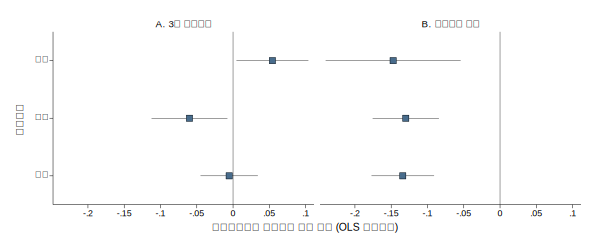

.     global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1
. }            

. graph save "$outputs8\Fig2.gph", replace
file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\08_AntiIntellectualism\Fig2.gph saved

. graph export "$outputs8\Fig2.jpg", replace
file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\08_AntiIntellectualism\Fig2.jpg written in JPEG format

. graph export "$outputs8\Fig2.svg", replace
file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\08_AntiIntellectualism\Fig2.svg saved as SVG format


In [8]:
qui coefplot (matrix(M1[,1]), ci((2 3)) mfcolor(`r(p1)'*0.8)), bylabel("A. 3차 예방접종") || ///
             (matrix(M2[,1]), ci((2 3)) mfcolor(`r(p1)'*0.8)), bylabel("B. 추가접종 의도") ||, ///
        coeflabels(r1="진보" r2="보수" r3="중도", wrap(20)) ///        
        title("`title`i''") ///
        xtitle(반지성주의와 종속변수 간의 관계 (OLS 한계효과)) ytitle(정치성향) ///
        xlabel(-0.2(0.05)0.1, nogrid) ///
        xline(0, lcolor(gray) lwidth(medium)) ///
        plotregion(lwidth(thin) lpattern(solid)) ///
        msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
        ciopts(recast(rspike) lcolor(black) lwidth(vthin)) ///
        graphregion(fcolor(white) color(white) icolor(white) margin(small)) ///
        legend(off) ///
        name(g1, replace)
graph combine g1, ///
        b1("") ///
        l1("") cols(2) ycommon ///
        xsize(12) ysize(5) iscale(*1.2)
graph save "$outputs8\Fig2.gph", replace
graph export "$outputs8\Fig2.jpg", replace
graph export "$outputs8\Fig2.svg", replace

### Figure 3


. qui coefplot (matrix(M3[,1]), ci((2 3)) mfcolor(`r(p1)'*0.8)), bylabel("A. 효과성") ||              (matrix(M4[,1]), ci((2 3)) mfcolor(`r(p1)'*0.8)), bylabel("A. 부작용") ||              (matrix(M5[,1]), ci((2 3)) mfcolor(`r(p1)'*0.8)), b
> ylabel("B. 사회적 편익") ||,         coeflabels(r1="진보" r2="보수" r3="중도", wrap(20))         title("`title`i''")         xtitle("반지성주의와 종속변수 간의 관계 (OLS 한계효과)") ytitle("정치성향")         xlabel(-0.3(0.1)0.2, nogrid) 
>         xline(0, lcolor(gray) lwidth(medium))         plotregion(lwidth(thin) lpattern(solid))         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black)         ciopts(recast(rspike) lcolor(black) lwidth(vthin))  
>        graphregion(fcolor(white) color(white) icolor(white) margin(small))         legend(off) byopts(col(3))         name(g1, replace)

. cap noi graph combine g1,         b1("")         l1("") cols(1) ycommon         xsize(12) ysize(5) iscale(*1.2)

. if _rc == 0 {
.     noi gr export `"C:/Users/YC/.stata_kern

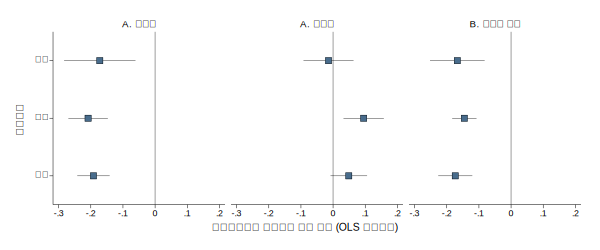

.     global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1
. }            

. graph save "$outputs8\Fig3.gph", replace
file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\08_AntiIntellectualism\Fig3.gph saved

. graph export "$outputs8\Fig3.jpg", replace
file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\08_AntiIntellectualism\Fig3.jpg written in JPEG format

. graph export "$outputs8\Fig3.svg", replace
file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\08_AntiIntellectualism\Fig3.svg saved as SVG format


In [9]:
qui coefplot (matrix(M3[,1]), ci((2 3)) mfcolor(`r(p1)'*0.8)), bylabel("A. 효과성") || ///
             (matrix(M4[,1]), ci((2 3)) mfcolor(`r(p1)'*0.8)), bylabel("A. 부작용") || ///
             (matrix(M5[,1]), ci((2 3)) mfcolor(`r(p1)'*0.8)), bylabel("B. 사회적 편익") ||, ///
        coeflabels(r1="진보" r2="보수" r3="중도", wrap(20)) ///        
        title("`title`i''") ///
        xtitle("반지성주의와 종속변수 간의 관계 (OLS 한계효과)") ytitle("정치성향") ///
        xlabel(-0.3(0.1)0.2, nogrid) ///
        xline(0, lcolor(gray) lwidth(medium)) ///
        plotregion(lwidth(thin) lpattern(solid)) ///
        msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
        ciopts(recast(rspike) lcolor(black) lwidth(vthin)) ///
        graphregion(fcolor(white) color(white) icolor(white) margin(small)) ///
        legend(off) byopts(col(3)) ///
        name(g1, replace)
graph combine g1, ///
        b1("") ///
        l1("") cols(1) ycommon ///
        xsize(12) ysize(5) iscale(*1.2)
graph save "$outputs8\Fig3.gph", replace
graph export "$outputs8\Fig3.jpg", replace
graph export "$outputs8\Fig3.svg", replace

# Korea Childhood

In [22]:
tab child WAVE


           |               WAVE
     child |         1          2          4 |     Total
-----------+---------------------------------+----------
         0 |     1,087        991      1,095 |     3,173 
         1 |       413        509        405 |     1,327 
-----------+---------------------------------+----------
     Total |     1,500      1,500      1,500 |     4,500 


In [21]:
use "_Merged", clear
keep if DATA=="Vaccine"

recode pp004 (4/5=1 "Necessary") (1/3=0 "Unnecessary/Don't know"), gen(vaxYouth)
recode pp004 (1/2=1 "Unnecessary") (3/5=0 "Necessary/Don't know"), gen(vaxYouthNo)
gen child = .
replace child = 0 if pp006a==1 & WAVE<=2
replace child = 0 if (pp006ae==5 | pp006af==6) & WAVE==4
replace child = 1 if pp006a!=1 & WAVE<=2
replace child = 1 if (pp006aa==1 | pp006ab==2 | pp006ac==3 | pp006ad==4) & WAVE==4
gen vaxChild = .
replace vaxChild = 0 if child==0
replace vaxChild = 1 if child==1 & (pp007==1 | pp007==2 | pp007==3)
gen vaxChildNo = .
replace vaxChildNo = 0 if child==0
replace vaxChildNo = 1 if child==1 & (pp007==4 | pp007==5)



(2,000 observations deleted)

(6,000 differences between pp004 and vaxYouth)

(5,509 differences between pp004 and vaxYouthNo)

(6,000 missing values generated)

(2,078 real changes made)

(1,095 real changes made)

(922 real changes made)

(405 real changes made)

(6,000 missing values generated)

(3,173 real changes made)

(591 real changes made)

(6,000 missing values generated)

(3,173 real changes made)

(460 real changes made)


In [11]:
tab FEMALE vaxChild if (WAVE==1 | WAVE==2) & pp007!=6, row


+----------------+
| Key            |
|----------------|
|   frequency    |
| row percentage |
+----------------+

           |  vaxChild
    Female |         1 |     Total
-----------+-----------+----------
      Male |       220 |       220 
           |    100.00 |    100.00 
-----------+-----------+----------
    Female |       169 |       169 
           |    100.00 |    100.00 
-----------+-----------+----------
     Total |       389 |       389 
           |    100.00 |    100.00 


In [29]:
tab WAVE VAX_BNF, row
tab WAVE VAX_BNF if FEMALE==1, row
tab WAVE VAX_BNF if FEMALE==0, row



+----------------+
| Key            |
|----------------|
|   frequency    |
| row percentage |
+----------------+

           | Perc Social Benefits
      WAVE | No/Don't         Yes |     Total
-----------+----------------------+----------
         1 |       666        834 |     1,500 
           |     44.40      55.60 |    100.00 
-----------+----------------------+----------
         2 |       630        870 |     1,500 
           |     42.00      58.00 |    100.00 
-----------+----------------------+----------
         3 |       722        778 |     1,500 
           |     48.13      51.87 |    100.00 
-----------+----------------------+----------
         4 |       724        776 |     1,500 
           |     48.27      51.73 |    100.00 
-----------+----------------------+----------
     Total |     2,742      3,258 |     6,000 
           |     45.70      54.30 |    100.00 


+----------------+
| Key            |
|----------------|
|   frequency    |
| row percentage |
+-----

In [26]:
tab WAVE vaxYouthNo, row
tab WAVE vaxYouthNo if FEMALE==1, row
tab WAVE vaxYouthNo if FEMALE==0, row



+----------------+
| Key            |
|----------------|
|   frequency    |
| row percentage |
+----------------+

           |    RECODE of pp004
           |        (PP004)
      WAVE | Necessary  Unnecessa |     Total
-----------+----------------------+----------
         1 |     1,059        441 |     1,500 
           |     70.60      29.40 |    100.00 
-----------+----------------------+----------
         2 |     1,140        360 |     1,500 
           |     76.00      24.00 |    100.00 
-----------+----------------------+----------
         3 |     1,176        324 |     1,500 
           |     78.40      21.60 |    100.00 
-----------+----------------------+----------
         4 |     1,160        340 |     1,500 
           |     77.33      22.67 |    100.00 
-----------+----------------------+----------
     Total |     4,535      1,465 |     6,000 
           |     75.58      24.42 |    100.00 


+----------------+
| Key            |
|----------------|
|   frequency    |

In [52]:
tab vaxYouthNo FEMALE if WAVE==1 | WAVE==2, col


+-------------------+
| Key               |
|-------------------|
|     frequency     |
| column percentage |
+-------------------+

     RECODE of pp004 |        Female
             (PP004) |      Male     Female |     Total
---------------------+----------------------+----------
Necessary/Don't know |     1,136      1,063 |     2,199 
                     |     74.30      72.26 |     73.30 
---------------------+----------------------+----------
         Unnecessary |       393        408 |       801 
                     |     25.70      27.74 |     26.70 
---------------------+----------------------+----------
               Total |     1,529      1,471 |     3,000 
                     |    100.00     100.00 |    100.00 


# Korea University

## Table 1

In [12]:
capt prog drop ctab
program ctab, eclass
    syntax varlist [if] [in]
    // Row 1: No. of Observations
    qui tab WAVE
    matrix temp = r(N)
    local c1 = temp[1,1]
    qui tab WAVE if WAVE == 1
    matrix temp = r(N)
    local c2 = temp[1,1]
    qui tab WAVE if WAVE == 2
    matrix temp = r(N)
    local c3 = temp[1,1]
    qui tab WAVE if WAVE == 3
    matrix temp = r(N)
    local c4 = temp[1,1]
    qui tab WAVE if WAVE == 4
    matrix temp = r(N)
    local c5 = temp[1,1]
    mat M = (`c1',`c2',`c3',`c4',`c5', 0)
    mat rownames M = "No of Obs"
    mat colnames M = "All" "Wave 1" "Wave 2" "Wave 3" "Wave 4" "Chi-squared"

    local num = 0
    foreach x in `varlist'{
        local num = `num' + 1

        qui svy: mean `x'
        matrix temp = e(b)
        local m1 = temp[1,1]*100
        qui svy: mean `x' if WAVE==1
        matrix temp = e(b)
        local m2 = temp[1,1]*100
        qui svy: mean `x' if WAVE==2
        matrix temp = e(b)
        local m3 = temp[1,1]*100
        qui svy: mean `x' if WAVE==3
        matrix temp = e(b)
        local m4 = temp[1,1]*100
        qui svy: mean `x' if WAVE==4
        matrix temp = e(b)
        local m5 = temp[1,1]*100
        qui tab `x' WAVE, chi
        mat temp = r(p)
        local m6 = temp[1,1]

        mat temp = (`m1',`m2',`m3',`m4',`m5',`m6')
        local rowname: variable label `x'
        mat rownames temp = "`rowname'"
        mat M = M\temp
        // mat M = M[1..3,1...]
    }
    esttab matrix(M, fmt("0 2"))
    esttab matrix(M, fmt("0 2")) using "$outputs9\Table1_weighted.rtf", replace
end

In [13]:
use "_Merged", clear
keep if DATA=="Vaccine"
drop if vc001==4 & WAVE<=2
drop if vc001==5 & WAVE>2
svyset [pweight=weight], strata(EDU)

qui tab IDEOLOGY, gen(IDEOLOGY_)
label var IDEOLOGY_1 "Liberal"
label var IDEOLOGY_2 "Independent"
label var IDEOLOGY_3 "Conservative"
qui tab AGE, gen(AGE_)
qui tab EDU, gen(EDU_)
label var EDU_1 "High school or less"
label var EDU_2 "BA"
label var EDU_3 "MA or more"
qui tab INCOME, gen(INCOME_)
label var INCOME_1 "<₩2M"
label var INCOME_2 "₩2M-₩3.99M"
label var INCOME_3 "₩4M-₩5.99M"
label var INCOME_4 "₩6M-₩7.99M"
label var INCOME_5 ">₩7.99M"

ctab VAX2 VAX3 VAX_ADD TR_KDCA IDEOLOGY_1-IDEOLOGY_3 COVID_EXGG FEMALE MS UNEMPLOYED REL ///
     AGE_1 AGE_2 AGE_3 AGE_4 AGE_5 EDU_1 EDU_2 EDU_3 INCOME_1 INCOME_2 INCOME_3 INCOME_4 INCOME_5



(2,000 observations deleted)

(148 observations deleted)

(168 observations deleted)


Sampling weights: weight
             VCE: linearized
     Single unit: missing
        Strata 1: EDU
 Sampling unit 1: <observations>
           FPC 1: <zero>

















------------------------------------------------------------------------------------------
                        M                                                                 
                      All       Wave 1       Wave 2       Wave 3       Wave 4  Chi-squared
------------------------------------------------------------------------------------------
No of Obs            5684         1423         1429         1421         1411            0
2 Doses or~e        98.38        98.65        98.49        98.39        97.99         0.89
Booster or~e        69.17        70.21        68.50        69.12        68.84         0.20
Will to An~r        45.99        47.73        50.18        41.25        44.81         0.00
Trust 

In [5]:
import delimited "_HBK_clean", clear case(preserve)
gen DATA = "Vaccine"
xtset PRVC

* Weighting
merge m:1 DATA EDU using "PSweight_edu.dta"
capt drop pct_sample
gen pct_sample = .
replace pct_sample = count_sample/6000
gen weight = pct_pop/pct_sample
gen Pweight = totalpop / sample
drop if _merge==2
qui svyset [pweight=weight], strata(EDU)

rename medBias medBias_old
gen medBias = .
replace medBias = 0 if medBias_old=="Trust liberal media"
replace medBias = 1 if medBias_old=="Trust both"
replace medBias = 2 if medBias_old=="Don't trust both"
replace medBias = 3 if medBias_old=="Trust conservative media"

label var medBias "Trust in media"
label define medBias 0 "Trust liberal media" 1 "Trust both" 2 "Don't trust both" 3 "Trust conservative media"
label val medBias medBias

replace pp3 = "" if pp3=="NA"

loc vars pp3 medUse age female edu unemployed ms income pf_effc pf_equi pf_tran

foreach x in `vars' {
    encode `x', gen(`x'_new)
    di "`x'"
}

*label var medUse_new "Media use"
*label define medUse_new 0 "< Once a week" 1 "> Once a week"
*label val medUse_new medUse_new


(encoding automatically selected: UTF-8)
(369 vars, 6,000 obs)



Panel variable: PRVC (unbalanced)


    Result                      Number of obs
    -----------------------------------------
    Not matched                         4,657
        from master                     4,653  (_merge==1)
        from using                          4  (_merge==2)

    Matched                             1,347  (_merge==3)
    -----------------------------------------


(6,004 missing values generated)

(6,000 real changes made)

(4 missing values generated)

(4,653 missing values generated)

(4 observations deleted)



(6,000 missing values generated)

(1,274 real changes made)

(2,494 real changes made)

(1,412 real changes made)

(820 real changes made)




(3,000 real changes made)


pp3
medUse
age
female
edu
unemployed
ms
income
pf_effc
pf_equi
pf_tran


## Trends

### Trust and risk perception

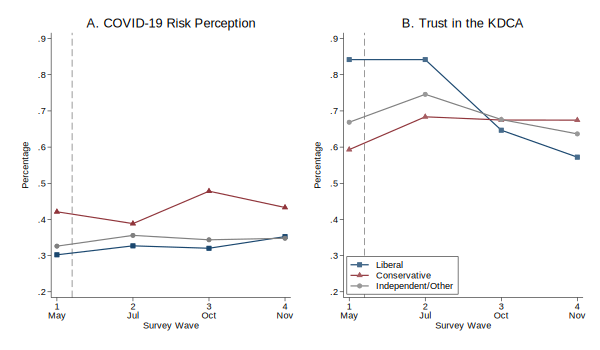

In [3]:
use "_Merged", clear
qui keep if DATA=="Vaccine"
*qui svyset [pweight=weight], strata(EDU)

/* ----- Figure 1. Trends of the Outcome Variables in the Study Period ----- */
local title1 `""A. COVID-19 Risk Perception""'
local title2 `""B. Trust in the KDCA""'

local color1 navy
local color2 maroon
local color3 gray
local num = 0

loc x COVID_EXGG
collapse (mean) `x', by(IDEOLOGY WAVE)

qui tw (con `x' WAVE if IDEOLOGY == 0, lcolor(`color1') mcolor(`color1') lw(medthick) msymbol(S)) ///
       (con `x' WAVE if IDEOLOGY == 1, lcolor(`color2') mcolor(`color2') lw(medthick) msymbol(T)) ///
       (con `x' WAVE if IDEOLOGY == 2, lcolor(`color3') mcolor(`color3') lw(medthick) msymbol(O)), ///
           title(`title1') ytitle(Percentage, margin(small)) xtitle(Survey Wave) ///
           ylabel(0.2(0.1)0.9) xlabel(1 `""1" "May""' 2 `""2" "Jul""' 3 `""3" "Oct""' 4 `""4" "Nov""', nogrid) ///
           xline(1.2, lp(dash) lc(gray)) ///
           legend(off) ///
           name(g1, replace)
                                      
use "_Merged", clear
qui keep if DATA=="Vaccine"

loc x TR_KDCA
collapse (mean) `x', by(IDEOLOGY WAVE)

qui tw (con `x' WAVE if IDEOLOGY == 0, lcolor(`color1') mcolor(`color1'*0.8) lw(medthick) msymbol(S)) ///
       (con `x' WAVE if IDEOLOGY == 1, lcolor(`color2') mcolor(`color2'*0.8) lw(medthick) msymbol(T)) ///
       (con `x' WAVE if IDEOLOGY == 2, lcolor(`color3') mcolor(`color3'*0.8) lw(medthick) msymbol(O)), ///
           title(`title2') ytitle(Percentage, margin(small)) xtitle(Survey Wave) ///
           ylabel(0.2(0.1)0.9) xlabel(1 `""1" "May""' 2 `""2" "Jul""' 3 `""3" "Oct""' 4 `""4" "Nov""', nogrid) ///
           legend(order(1 "Liberal" 2 "Conservative" 3 "Independent/Other") position(7) size(*1) rowgap(0.3pt)) ///
           xline(1.2, lp(dash) lc(gray)) ///
           name(g2, replace)

graph combine g1 g2, ///
    ycommon b1("") l1("") cols(2) iscale(*1) xsize(12) ysize(7)
*qui graph save "$outputs5\Fig1.gph", replace
*qui graph export "$outputs5\Fig1.svg", replace
*qui graph export "$outputs5\Fig1.jpg", replace

### Policy support

In [22]:
import delimited "_HBK_clean", clear case(preserve)
    
    replace pp3 = "" if pp3=="NA"
    loc vars2 pp3 medUse age female edu unemployed ms income

    foreach y in `vars2' {
        qui encode `y', gen(`y'_new)
        qui di "`y'"
    }


(encoding automatically selected: UTF-8)
(369 vars, 6,000 obs)

(3,000 real changes made)















(encoding automatically selected: UTF-8)
(369 vars, 6,000 obs)
(3,000 real changes made)
(encoding automatically selected: UTF-8)
(369 vars, 6,000 obs)
(3,000 real changes made)
(encoding automatically selected: UTF-8)
(369 vars, 6,000 obs)
(3,000 real changes made)


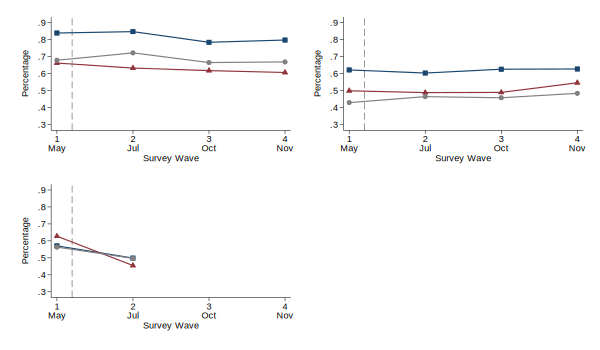

In [29]:
/* ----- Figure 1. Trends of the Outcome Variables in the Study Period ----- */
loc vars pp1 pp4 pp3_new
loc i = 0

loc title1 `""A. Social distancing" "(May-Nov)""'
loc title2 `""B. Youth vaccine mandate" "(May-Nov)""'
loc title3 `""C. Mask mandate" "(May-Jul)""'

local color1 navy
local color2 maroon
local color3 gray
local num = 0

loc i = 0
foreach x in `vars' {
    import delimited "_HBK_clean", clear case(preserve)
    
    replace pp3 = "" if pp3=="NA"
    loc vars2 pp3 medUse age female edu unemployed ms income

    foreach y in `vars2' {
        qui encode `y', gen(`y'_new)
        qui replace `y'_new = `y'_new - 1
        qui di "`y'"
    }
    
    loc i = `i' + 1
    collapse (mean) `x', by(pol wave)

    qui tw (con `x' wave if pol == 0, lcolor(`color1') mcolor(`color1') lw(medthick) msymbol(S)) ///
           (con `x' wave if pol == 1, lcolor(`color2') mcolor(`color2') lw(medthick) msymbol(T)) ///
           (con `x' wave if pol == 2, lcolor(`color3') mcolor(`color3') lw(medthick) msymbol(O)), ///
               title(`title`'') ytitle(Percentage, margin(small)) xtitle(Survey Wave) ///
               ylabel(0.3(0.1)0.9) xlabel(1 `""1" "May""' 2 `""2" "Jul""' 3 `""3" "Oct""' 4 `""4" "Nov""', nogrid) ///
               xline(1.2, lp(dash) lc(gray)) ///
               legend(off) ///
               name(g`i', replace)
}
                                      
graph combine g1 g2 g3, ///
    ycommon b1("") l1("") cols(2) iscale(*1) xsize(12) ysize(7)
*qui graph save "$outputs5\Fig1.gph", replace
*qui graph export "$outputs5\Fig1.svg", replace
*qui graph export "$outputs5\Fig1.jpg", replace

In [ ]:
i.age_new i.female_new i.edu_new i.unemployed_new i.ms_new i.income_new i.wave
qui xtreg pp1 i.tr_kdca##i.pol `controls', fe vce(cluster PRVC)

In [41]:
tab pp1


        pp1 |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      1,787       29.78       29.78
          1 |      4,213       70.22      100.00
------------+-----------------------------------
      Total |      6,000      100.00


In [4]:
*use "_Merged", clear
*qui keep if DATA=="Vaccine"
*qui svyset [pweight=Pweight], strata(EDU)

local outcomes pp1 pp4 pp3_new
local controls i.age_new i.female_new i.edu_new i.unemployed_new i.ms_new i.income_new

local num = 0
eststo clear
foreach y in `outcomes' {
    local num = `num' + 1    
    est save "$models\Fig1_mfx`num'.ster", replace
}

local title1 `""A. COVID-19 Risk Perception""'
local title2 `""B. Trust in the KDCA""'

local lw1 0.2
local lw2 0.5

local num = 0
eststo clear
foreach y in `outcomes' {
    local num = `num' + 1
    eststo xt`num': qui reg `y' i.pol##i.wave `controls', robust
    eststo mfx`num': margins wave#pol, post vsquish
    qui marginsplot, ///
        title(`title`num'') xtitle("Survey Wave") ytitle("Predicted Probability") ///        
        xlabel(1 "1" 2 "2" 3 "3" 4 "4", nogrid) ///
        plot1opts(lw(`lw1') fcolor(`r(p1)') mcolor(gs5) lcolor(gs5) msymbol(O) acolor(black)) ///
        plot2opts(lw(`lw1') fcolor(`r(p2)') mcolor(gs5) lcolor(gs5) msymbol(S) acolor(black)) ///
        plot3opts(lw(`lw1') fcolor(gray) mcolor(gs5) lcolor(gs5) msymbol(Th) lpattern("-")) ///
        recastci(rarea) ciopt(color(%20)) ///
        xsize(8) ysize(6) ylabel(0(0.1)1) ///
        legend(off) ///
        name(g`num', replace)
}
eststo xt1: qui reg pp1 i.pol##i.wave `controls', robust
eststo mfx1: margins wave#pol, post vsquish
qui marginsplot, ///
    title(`title1') xtitle("Survey Wave") ytitle("Predicted Probability") ///        
    xlabel(1 "1" 2 "2" 3 "3" 4 "4", nogrid) ///
    plot1opts(lw(`lw1') fcolor(`r(p1)') mcolor(gs5) lcolor(gs5) msymbol(O) acolor(black)) ///
    plot2opts(lw(`lw1') fcolor(`r(p2)') mcolor(gs5) lcolor(gs5) msymbol(S) acolor(black)) ///
    plot3opts(lw(`lw1') fcolor(gray) mcolor(gs5) lcolor(gs5) msymbol(Th) lpattern("-")) ///
    recastci(rarea) ciopt(color(%20)) ///
    xsize(8) ysize(6) ylabel(0(0.1)1) ///
    legend(position(11) size(*0.8) rowgap(*0.4) symxsize(*2)) ///        
    name(g1, replace)

graph combine g1 g2 g3, ///
        b1("") ///
        l1("") ycommon cols(3) ///
        xsize(12) ysize(8) iscale(*1)
graph save "$outputs9\Fig3_mfx.gph", replace
graph export "$outputs9\Fig3_mfx.svg", replace
graph export "$outputs9\Fig3_mfx.jpg", replace






last estimates not found


r(301);
r(301);


## Trust

In [10]:
import delimited "_HBK_clean", clear case(preserve)
xtset PRVC
    
replace pp3 = "" if pp3=="NA"
loc vars2 pp3 medUse age female edu unemployed ms income pf_effc pf_equi pf_tran vax_add vax_eff vax_side vax_bnf

foreach y in `vars2' {
    qui encode `y', gen(`y'_new)
    qui replace `y'_new = `y'_new - 1
    qui di "`y'"
}


(encoding automatically selected: UTF-8)
(369 vars, 6,000 obs)


Panel variable: PRVC (unbalanced)

(3,000 real changes made)




In [133]:
loc controls i.age_new i.female_new i.edu_new i.unemployed_new i.ms_new i.income_new i.wave
qui xtreg pp1 i.tr_kdca##i.pol `controls', fe vce(cluster PRVC)
margins pol, dydx(tr_kdca)
mat li r(table)





Average marginal effects                                 Number of obs = 6,000
Model VCE: Robust

Expression: Linear prediction, predict()
dy/dx wrt:  1.tr_kdca

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
0.tr_kdca    |  (base outcome)
-------------+----------------------------------------------------------------
1.tr_kdca    |
         pol |
          0  |   .1624196   .0183833     8.84   0.000     .1263891    .1984502
          1  |   .2540009   .0245903    10.33   0.000     .2058047     .302197
          2  |   .2051158    .012993    15.79   0.000       .17965    .2305816
------------------------------------------------------------------------------
Note: dy/dx for factor levels is the discrete change from the base level.


r(table)[9,6]
         0b.

In [ ]:
tab wave


       wave |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |      1,500       25.00       25.00
          2 |      1,500       25.00       50.00
          3 |      1,500       25.00       75.00
          4 |      1,500       25.00      100.00
------------+-----------------------------------
      Total |      6,000      100.00


### Performance

In [8]:
tab vax_add, nolab


    vax_add |      Freq.     Percent        Cum.
------------+-----------------------------------
         No |      3,395       56.58       56.58
        Yes |      2,605       43.42      100.00
------------+-----------------------------------
      Total |      6,000      100.00






Average marginal effects                                 Number of obs = 1,500
Model VCE: Robust

Expression: Linear prediction, predict()
dy/dx wrt:  1.pf_tran_new

--------------------------------------------------------------------------------
               |            Delta-method
               |      dy/dx   std. err.      z    P>|z|     [95% conf. interval]
---------------+----------------------------------------------------------------
0.pf_tran_new  |  (base outcome)
---------------+----------------------------------------------------------------
1.pf_tran_new  |
           pol |
            0  |   .2060191   .0621316     3.32   0.001     .0842434    .3277948
            1  |   .2584938   .0695642     3.72   0.000     .1221505    .3948371
            2  |   .0986835   .0365696     2.70   0.007     .0270085    .1703585
--------------------------------------------------------------------------------
Note: dy/dx for factor levels is the discrete change from the base level.


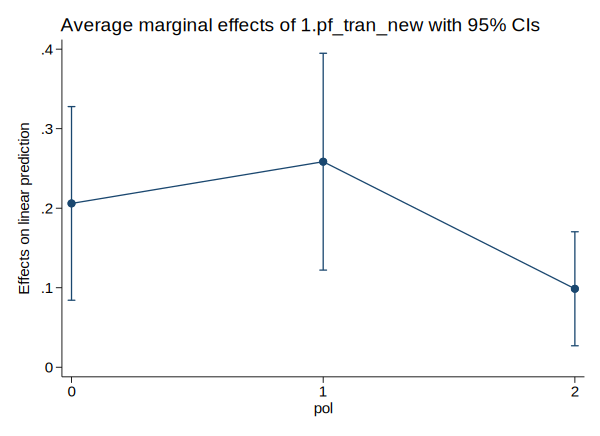

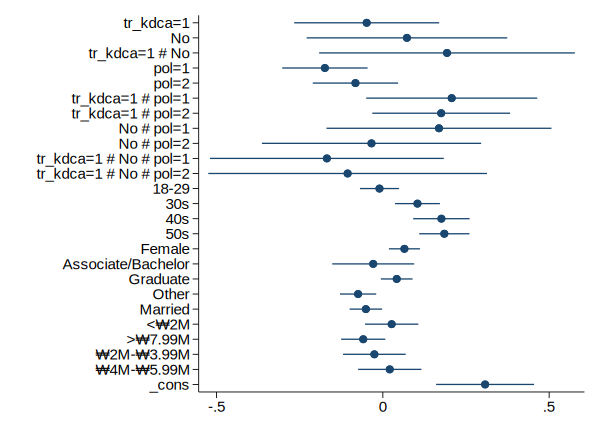

In [11]:
loc controls i.age_new i.female_new i.edu_new i.unemployed_new i.ms_new i.income_new
eststo m1: qui xtreg vax_add_new i.tr_kdca##i.pf_tran_new##i.pol `controls' if wave==1, fe vce(cluster PRVC)
margins pol, dydx(pf_tran_new)
marginsplot
coefplot m1

### Trust



















Average marginal effects                                 Number of obs = 1,500
Model VCE: Robust

Expression: Linear prediction, predict()
dy/dx wrt:  1.pol 2.pol

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
         pol |
          1  |  -.0692612   .0419493    -1.65   0.099    -.1514804     .012958
          2  |  -.0609482   .0302954    -2.01   0.044    -.1203261   -.0015704
------------------------------------------------------------------------------
Note: dy/dx for factor levels is the discrete change from the base level.

Average marginal effects                                 Number of obs = 1,500
Model VCE: Robust

Expression: Linear prediction, predict()
dy/dx wrt:  1.pol 2.pol

---------------------------------------------------

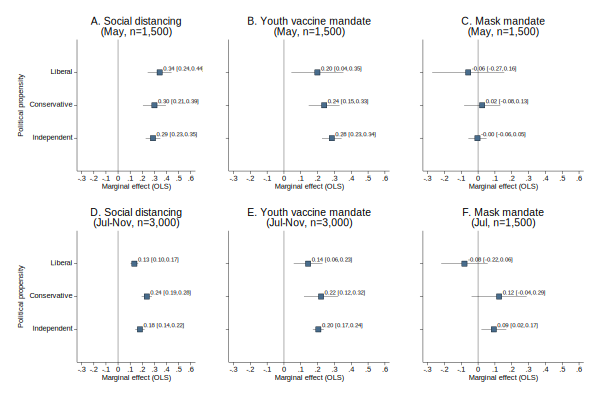
















file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\09_KU\Trust_Fig2.gph saved

file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\09_KU\Trust_Fig2.jpg written in JPEG format


Appendix 3
---------------------------------------------------------------------------
                               (1)                (2)                (3)   
                               pp1                pp4            pp3_new   
---------------------------------------------------------------------------
tr_kdca=1                   0.3430***          0.1987*           -0.0587   
                       [0.24,0.45]        [0.03,0.37]       [-0.29,0.17]   
pol=1                      -0.0396            -0.0923             0.0058   
                      [-0.23,0.15]       [-0.23,0.05]       [-0.22,0.23]   
pol=2                      -0.0230            -0.1901*           -0.0249   
                      [-0.16,0.11]      [-0.34,-0.04]       [-0.23,0

In [35]:
loc controls i.age_new i.female_new i.edu_new i.unemployed_new i.ms_new i.income_new
loc vars pp1 pp4 pp3_new
loc i = 0
loc xrange -0.3(0.1)0.6

loc title1 `""A. Social distancing" "(May, n=1,500)""'
loc title2 `""B. Youth vaccine mandate" "(May, n=1,500)""'
loc title3 `""C. Mask mandate" "(May, n=1,500)""'

loc title4 `""D. Social distancing" "(Jul-Nov, n=3,000)""'
loc title5 `""E. Youth vaccine mandate" "(Jul-Nov, n=3,000)""'
loc title6 `""F. Mask mandate" "(Jul, n=1,500)""'

* Wave 1
matrix M1 = J(3, 4, .)
matrix coln M1 = Beta LI95 UI95 pValue
matrix M2 = J(3, 4, .)
matrix coln M2 = Beta LI95 UI95 pValue
matrix M3 = J(3, 4, .)
matrix coln M3 = Beta LI95 UI95 pValue

foreach y in `vars' {
    loc i = `i' + 1
    
    eststo lm`i': qui xtreg `y' i.tr_kdca##i.pol `controls' if wave==1, fe vce(cluster PRVC)
    qui margins pol, dydx(tr_kdca)
    matrix M`i'[1,1] = r(table)[1,4], r(table)[5,4], r(table)[6,4], r(table)[4,4]
    matrix M`i'[2,1] = r(table)[1,5], r(table)[5,5], r(table)[6,5], r(table)[4,5]
    matrix M`i'[3,1] = r(table)[1,6], r(table)[5,6], r(table)[6,6], r(table)[4,6]
    margins, dydx(pol)
}

qui coefplot (matrix(M1[,1]), ci((2 3)) mfcolor(navy*0.8)), ///
         title(`title1') xtitle("Marginal effect (OLS)") ytitle("Political propensity") ///
         coeflabels(r1="Liberal" r2="Conservative" r3="Independent", wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(0, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) ///
         mlabel("     " + string(@b, "%9.2f") + " [" + string(@ll, "%9.2f") + "," + string(@ul, "%9.2f") + "]") mlabformat("%9.2f") ///
         mlabcolor(black) mlabpos(2) mlabgap(*1) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(medium)) ///
         legend(off) ///
         name(g1, replace)
forvalue i = 2(1)3 {
    qui coefplot (matrix(M`i'[,1]), ci((2 3)) mfcolor(navy*0.8)), ///
         title(`title`i'') xtitle("Marginal effect (OLS)") ytitle(" ") ///
         coeflabels(r1=" " r2=" " r3=" ", wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(0, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) ///
         mlabel("     " + string(@b, "%9.2f") + " [" + string(@ll, "%9.2f") + "," + string(@ul, "%9.2f") + "]") mlabformat("%9.2f") ///
         mlabcolor(black) mlabpos(2) mlabgap(*1) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(medium)) ///
         legend(off) ///
         name(g`i', replace)
}

matrix M4 = J(3, 4, .)
matrix coln M4 = Beta LI95 UI95 pValue
matrix M5 = J(3, 4, .)
matrix coln M5 = Beta LI95 UI95 pValue
matrix M6 = J(3, 4, .)
matrix coln M6 = Beta LI95 UI95 pValue

loc i = 3
foreach y in `vars' {
    loc i = `i' + 1
    
    eststo lm`i': qui xtreg `y' i.tr_kdca##i.pol `controls' if wave!=1, fe vce(cluster PRVC)
    qui margins pol, dydx(tr_kdca)
    matrix M`i'[1,1] = r(table)[1,4], r(table)[5,4], r(table)[6,4], r(table)[4,4]
    matrix M`i'[2,1] = r(table)[1,5], r(table)[5,5], r(table)[6,5], r(table)[4,5]
    matrix M`i'[3,1] = r(table)[1,6], r(table)[5,6], r(table)[6,6], r(table)[4,6]
}

qui coefplot (matrix(M4[,1]), ci((2 3)) mfcolor(navy*0.8)), ///
         title(`title4') xtitle("Marginal effect (OLS)") ytitle("Political propensity") ///
         coeflabels(r1="Liberal" r2="Conservative" r3="Independent", wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(0, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) ///
         mlabel("     " + string(@b, "%9.2f") + " [" + string(@ll, "%9.2f") + "," + string(@ul, "%9.2f") + "]") mlabformat("%9.2f") ///
         mlabcolor(black) mlabpos(2) mlabgap(*1) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(medium)) ///
         legend(off) ///
         name(g4, replace)
forvalue i = 5(1)6 {
    qui coefplot (matrix(M`i'[,1]), ci((2 3)) mfcolor(navy*0.8)), ///
         title(`title`i'') xtitle("Marginal effect (OLS)") ytitle(" ") ///
         coeflabels(r1=" " r2=" " r3=" ", wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(0, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) ///
         mlabel("     " + string(@b, "%9.2f") + " [" + string(@ll, "%9.2f") + "," + string(@ul, "%9.2f") + "]") mlabformat("%9.2f") ///
         mlabcolor(black) mlabpos(2) mlabgap(*1) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(medium)) ///
         legend(off) ///
         name(g`i', replace)
}

graph combine g1 g2 g3 g4 g5 g6, ///
        b1("") ycommon ///
        l1("") cols(3) ///
        xsize(12) ysize(8) iscale(*0.8)
graph save "$outputs9\Trust_Fig2.gph", replace
graph export "$outputs9\Trust_Fig2.jpg", replace

esttab lm1 lm2 lm3 ///
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Appendix 3) nogaps ///
    varwidth(18) modelwidth(15) nobase label

esttab lm1 lm2 lm3 ///
    using "$outputs9\Trust_Fig2_Appendix.rtf" ///
    ,replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Appendix 3) nogaps ///
    varwidth(18) modelwidth(15) nobase label

## Media

In [58]:
tab pp1


        pp1 |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      1,787       29.78       29.78
          1 |      4,213       70.22      100.00
------------+-----------------------------------
      Total |      6,000      100.00


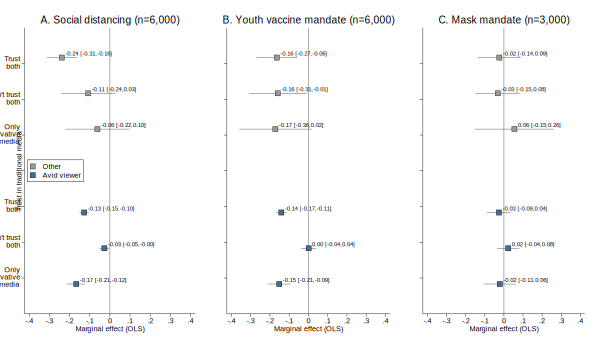
































file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\09_KU\Fig1.gph saved

file C:\Dropbox\01_Research\107_Korean Vaccine Survey\02_Analysis\outputs\09_KU\Fig1.jpg written in JPEG format


In [130]:
loc controls i.pol i.age_new i.female_new i.edu_new i.unemployed_new i.ms_new i.income_new i.wave
loc vars pp1 pp4 pp3_new
loc i = 0
loc xrange -0.4(0.1)0.4

loc title1 `""A. Social distancing (n=6,000)""'
loc title2 `""B. Youth vaccine mandate (n=6,000)""'
loc title3 `""C. Mask mandate (n=3,000)""'

matrix M1_0 = J(7, 4, .)
matrix coln M1_0 = Beta LI95 UI95 pValue
matrix M2_0 = J(7, 4, .)
matrix coln M2_0 = Beta LI95 UI95 pValue
matrix M3_0 = J(7, 4, .)
matrix coln M3_0 = Beta LI95 UI95 pValue

matrix M1_1 = J(7, 4, .)
matrix coln M1_1 = Beta LI95 UI95 pValue
matrix M2_1 = J(7, 4, .)
matrix coln M2_1 = Beta LI95 UI95 pValue
matrix M3_1 = J(7, 4, .)
matrix coln M3_1 = Beta LI95 UI95 pValue

foreach y in `vars' {
    loc i = `i' + 1
    
    eststo lm`i': qui xtreg `y' i.medBias##i.medUse_new `controls', fe vce(cluster PRVC)
    *qui margins, dydx(medBias)
    *matrix M`i'_0[1,1] = r(table)[1,2], r(table)[5,2], r(table)[6,2], r(table)[4,2]
    qui margins medUse_new, dydx(medBias)
    matrix M`i'_0[1,1] = r(table)[1,3], r(table)[5,3], r(table)[6,3], r(table)[4,3]
    matrix M`i'_0[2,1] = r(table)[1,5], r(table)[5,5], r(table)[6,5], r(table)[4,5]
    matrix M`i'_0[3,1] = r(table)[1,7], r(table)[5,7], r(table)[6,7], r(table)[4,7]
    
    matrix M`i'_1[5,1] = r(table)[1,4], r(table)[5,4], r(table)[6,4], r(table)[4,4]
    matrix M`i'_1[6,1] = r(table)[1,6], r(table)[5,6], r(table)[6,6], r(table)[4,6]
    matrix M`i'_1[7,1] = r(table)[1,8], r(table)[5,8], r(table)[6,8], r(table)[4,8]
}

mat M1_0[4,1]=.,.,.
mat M2_0[4,1]=.,.,.
mat M3_0[4,1]=.,.,.
mat M1_1[4,1]=.,.,.
mat M2_1[4,1]=.,.,.
mat M3_1[4,1]=.,.,.

qui coefplot (matrix(M1_0[,1]), ci((2 3)) label(Other) mfcolor(gs8*0.8)) ///
             (matrix(M1_1[,1]), ci((2 3)) label(Avid viewer) mfcolor(navy*0.8)), ///
         title(`title1') xtitle("Marginal effect (OLS)") ytitle("Trust in traditional media") ///
         coeflabels(r1=`""Trust" "both""' r2=`""Don't trust" "both""' r3=`""Only" "conservative" "media""' r4=" " ///
                    r5=`""Trust" "both""' r6=`""Don't trust" "both""' r7=`""Only" "conservative" "media""', wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(0, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) ///
         mlabel("     " + string(@b, "%9.2f") + " [" + string(@ll, "%9.2f") + "," + string(@ul, "%9.2f") + "]") mlabformat("%9.2f") ///
         mlabcolor(black) mlabpos(2) mlabgap(*1) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(medium)) ///
         legend(position(9) size(*1) rowgap(0.3pt)) ///
         name(g1, replace)
forvalue i = 2(1)3 {
    qui coefplot (matrix(M`i'_0[,1]), ci((2 3)) label(Other) mfcolor(gs8*0.8)) ///
                 (matrix(M`i'_1[,1]), ci((2 3)) label(Avid viewer) mfcolor(navy*0.8)), ///
         title(`title`i'') xtitle("Marginal effect (OLS)") ytitle(" ") ///
         coeflabels(r1=" " r2=" " r3=" " r4=" " ///
                    r5=" " r6=" " r7=" ", wrap(30)) ///
         xlabel(`xrange') ylabel(, nogrid) ///
         xline(0, lcolor(gray) lwidth(medium)) ///
         plotregion(lwidth(thin) lpattern(solid)) ///
         msize(large) mlwidth(vthin) msymbol(S) mfcolor(`r(p1)'*0.8) mlcolor(black) ///
         ciopts(recast(rspike) lcolor(black) lwidth(vthin)) ///
         mlabel("     " + string(@b, "%9.2f") + " [" + string(@ll, "%9.2f") + "," + string(@ul, "%9.2f") + "]") mlabformat("%9.2f") ///
         mlabcolor(black) mlabpos(2) mlabgap(*1) ///
         graphregion(fcolor(white) color(white) icolor(white) margin(medium)) ///
         legend(off) ///
         name(g`i', replace)
}

graph combine g1 g2 g3, ///
        b1("") ycommon ///
        l1("") cols(3) ///
        xsize(12) ysize(7) iscale(*0.8)
graph save "$outputs9\Fig1.gph", replace
graph export "$outputs9\Fig1.jpg", replace

In [ ]:
graph save "$outputs4\Fig1.gph", replace
graph export "$outputs4\Fig1.jpg", replace

esttab lmM1 lmM2 lmM4 lmM5 lmM6 lmM7 lmM8 lmM9 ///
    , replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Figure 1) nogaps ///
    varwidth(18) modelwidth(15) nobase label
esttab lmM1 lmM2 lmM4 lmM5 lmM6 lmM7 lmM8 lmM9 ///
    using "$outputs4\Appendix_Fig1.rtf" ///
    , replace b(4) ci(2) r2(2) ar2(2) scalar(F) ///
    title(Figure 1) nogaps ///
    varwidth(18) modelwidth(15) nobase label




Fixed-effects (within) regression               Number of obs     =      6,000
Group variable: PRVC                            Number of groups  =         17

R-squared:                                      Obs per group:
     Within  = 0.1131                                         min =         46
     Between = 0.0302                                         avg =      352.9
     Overall = 0.1125                                         max =      1,599

                                                F(16,16)          =          .
corr(u_i, Xb) = -0.0315                         Prob > F          =          .

                                                            (Std. err. adjusted for 17 clusters in PRVC)
--------------------------------------------------------------------------------------------------------
                                       |               Robust
                                   pp1 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-

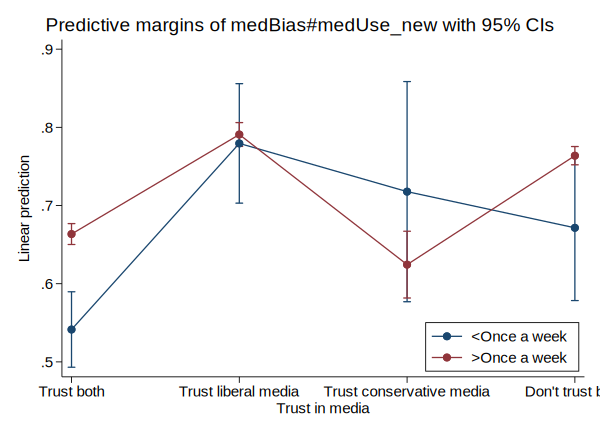

In [60]:
loc controls i.pol i.age_new i.female_new i.edu_new i.unemployed_new i.ms_new i.income_new i.wave
xtreg pp1 i.medBias##i.medUse_new `controls', fe vce(cluster PRVC)
margins medBias#medUse_new
marginsplot


Variables that uniquely identify margins: medUse_new _deriv


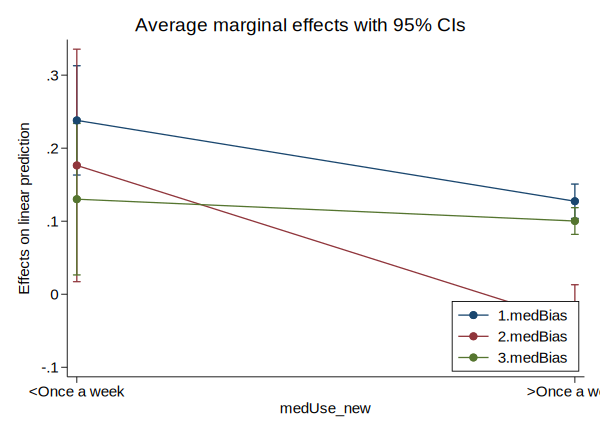